In [1]:
library(ggplot2)
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(tseries)

── Attaching packages ──────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ─────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loading required package: viridisLite

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [74]:
data <- read.csv("data/sum-airport-month.csv")

In [75]:
data["delay_rate"] <- data$arr_del15 / data$arr_flights
data["new_delay_rate"] <- (data$arr_del15 - data$late_aircraft_ct)/(data$arr_flights - data$late_aircraft_ct)
data["new_arr_flights"] <- (data$arr_flights - data$late_aircraft_ct)

In [76]:
data["jan"] <- as.numeric(data$month==1)
data["feb"] <- as.numeric(data$month==2)
data["mar"] <- as.numeric(data$month==3)
data["apr"] <- as.numeric(data$month==4)
data["may"] <- as.numeric(data$month==5)
data["jun"] <- as.numeric(data$month==6)
data["jul"] <- as.numeric(data$month==7)
data["aug"] <- as.numeric(data$month==8)
data["sep"] <- as.numeric(data$month==9)
data["oct"] <- as.numeric(data$month==10)
data["nov"] <- as.numeric(data$month==11)
data["dec"] <- as.numeric(data$month==12)

In [77]:
sum(data$jan)

[1] 5794

In [78]:
data["arr_flights_n"] = data$arr_flights / max(data$arr_flights)

In [79]:
summary(data$covid)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.08776 0.00000 1.00000 

In [80]:
summary(data$control)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.08577 0.00000 1.00000 

In [81]:
finiteFilter = data$delay_rate > 0 & data$delay_rate < 1

In [82]:
filterTest = finiteFilter & (data$covid + data$control > 0)

In [83]:
newFiniteFilter = data$new_delay_rate > 0 & data$new_delay_rate < 1 & (is.na(data$new_delay_rate) == FALSE)
newFilterTest = newFiniteFilter & (data$covid + data$control > 0)

In [84]:
data["t_delay_rate"] <- log(data$delay_rate / (1-data$delay_rate))

data["t_new_delay_rate"] <- log(data$new_delay_rate / (1-data$new_delay_rate))


In [85]:
qs <- data[data$t_delay_rate > -Inf && data$t_delay_rate < Inf,]$t_delay_rate
data["tc_delay_rate"] <- pmax(pmin(data$t_delay_rate,max(qs)),min(qs))


Call:
lm(formula = t_delay_rate ~ 1, data = data[finiteFilter, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1960 -0.3292  0.0665  0.4023  3.6795 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.600024   0.002413    -663   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6299 on 68120 degrees of freedom


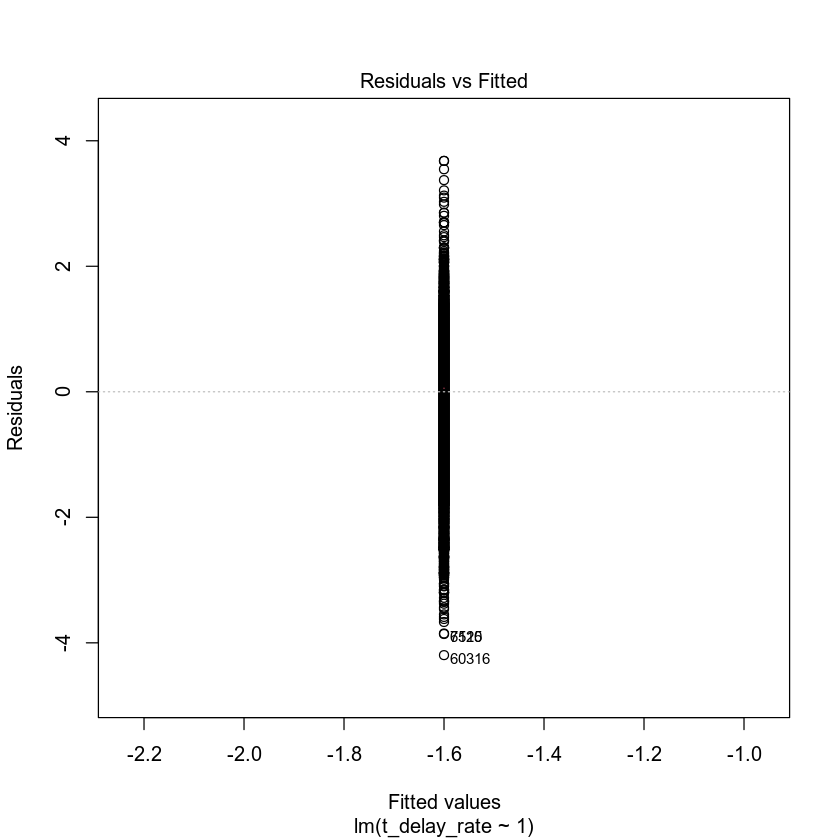

hat values (leverages) are all = 1.467976e-05
 and there are no factor predictors; no plot no. 5



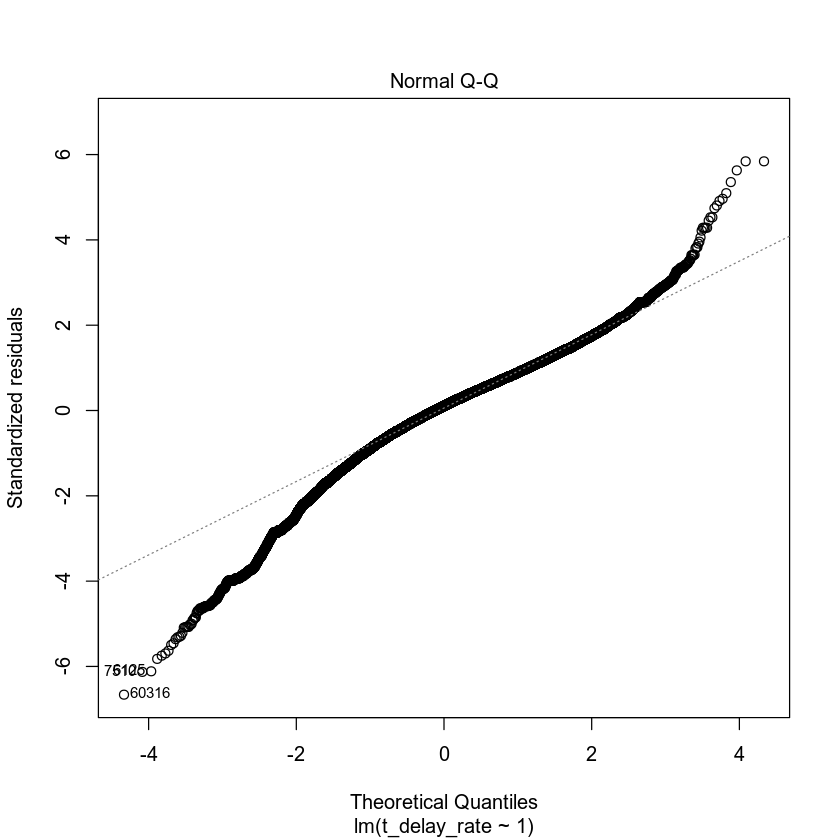

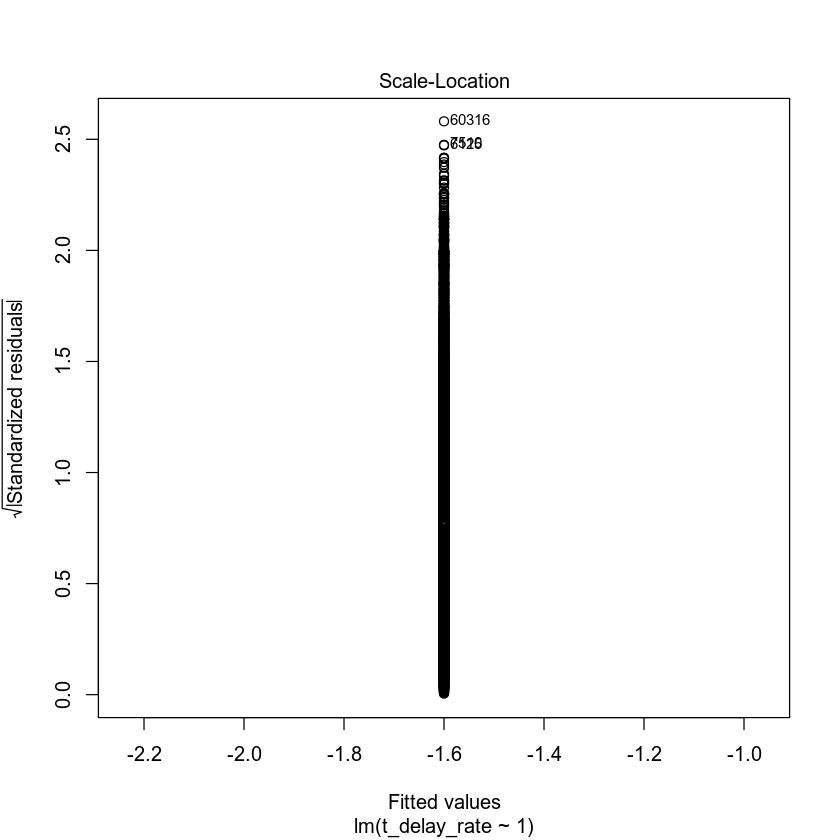

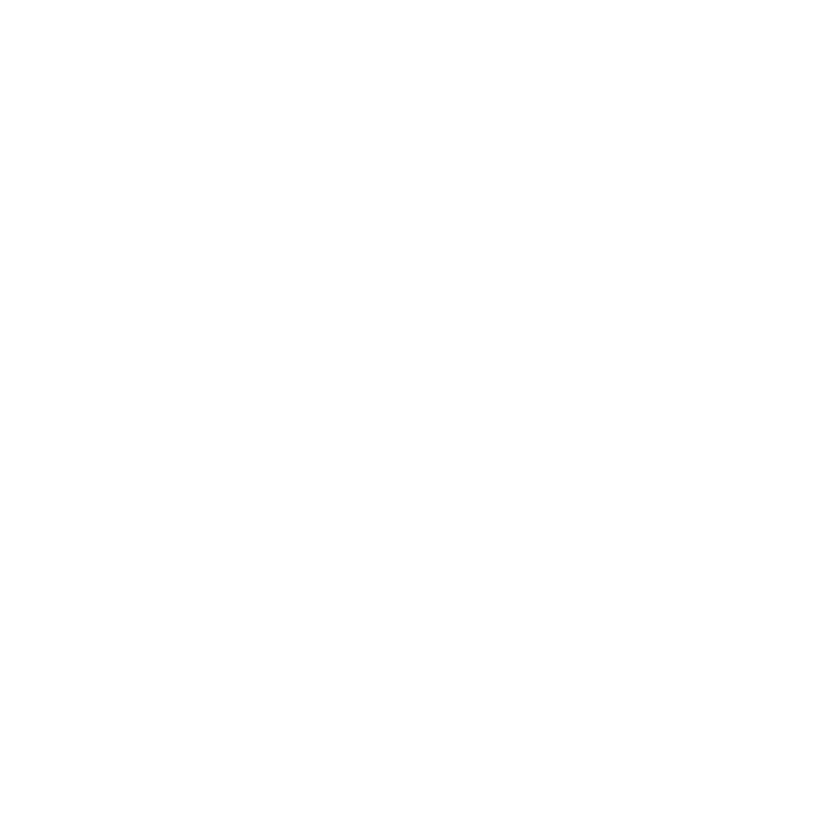

In [86]:
m0 <- lm(t_delay_rate~1,dat=data[finiteFilter,])
summary(m0)
plot(m0)

In [15]:
zm = lm(t_delay_rate~covid + control,data=data[finiteFilter,])

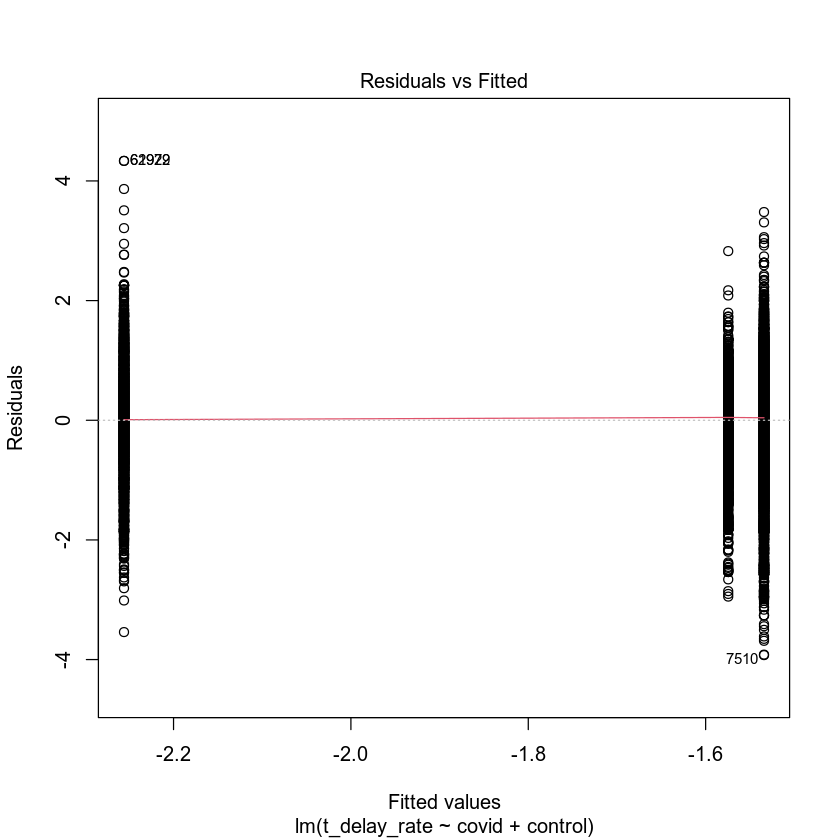

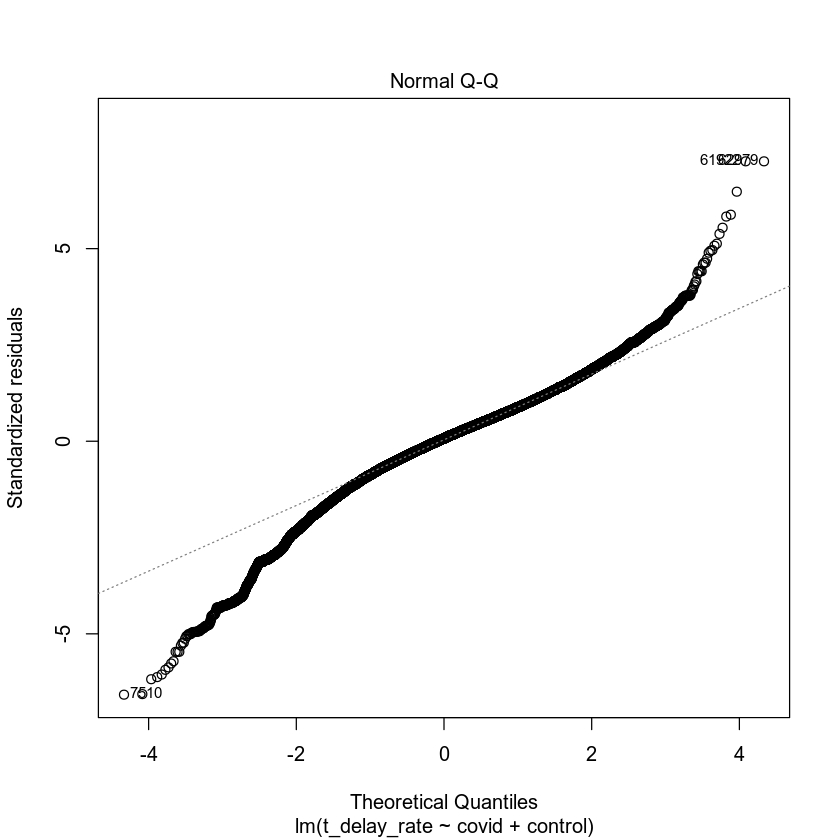

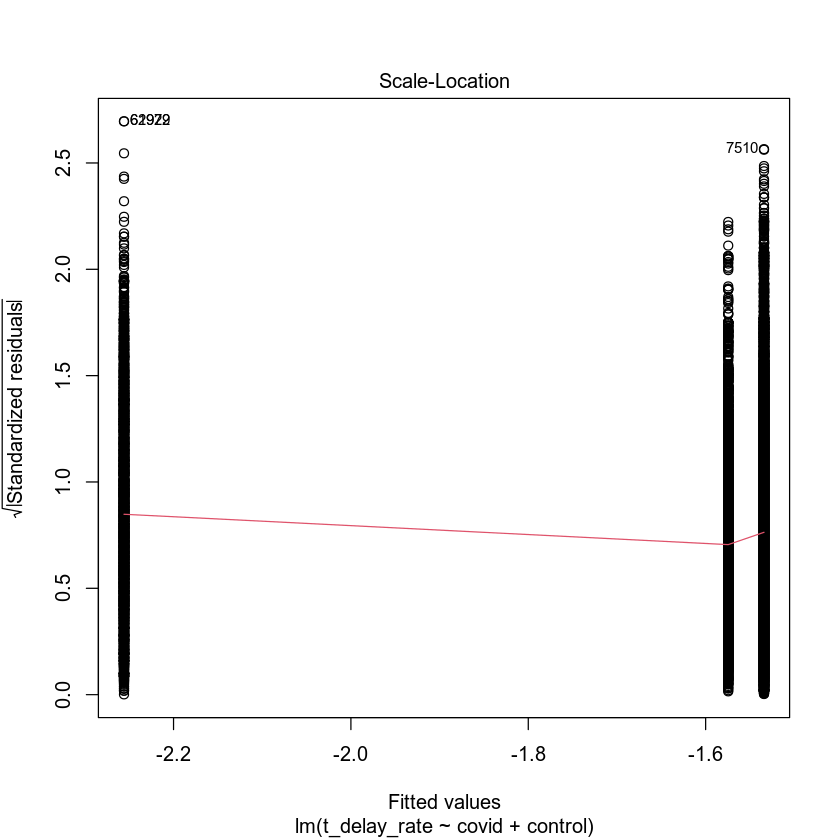

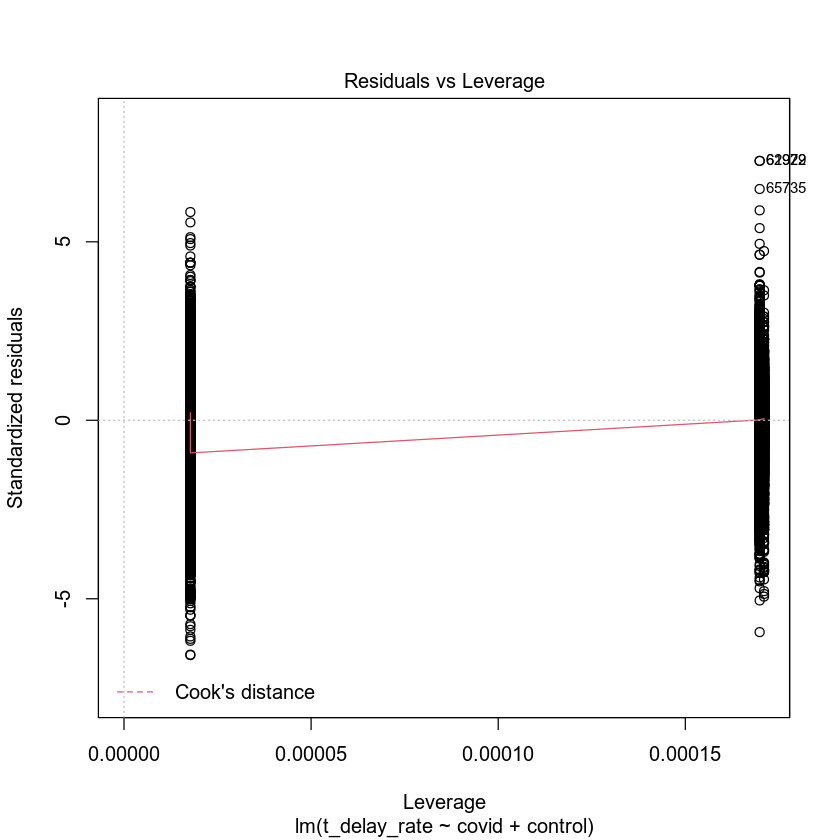

In [16]:
plot(zm)

In [17]:
summary(zm)


Call:
lm(formula = t_delay_rate ~ covid + control, data = data[finiteFilter, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9254 -0.3204  0.0445  0.3659  4.3353 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.534195   0.002513 -610.613  < 2e-16 ***
covid       -0.721664   0.008172  -88.311  < 2e-16 ***
control     -0.040339   0.008197   -4.921 8.63e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5966 on 68118 degrees of freedom
Multiple R-squared:  0.1029,	Adjusted R-squared:  0.1028 
F-statistic:  3905 on 2 and 68118 DF,  p-value: < 2.2e-16



Call:
lm(formula = t_delay_rate ~ covid + control + as.factor(year) + 
    as.factor(month), data = data[finiteFilter, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7797 -0.2553  0.0555  0.3208  4.8410 

Coefficients:
                     Estimate Std. Error  t value Pr(>|t|)    
(Intercept)         -1.591031   0.014649 -108.614  < 2e-16 ***
covid               -0.437579   0.013696  -31.949  < 2e-16 ***
control              0.051962   0.013902    3.738 0.000186 ***
as.factor(year)2004  0.173947   0.015746   11.047  < 2e-16 ***
as.factor(year)2005  0.222790   0.015723   14.170  < 2e-16 ***
as.factor(year)2006  0.431953   0.015661   27.581  < 2e-16 ***
as.factor(year)2007  0.513370   0.015564   32.984  < 2e-16 ***
as.factor(year)2008  0.255422   0.015606   16.367  < 2e-16 ***
as.factor(year)2009  0.107707   0.015645    6.884 5.86e-12 ***
as.factor(year)2010  0.093664   0.015581    6.011 1.85e-09 ***
as.factor(year)2011  0.114234   0.015656    7.296 2.99e-13 ***
as.factor(ye

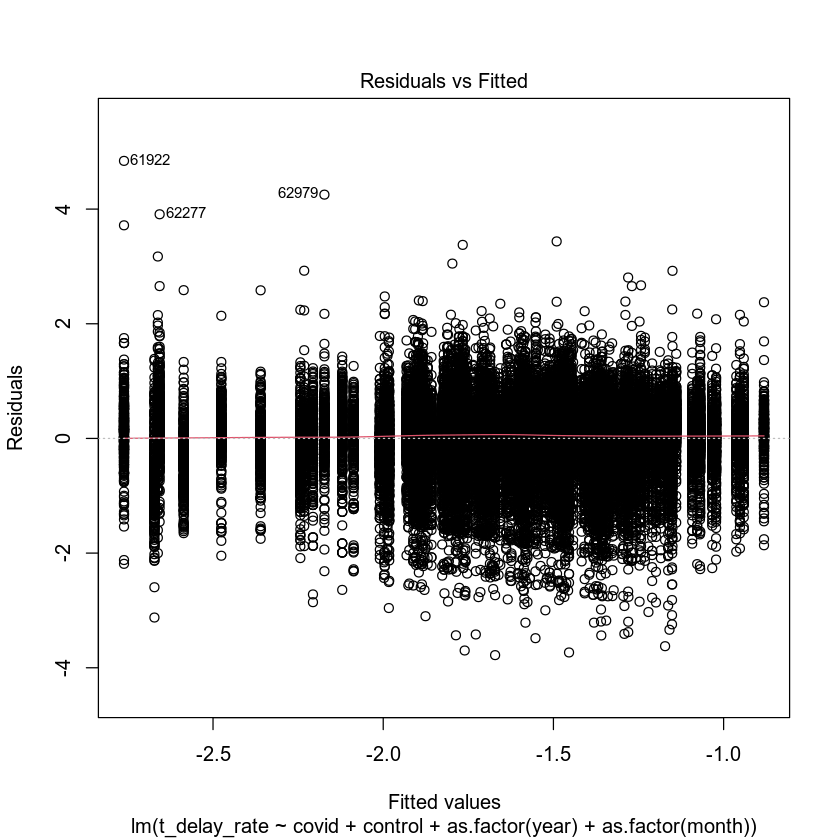

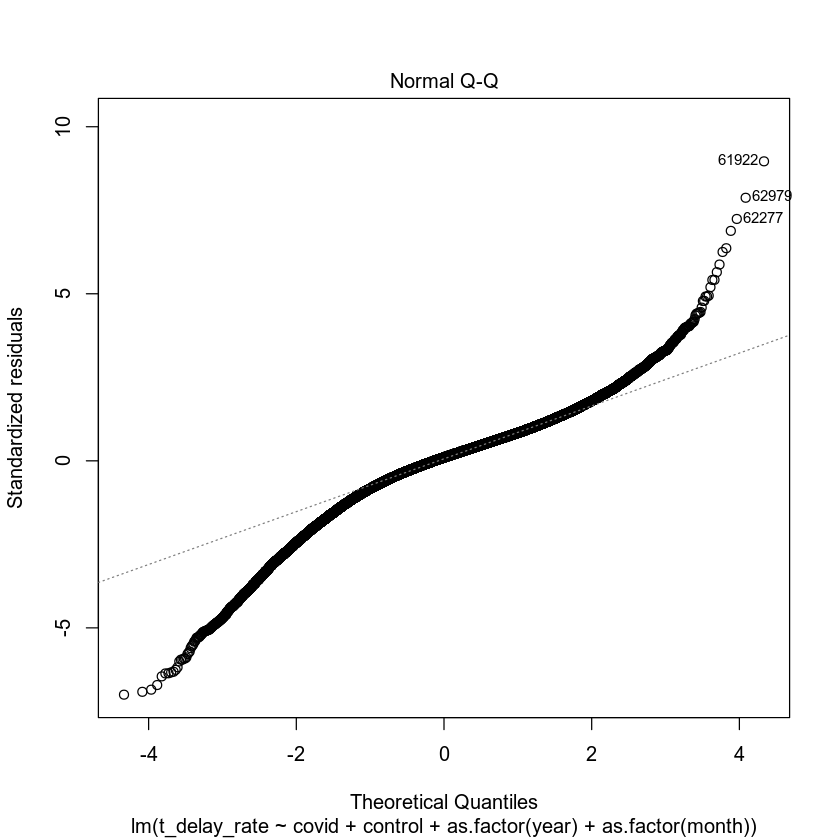

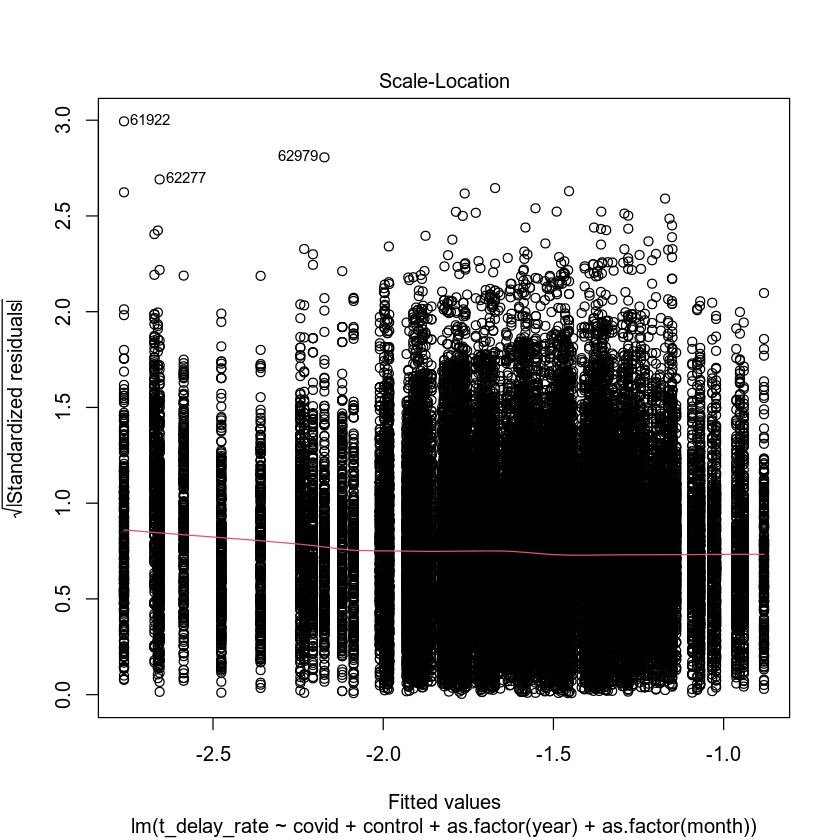

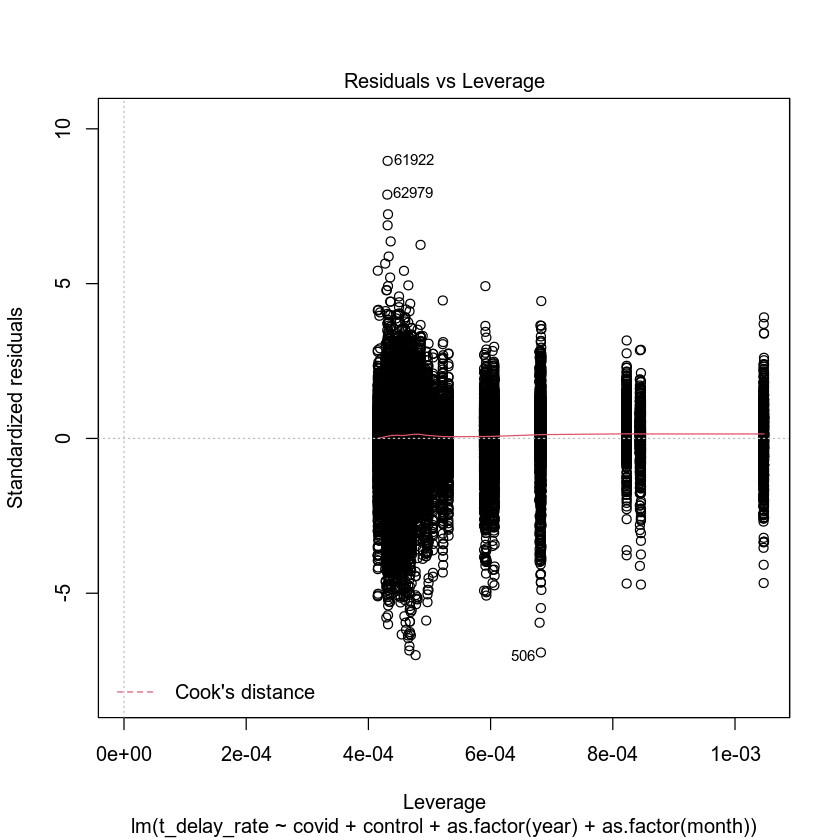

In [18]:
m <- lm(t_delay_rate~covid + control+as.factor(year)+as.factor(month),data=data[finiteFilter,])
summary(m)
plot(m)


Call:
lm(formula = t_delay_rate ~ covid + control + t, data = data[finiteFilter, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0279 -0.3124  0.0472  0.3640  4.3365 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.393e+00  4.917e-03 -283.267   <2e-16 ***
covid       -5.724e-01  9.261e-03  -61.813   <2e-16 ***
control      7.561e-02  8.844e-03    8.549   <2e-16 ***
t           -1.382e-03  4.148e-05  -33.321   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5918 on 68117 degrees of freedom
Multiple R-squared:  0.1173,	Adjusted R-squared:  0.1172 
F-statistic:  3016 on 3 and 68117 DF,  p-value: < 2.2e-16


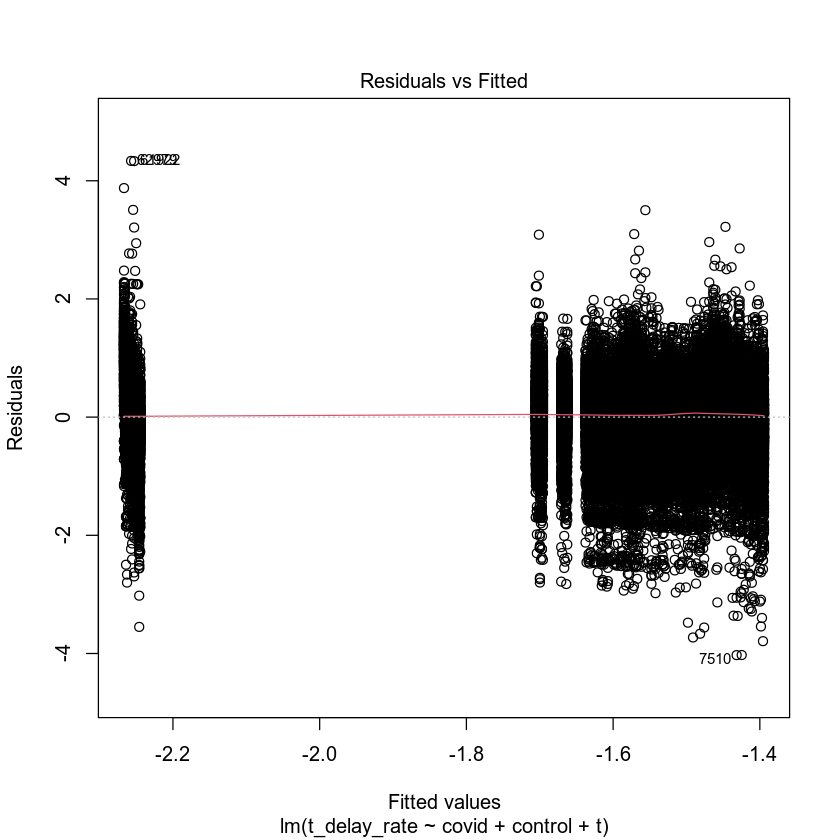

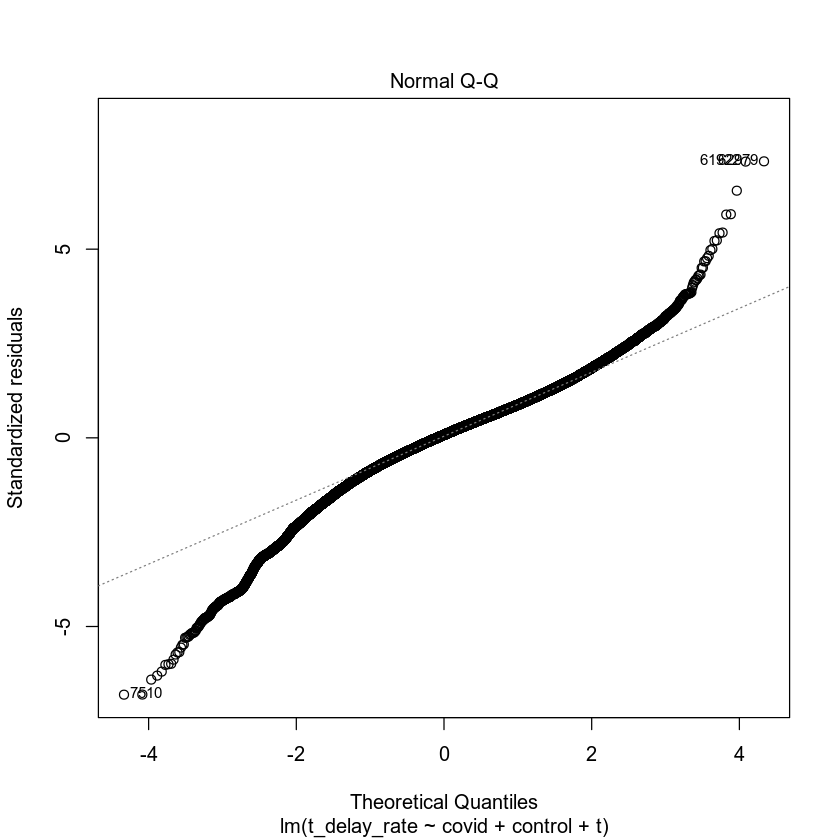

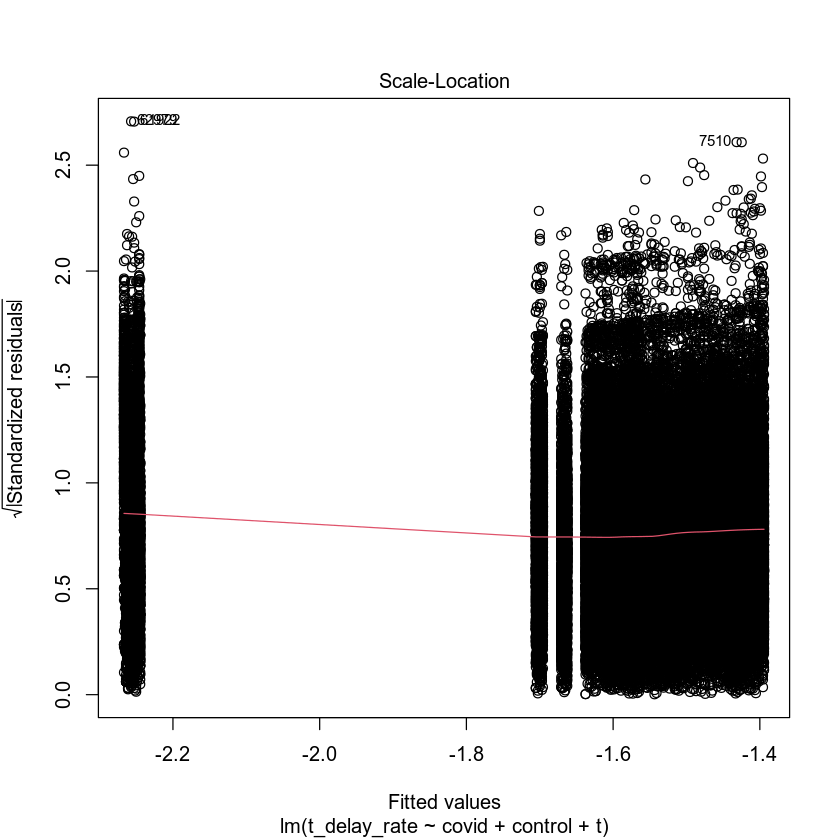

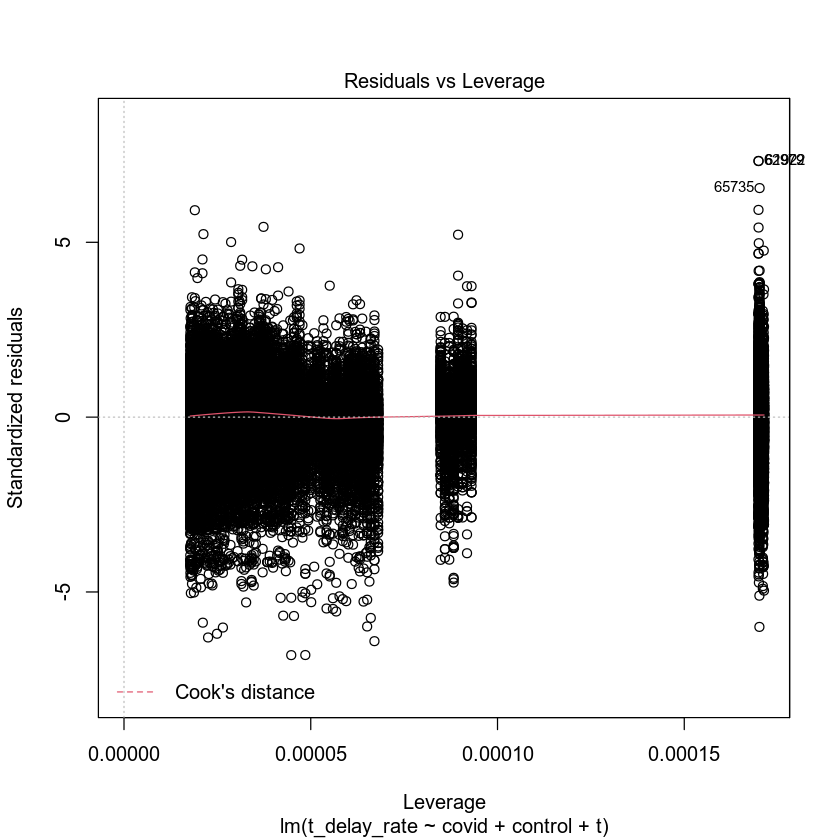

In [19]:
m <- lm(t_delay_rate~covid + control+t,data=data[finiteFilter,])
summary(m)
plot(m)


Call:
lm(formula = t_delay_rate ~ covid + control + t + as.factor(month), 
    data = data[finiteFilter, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0152 -0.2742  0.0502  0.3357  4.6494 

Coefficients:
                     Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        -1.303e+00  8.595e-03 -151.611  < 2e-16 ***
covid              -5.868e-01  8.890e-03  -66.008  < 2e-16 ***
control             6.341e-02  8.482e-03    7.475  7.8e-14 ***
t                  -1.338e-03  3.962e-05  -33.780  < 2e-16 ***
as.factor(month)2   9.499e-03  1.044e-02    0.910    0.363    
as.factor(month)3  -9.549e-02  1.047e-02   -9.123  < 2e-16 ***
as.factor(month)4  -2.962e-01  1.067e-02  -27.751  < 2e-16 ***
as.factor(month)5  -2.083e-01  1.068e-02  -19.509  < 2e-16 ***
as.factor(month)6   1.211e-01  1.048e-02   11.552  < 2e-16 ***
as.factor(month)7   1.335e-01  1.048e-02   12.742  < 2e-16 ***
as.factor(month)8  -1.669e-03  1.043e-02   -0.160    0.873    
as.factor(month)9  -4.017e

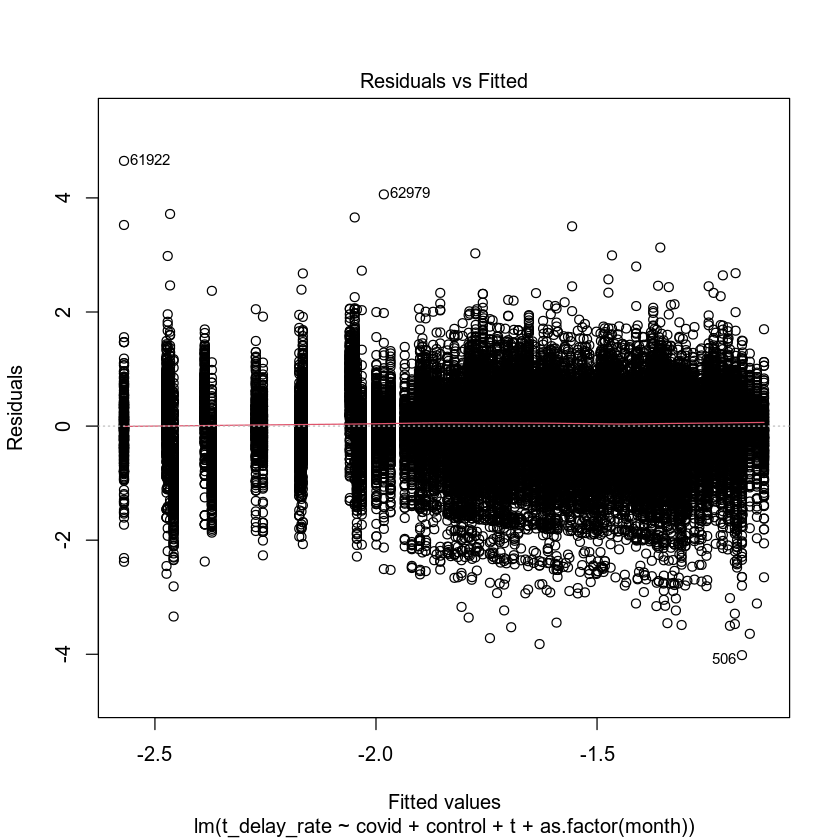

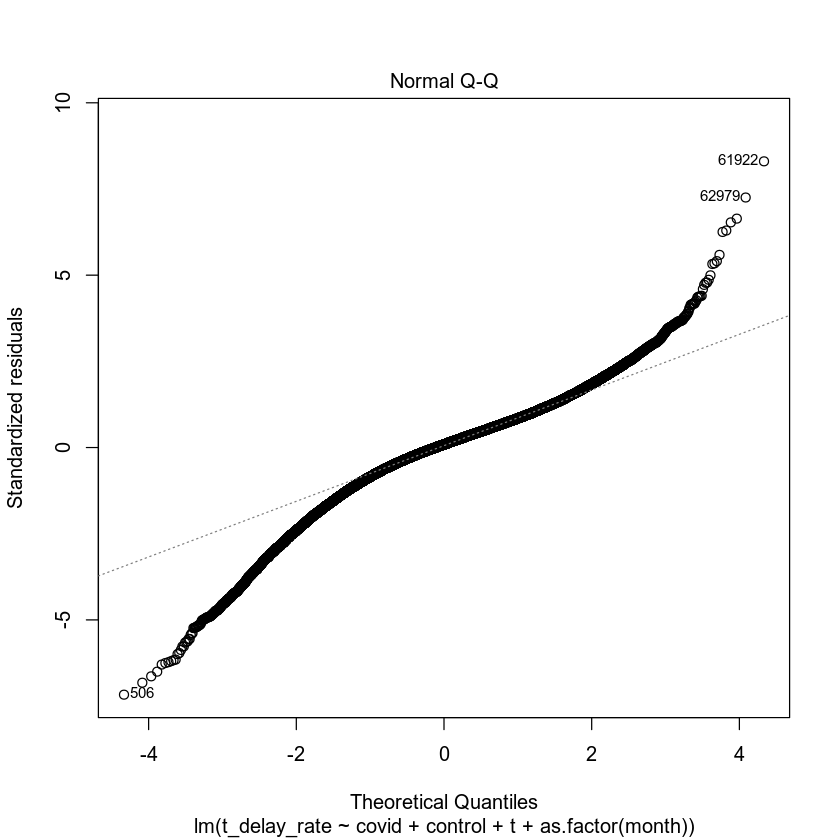

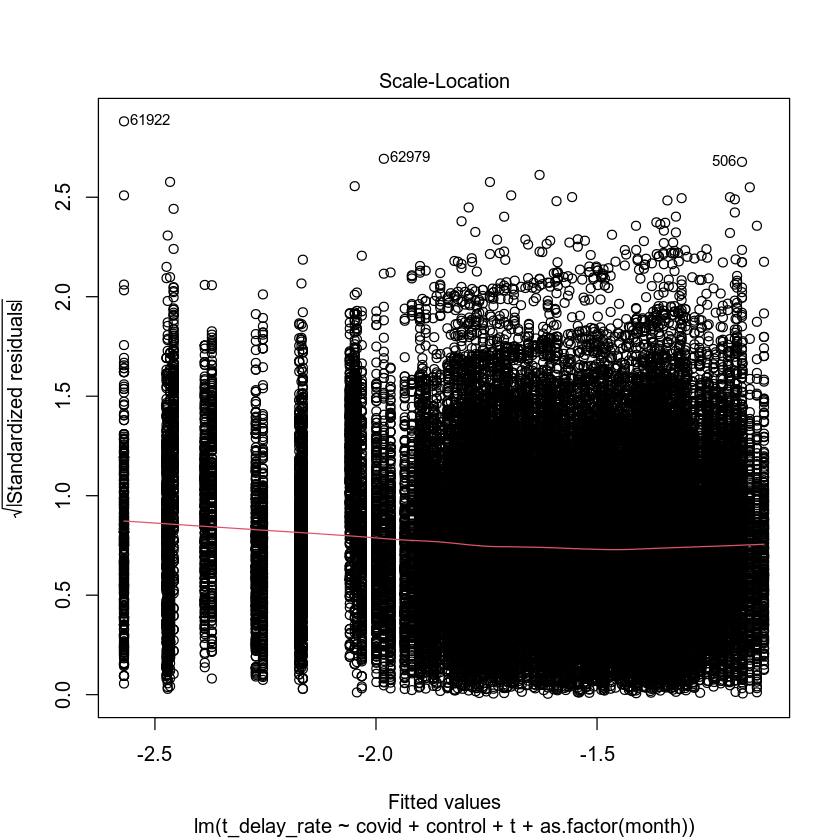

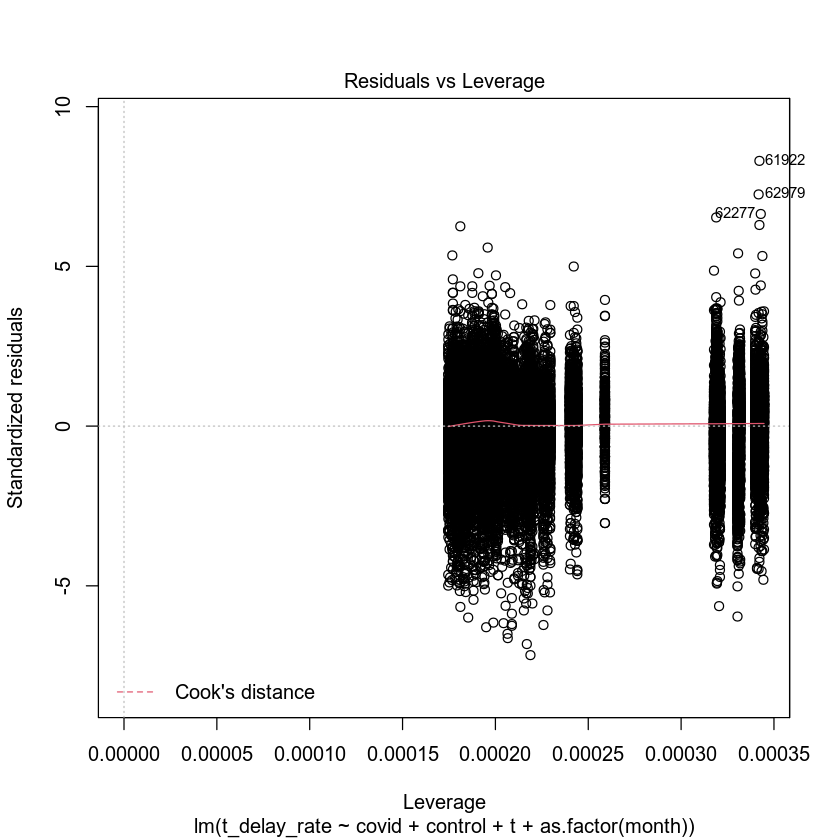

In [20]:
m <- lm(t_delay_rate~covid + control+t+as.factor(month),data=data[finiteFilter,])
summary(m)
plot(m)


Call:
lm(formula = t_delay_rate ~ covid + control + extra_mon + extra_tue + 
    extra_wed + extra_thu + extra_fri + extra_sat + extra_sun, 
    data = data[finiteFilter, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9600 -0.3176  0.0454  0.3666  4.3164 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.590989   0.007248 -219.511  < 2e-16 ***
covid       -0.723199   0.008160  -88.628  < 2e-16 ***
control     -0.041582   0.008185   -5.080 3.78e-07 ***
extra_mon    0.007377   0.006927    1.065  0.28688    
extra_tue    0.074781   0.006827   10.954  < 2e-16 ***
extra_wed    0.006270   0.006986    0.898  0.36943    
extra_thu   -0.003816   0.006877   -0.555  0.57899    
extra_fri    0.031150   0.006926    4.497 6.90e-06 ***
extra_sat    0.068849   0.006840   10.066  < 2e-16 ***
extra_sun   -0.020248   0.006855   -2.954  0.00314 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5957 on 68111 de

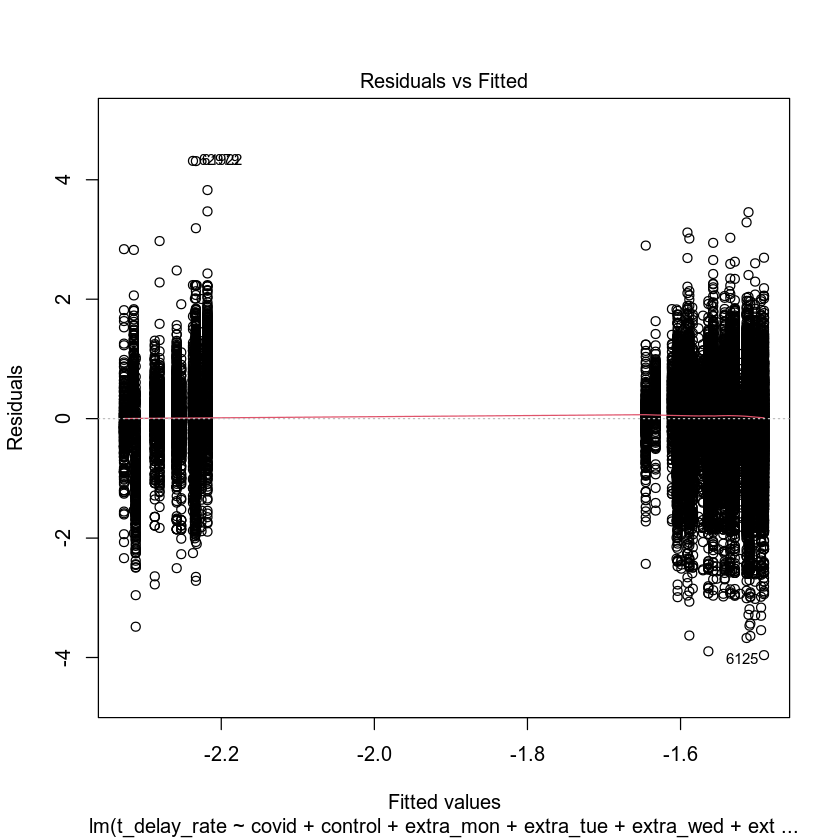

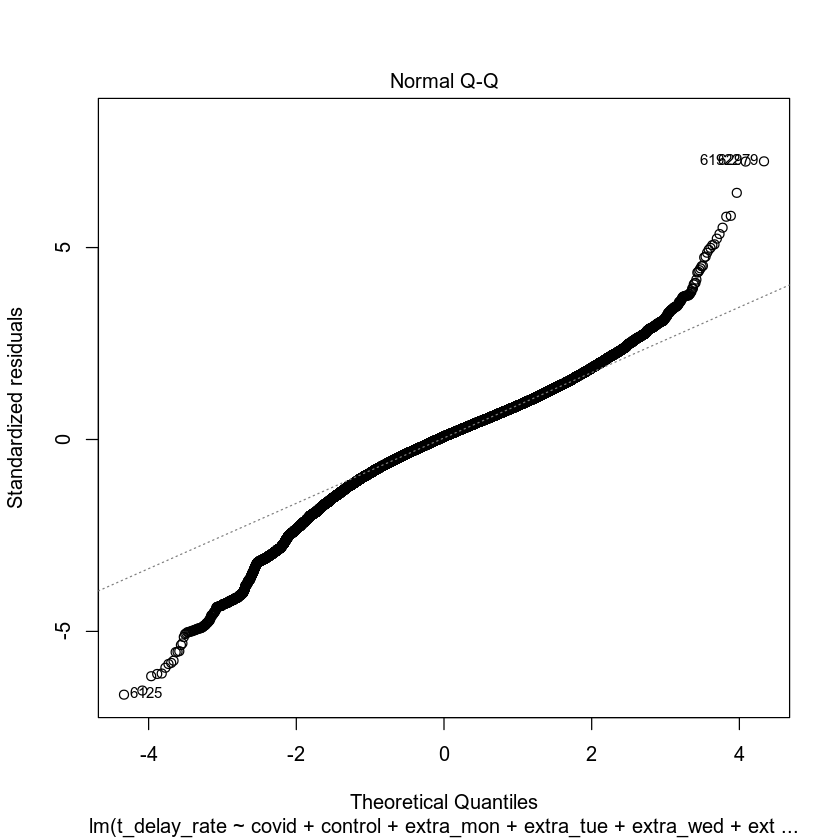

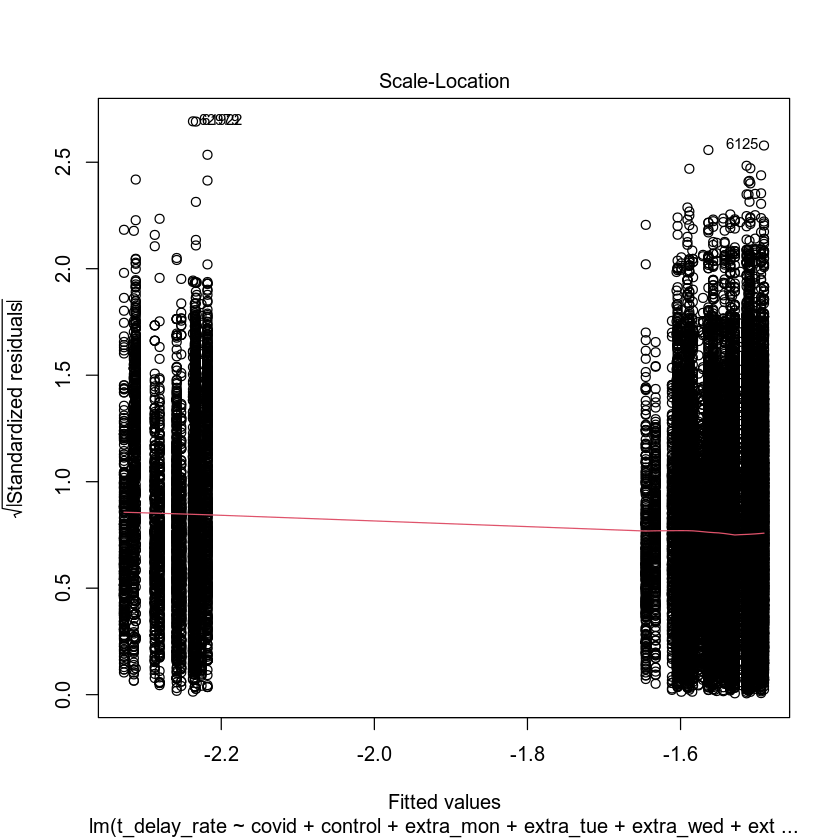

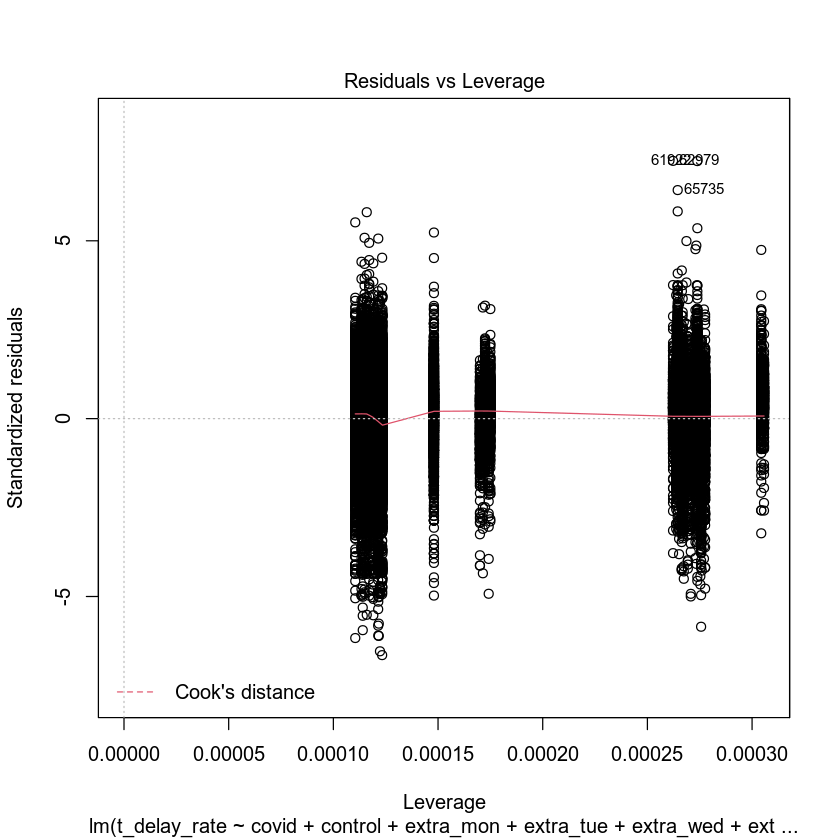

In [21]:
m <- lm(t_delay_rate~covid + control+extra_mon +extra_tue+extra_wed+extra_thu+extra_fri+extra_sat+extra_sun,data=data[finiteFilter,])
summary(m)
plot(m)


Call:
lm(formula = t_delay_rate ~ covid + control + extra_mon + extra_tue + 
    extra_wed + extra_thu + extra_fri + extra_sat + extra_sun + 
    year, data = data[finiteFilter, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0627 -0.3124  0.0458  0.3643  4.3085 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.7352876  1.0008421  30.709  < 2e-16 ***
covid       -0.5777607  0.0092659 -62.354  < 2e-16 ***
control      0.0716157  0.0088470   8.095 5.82e-16 ***
extra_mon    0.0035003  0.0068755   0.509 0.610687    
extra_tue    0.0714217  0.0067758  10.541  < 2e-16 ***
extra_wed    0.0014462  0.0069348   0.209 0.834810    
extra_thu   -0.0038337  0.0068248  -0.562 0.574303    
extra_fri    0.0235608  0.0068780   3.426 0.000614 ***
extra_sat    0.0674499  0.0067880   9.937  < 2e-16 ***
extra_sun   -0.0254479  0.0068047  -3.740 0.000184 ***
year        -0.0160671  0.0004974 -32.300  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0

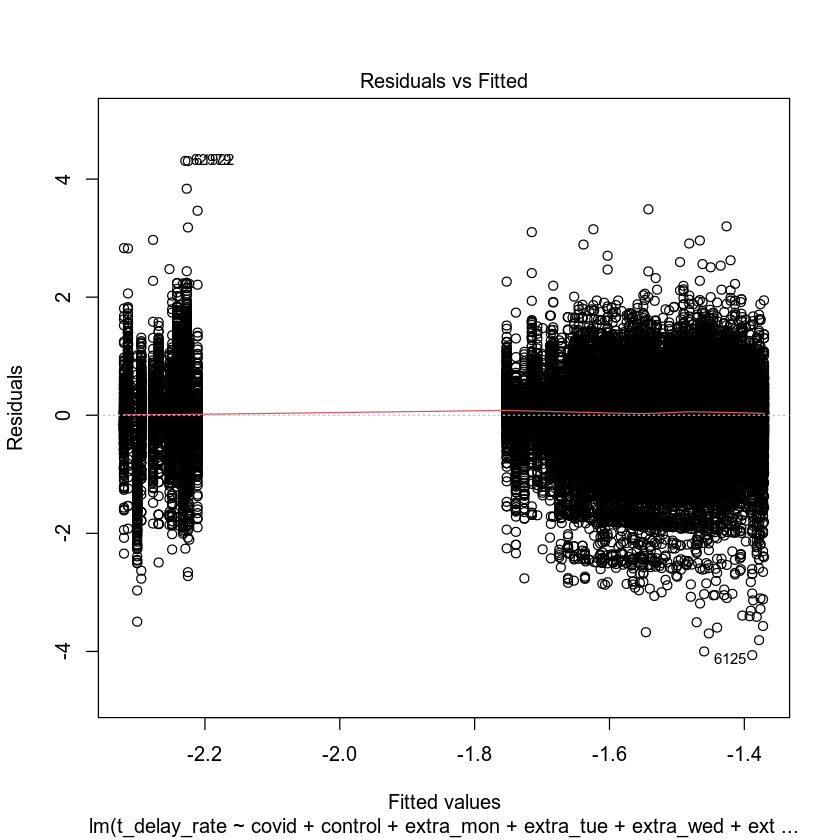

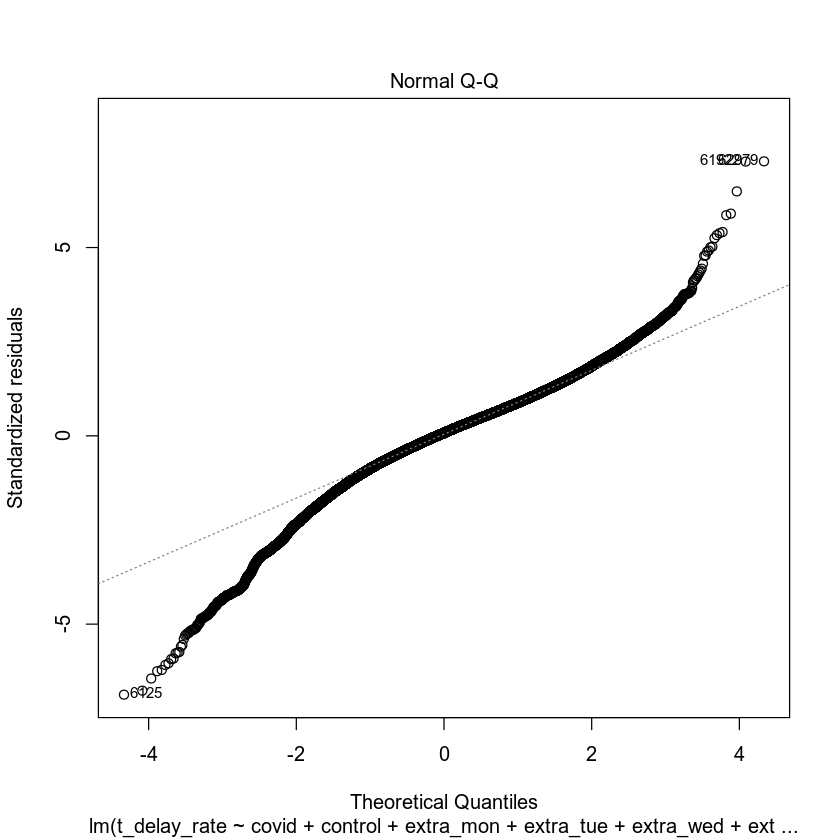

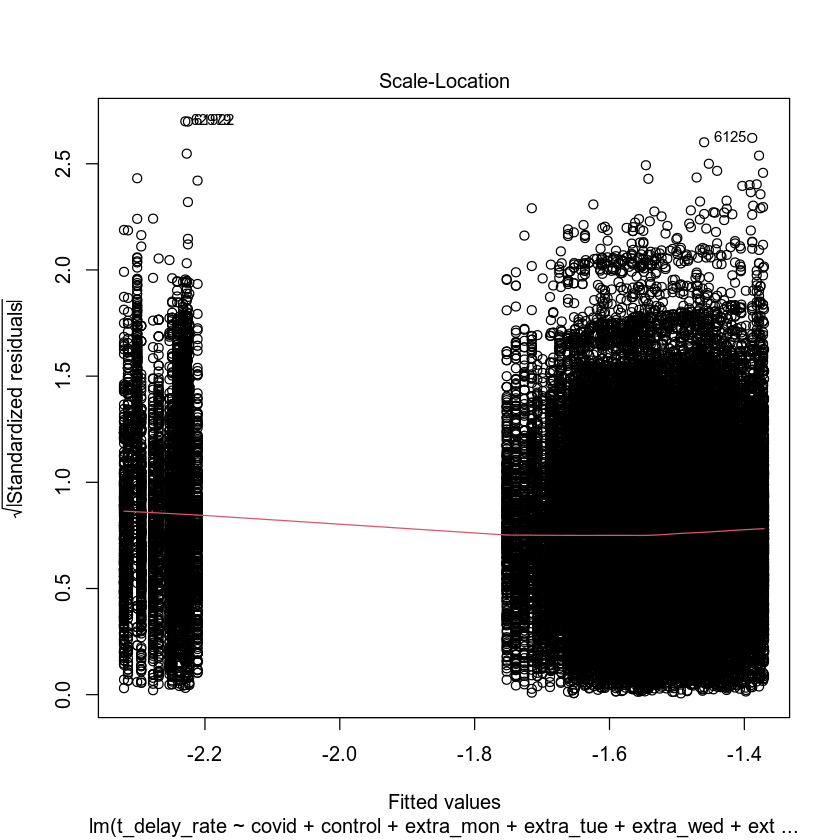

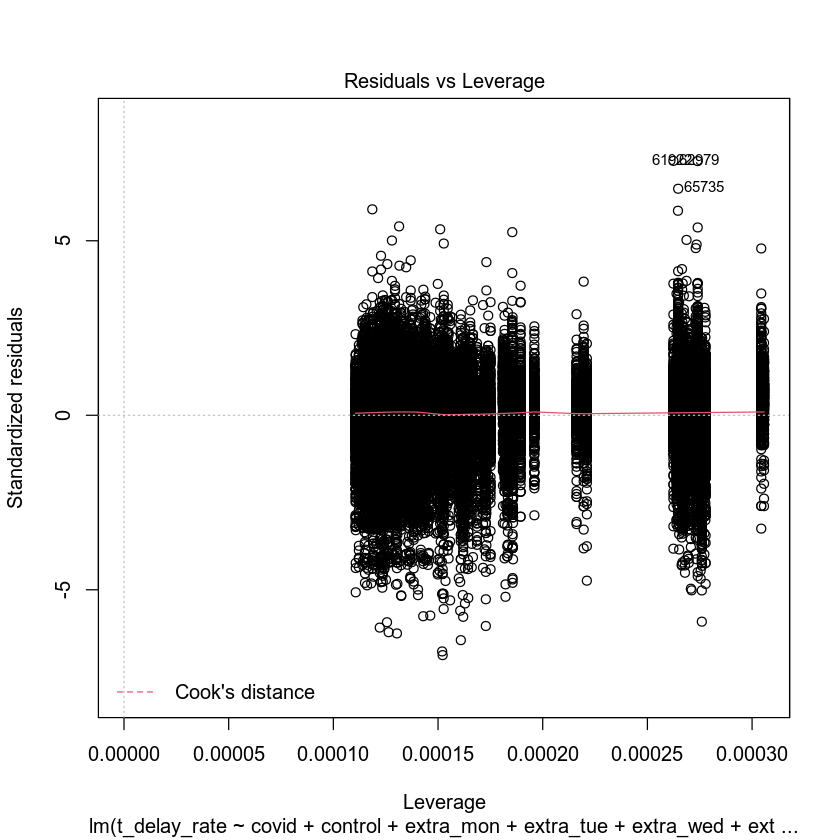

In [22]:
m <- lm(t_delay_rate~covid + control+extra_mon +extra_tue+extra_wed+extra_thu+extra_fri+extra_sat+extra_sun+year,data=data[finiteFilter,])
summary(m)
plot(m)


Call:
lm(formula = t_delay_rate ~ covid + control + extra_mon + extra_tue + 
    extra_wed + extra_thu + extra_fri + extra_sat + extra_sun + 
    year + as.factor(month), data = data[finiteFilter, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0244 -0.2726  0.0491  0.3339  4.6257 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        31.4086560  0.9566829  32.831  < 2e-16 ***
covid              -0.5905030  0.0088823 -66.481  < 2e-16 ***
control             0.0600615  0.0084752   7.087 1.39e-12 ***
extra_mon          -0.1903124  0.0177596 -10.716  < 2e-16 ***
extra_tue          -0.1231646  0.0183828  -6.700 2.10e-11 ***
extra_wed          -0.1947599  0.0175601 -11.091  < 2e-16 ***
extra_thu          -0.1908049  0.0184016 -10.369  < 2e-16 ***
extra_fri          -0.1693033  0.0178303  -9.495  < 2e-16 ***
extra_sat          -0.1298573  0.0178919  -7.258 3.97e-13 ***
extra_sun          -0.2079840  0.0180809 -11.503  < 2e-16 ***
year    

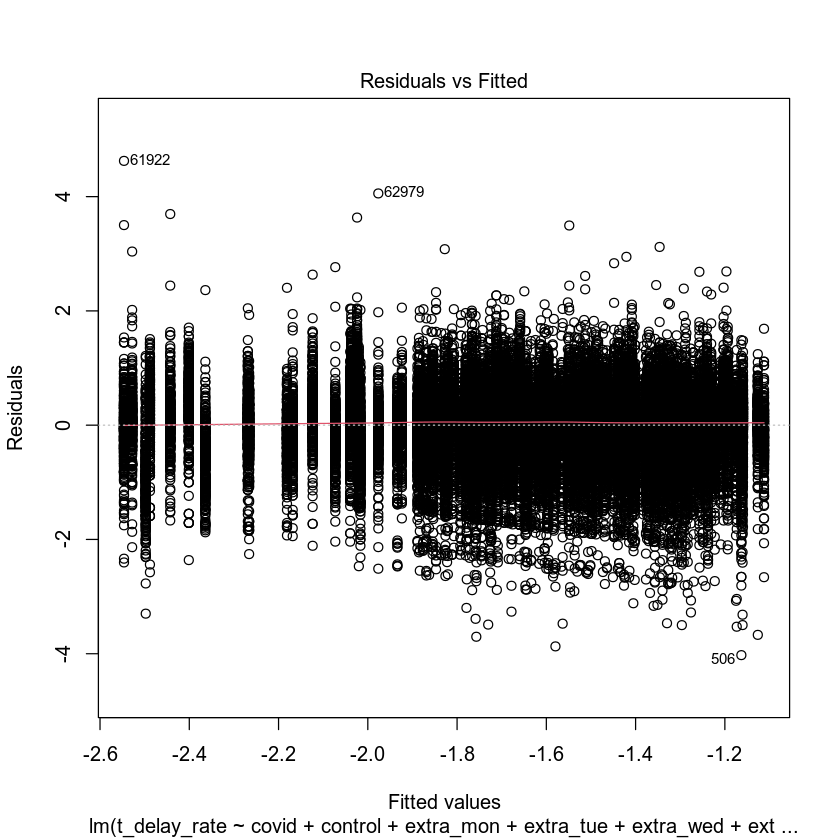

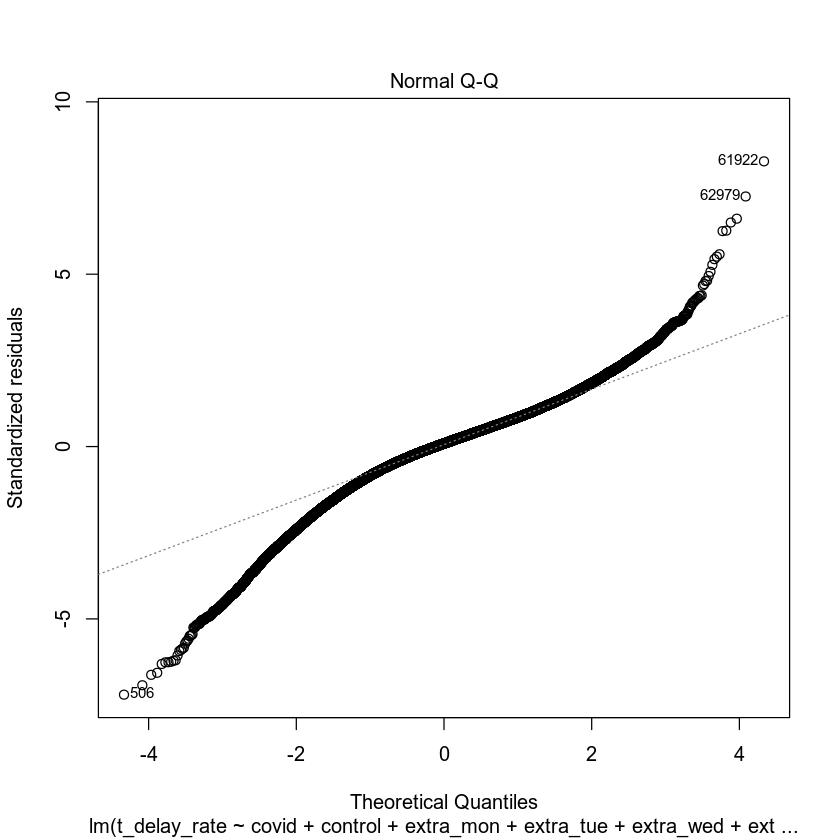

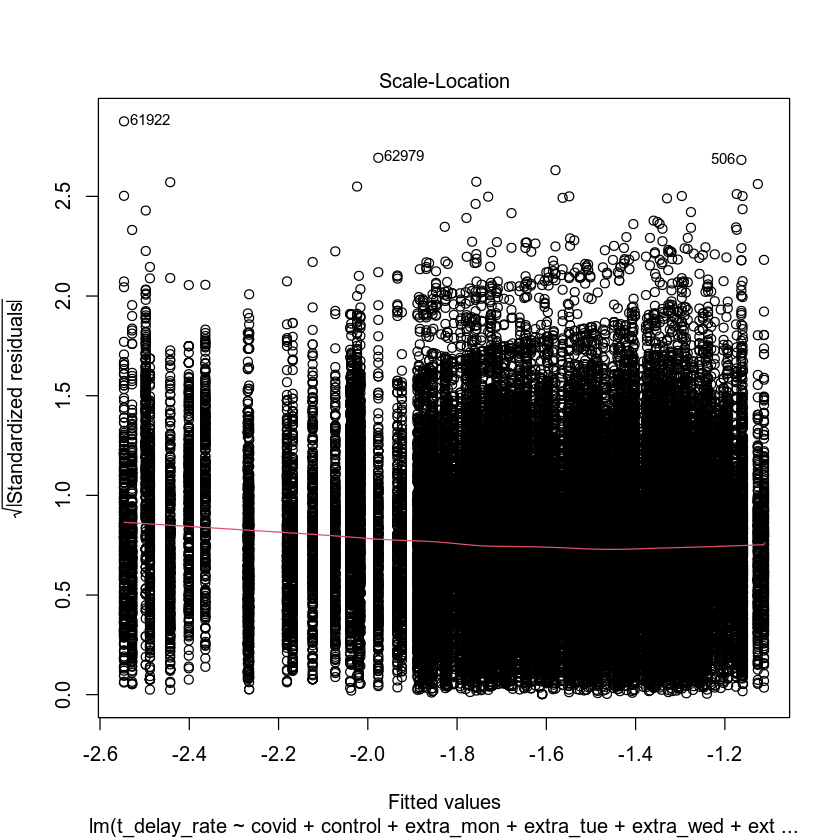

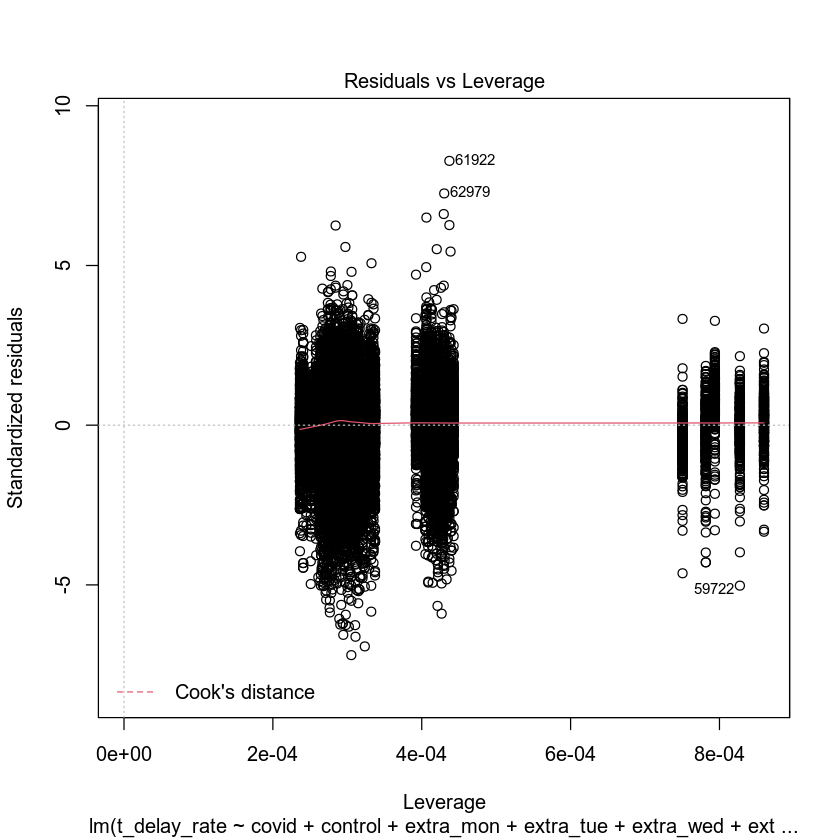

In [23]:
m <- lm(t_delay_rate~covid + control+extra_mon +extra_tue+extra_wed+extra_thu+extra_fri+extra_sat+extra_sun+year+as.factor(month),data=data[finiteFilter,])
summary(m)
plot(m)


Call:
lm(formula = t_delay_rate ~ covid + extra_mon + extra_tue + extra_wed + 
    extra_thu + extra_fri + extra_sat + extra_sun + year, data = data[finiteFilter, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0583 -0.3133  0.0463  0.3650  4.3093 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.530984   0.919671  29.936  < 2e-16 ***
covid       -0.597884   0.008930 -66.949  < 2e-16 ***
extra_mon    0.004187   0.006878   0.609 0.542680    
extra_tue    0.072009   0.006779  10.623  < 2e-16 ***
extra_wed    0.002331   0.006937   0.336 0.736848    
extra_thu   -0.003793   0.006828  -0.556 0.578528    
extra_fri    0.024741   0.006880   3.596 0.000323 ***
extra_sat    0.067957   0.006791  10.007  < 2e-16 ***
extra_sun   -0.024733   0.006807  -3.633 0.000280 ***
year        -0.014472   0.000457 -31.670  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5915 on 68111 degrees of freed

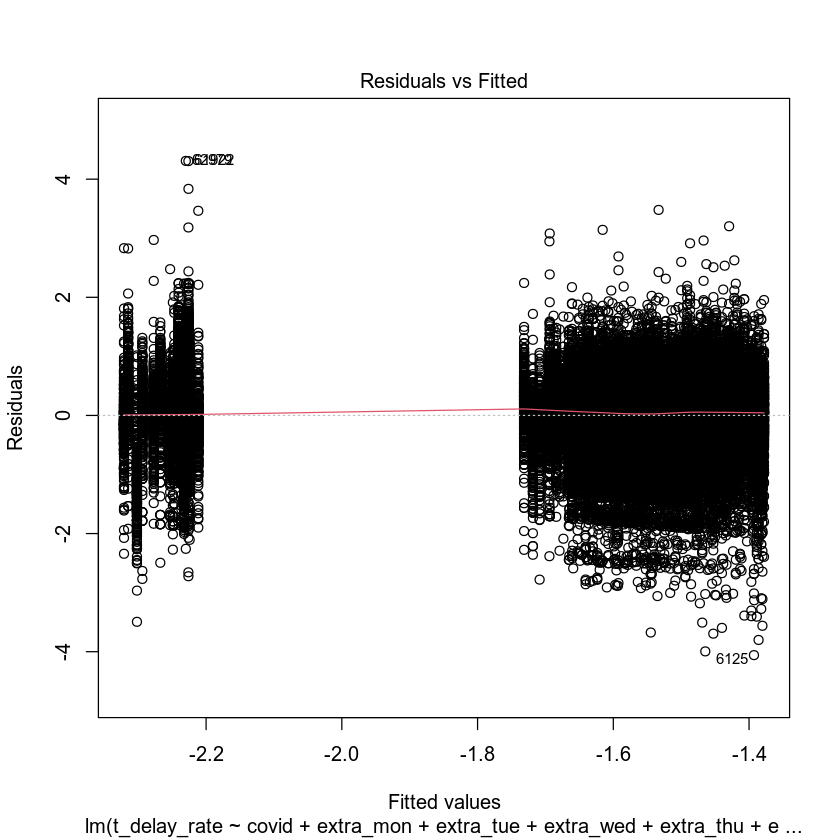

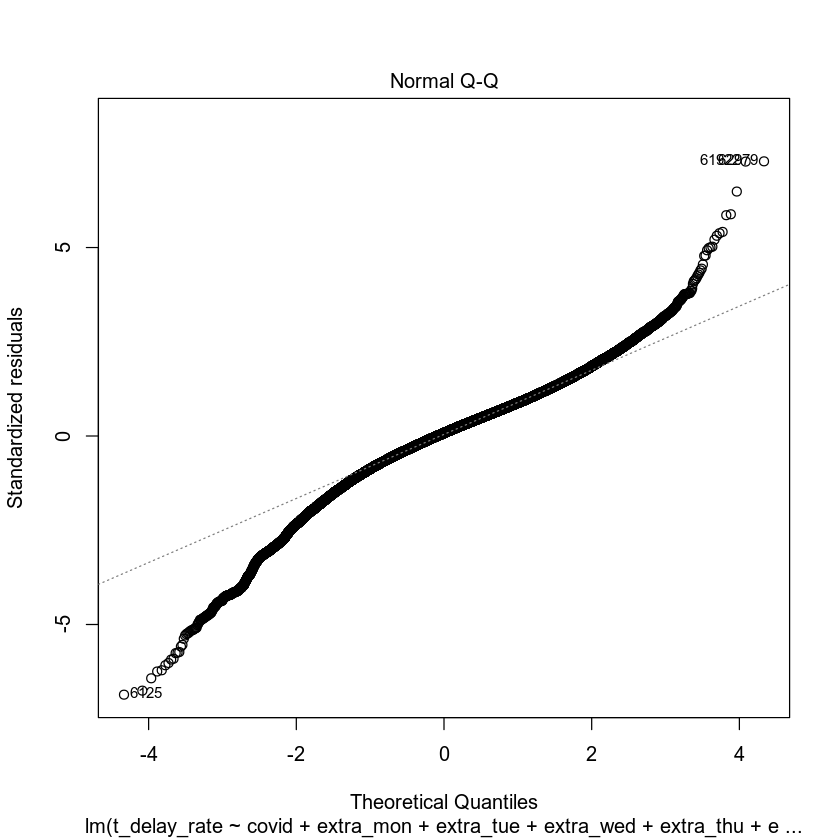

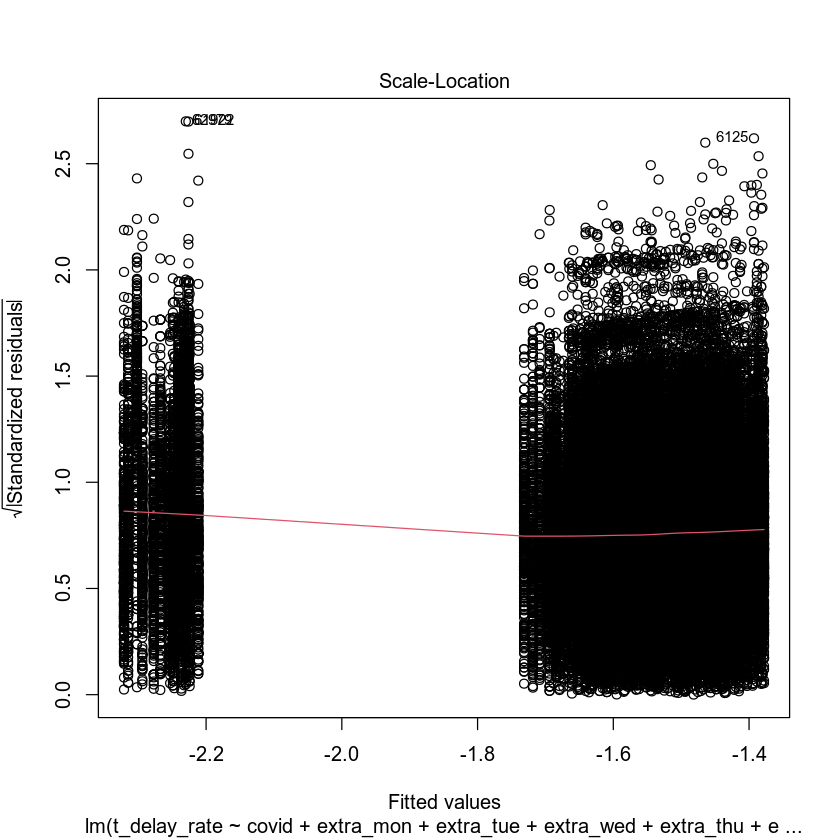

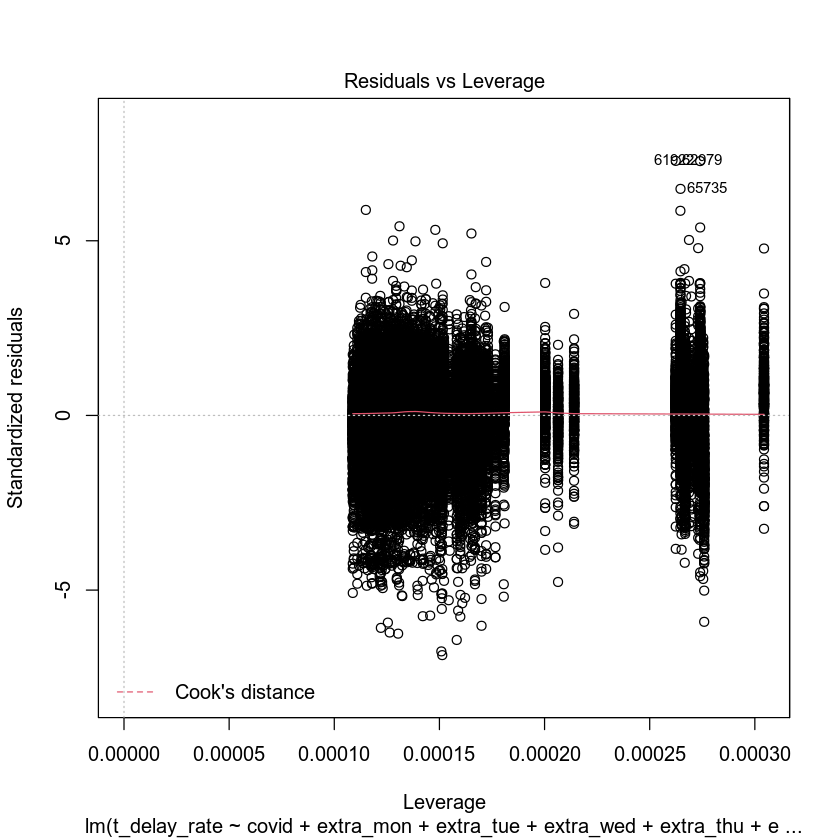

In [24]:
m <- lm(t_delay_rate~covid + extra_mon +extra_tue+extra_wed+extra_thu+extra_fri+extra_sat+extra_sun+year,data=data[finiteFilter,])
summary(m)
plot(m)


Call:
lm(formula = t_delay_rate ~ covid + control + arr_flights, data = data[finiteFilter, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9129 -0.3235  0.0423  0.3653  4.3441 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.548e+00  2.721e-03 -569.15  < 2e-16 ***
covid       -7.162e-01  8.171e-03  -87.66  < 2e-16 ***
control     -3.987e-02  8.186e-03   -4.87 1.12e-06 ***
arr_flights  7.760e-06  5.711e-07   13.59  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5958 on 68117 degrees of freedom
Multiple R-squared:  0.1053,	Adjusted R-squared:  0.1053 
F-statistic:  2672 on 3 and 68117 DF,  p-value: < 2.2e-16


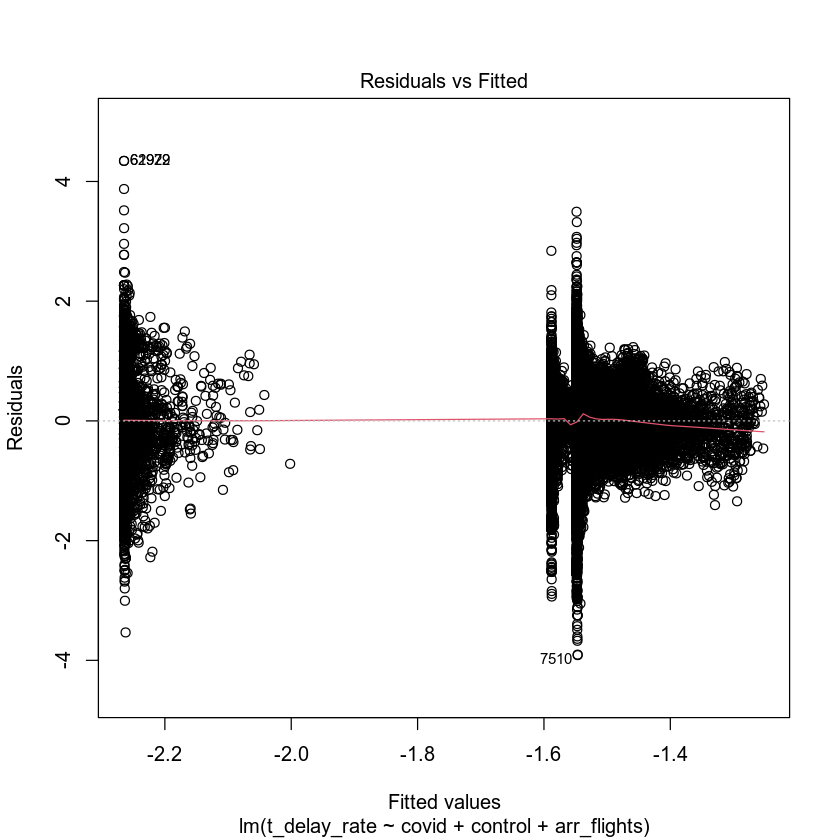

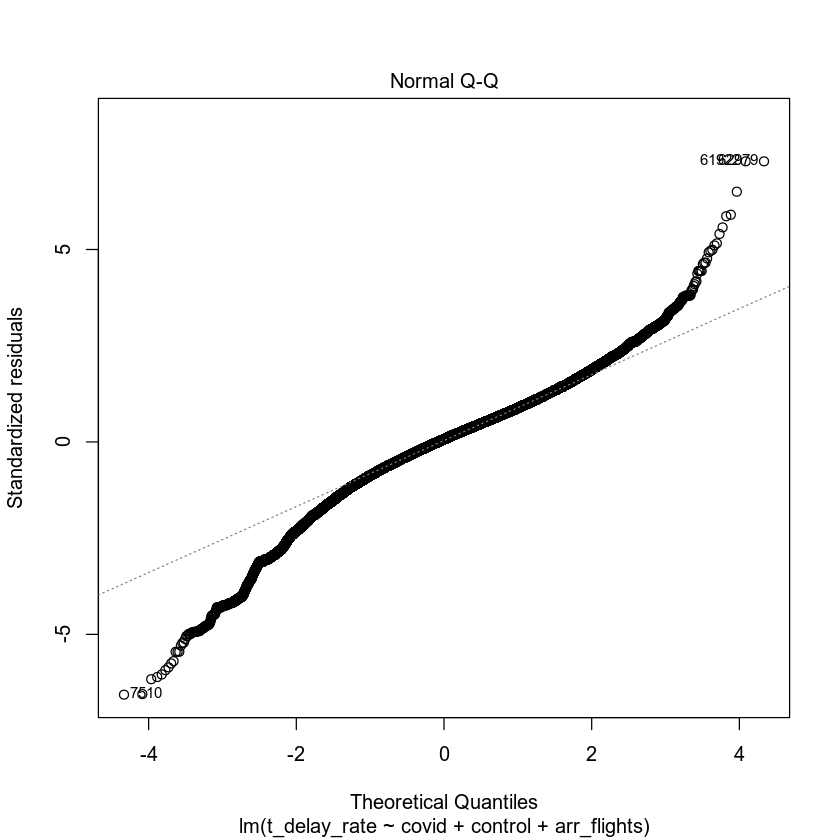

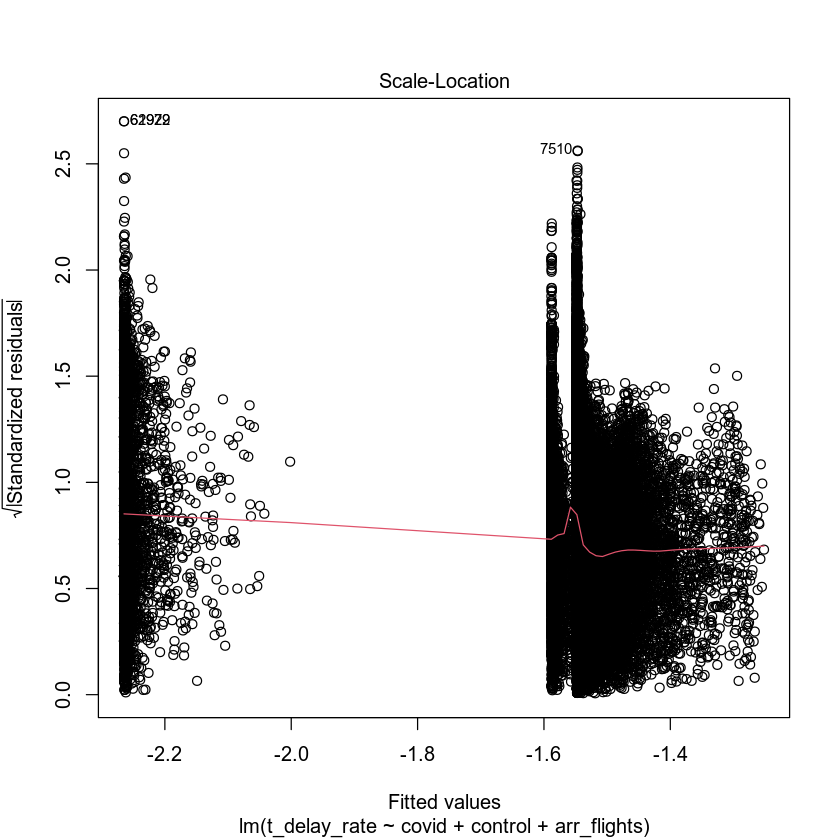

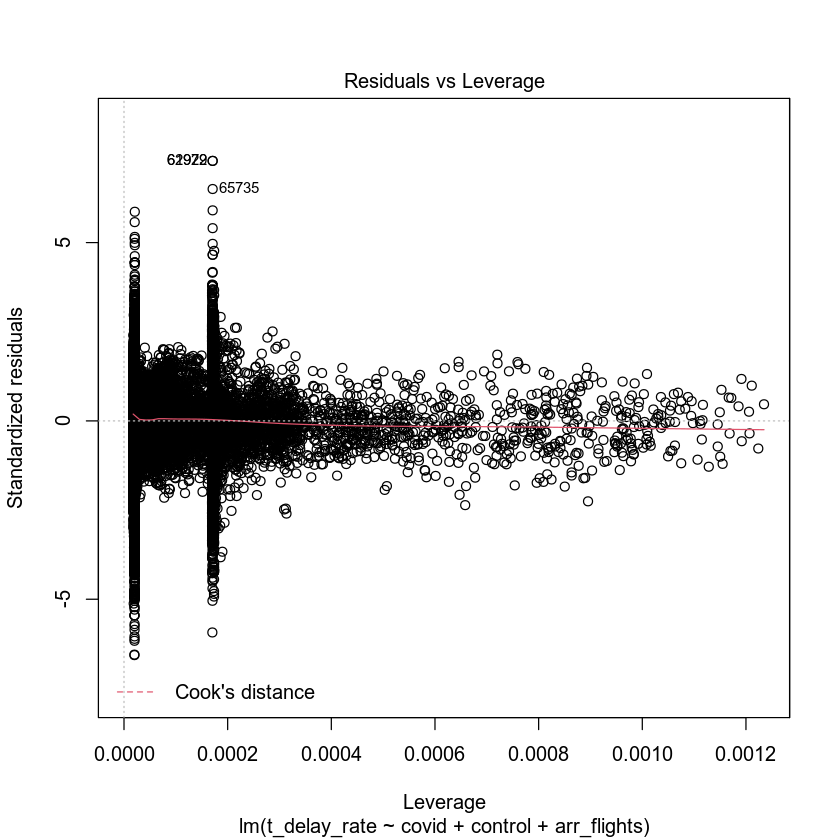

In [25]:
m <- lm(t_delay_rate~covid + control+arr_flights,data=data[finiteFilter,])
summary(m)
plot(m)


Call:
lm(formula = t_delay_rate ~ covid + arr_flights, data = data[filterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5321 -0.3257  0.0331  0.3615  4.3466 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.592e+00  8.943e-03 -178.062  < 2e-16 ***
covid       -6.749e-01  1.196e-02  -56.445  < 2e-16 ***
arr_flights  1.001e-05  1.667e-06    6.005 1.97e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.645 on 11731 degrees of freedom
Multiple R-squared:   0.22,	Adjusted R-squared:  0.2199 
F-statistic:  1655 on 2 and 11731 DF,  p-value: < 2.2e-16


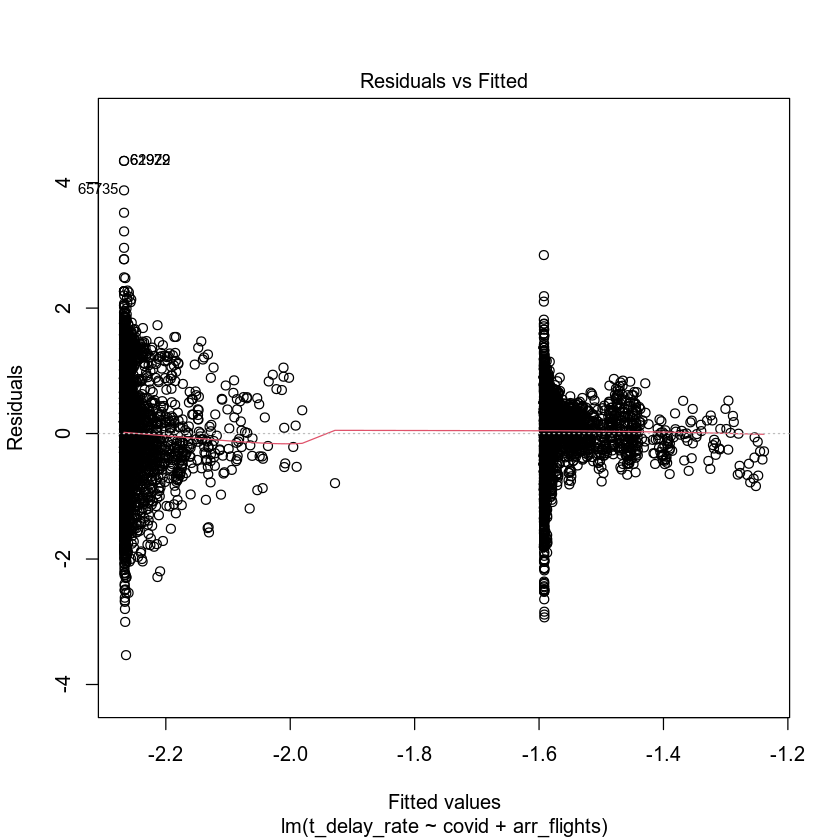

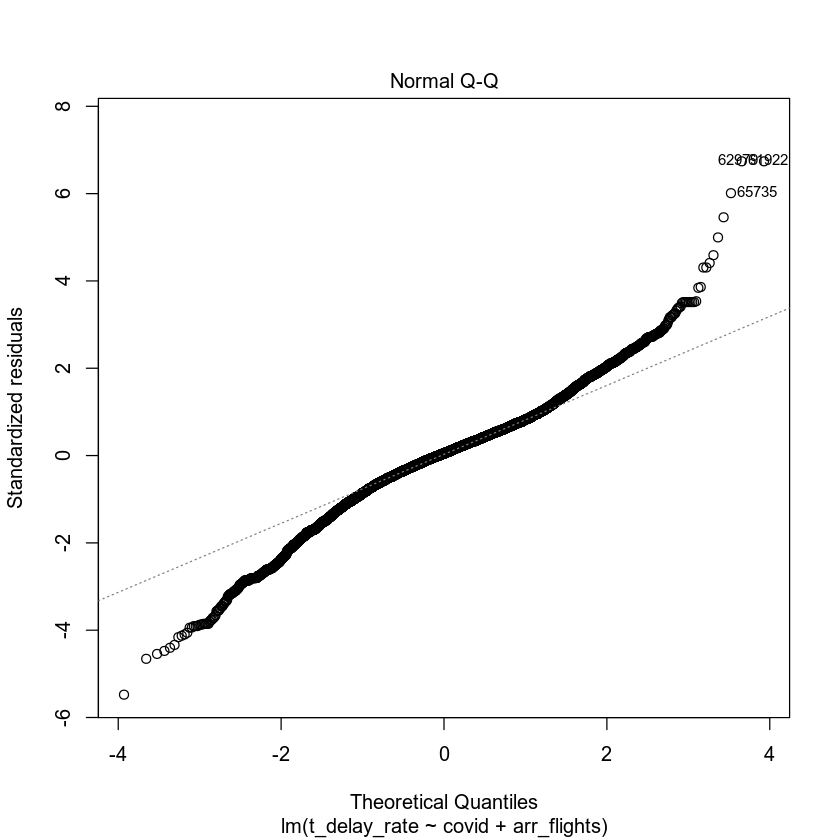

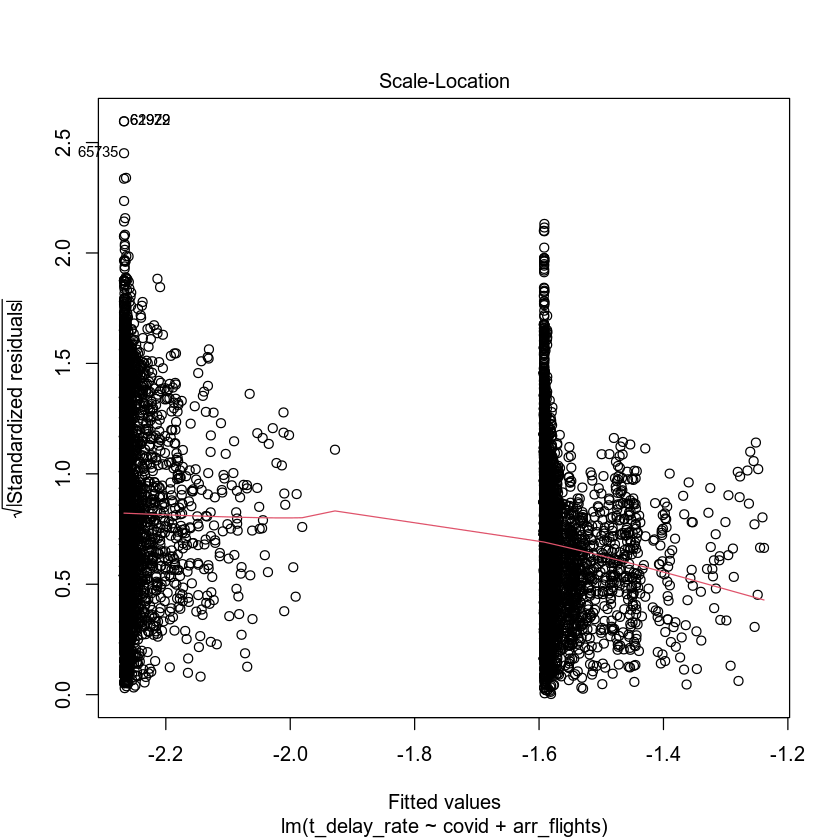

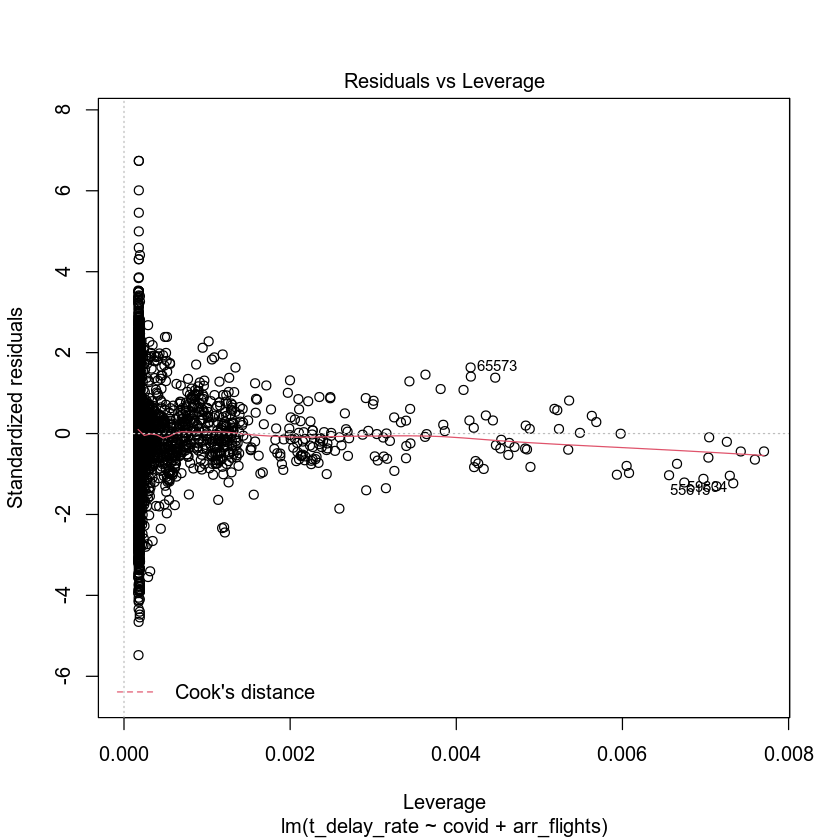

In [26]:
m <- lm(t_delay_rate~covid +arr_flights,data=data[filterTest,])
summary(m)
plot(m)
m_ca <- m


Call:
lm(formula = t_delay_rate ~ arr_flights, data = data[filterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8589 -0.4507  0.0795  0.5134  4.0225 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.943e+00  7.249e-03 -268.058   <2e-16 ***
arr_flights  1.842e-05  1.872e-06    9.836   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7273 on 11732 degrees of freedom
Multiple R-squared:  0.008179,	Adjusted R-squared:  0.008094 
F-statistic: 96.75 on 1 and 11732 DF,  p-value: < 2.2e-16


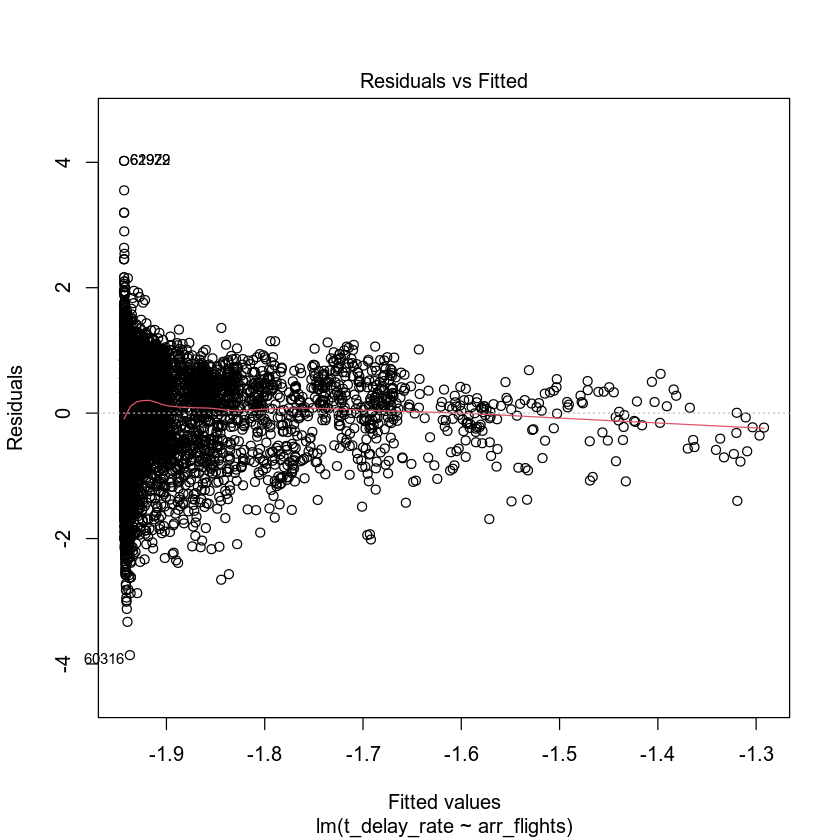

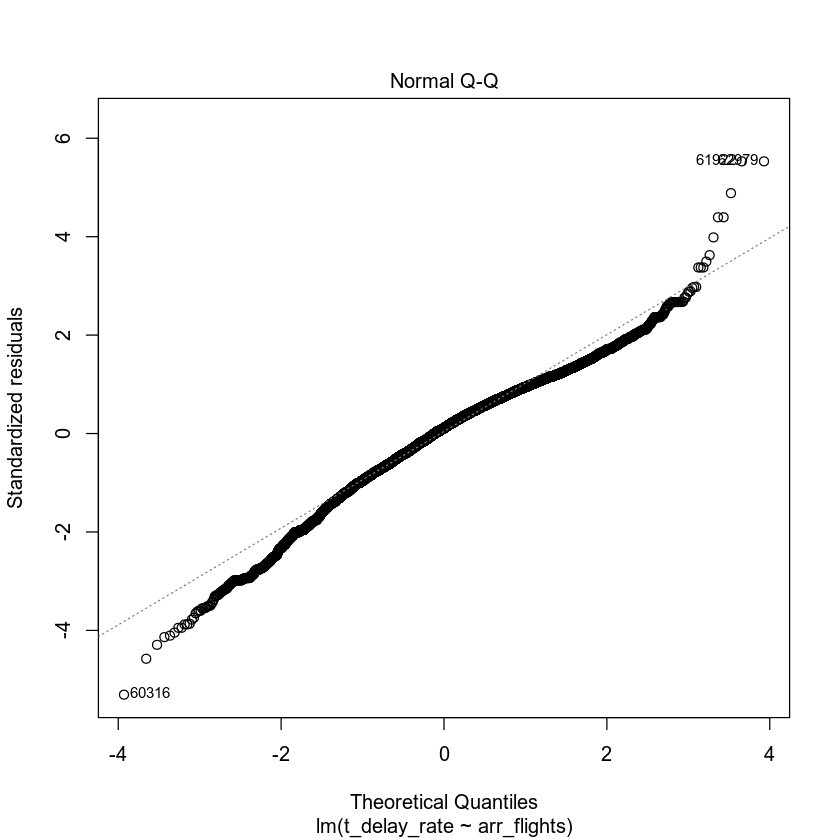

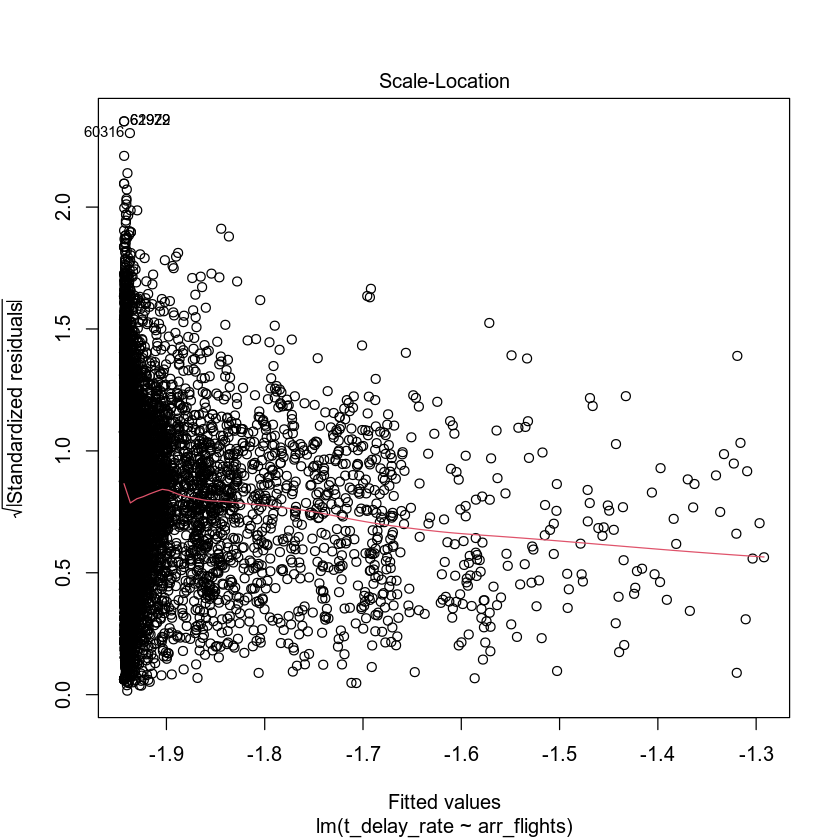

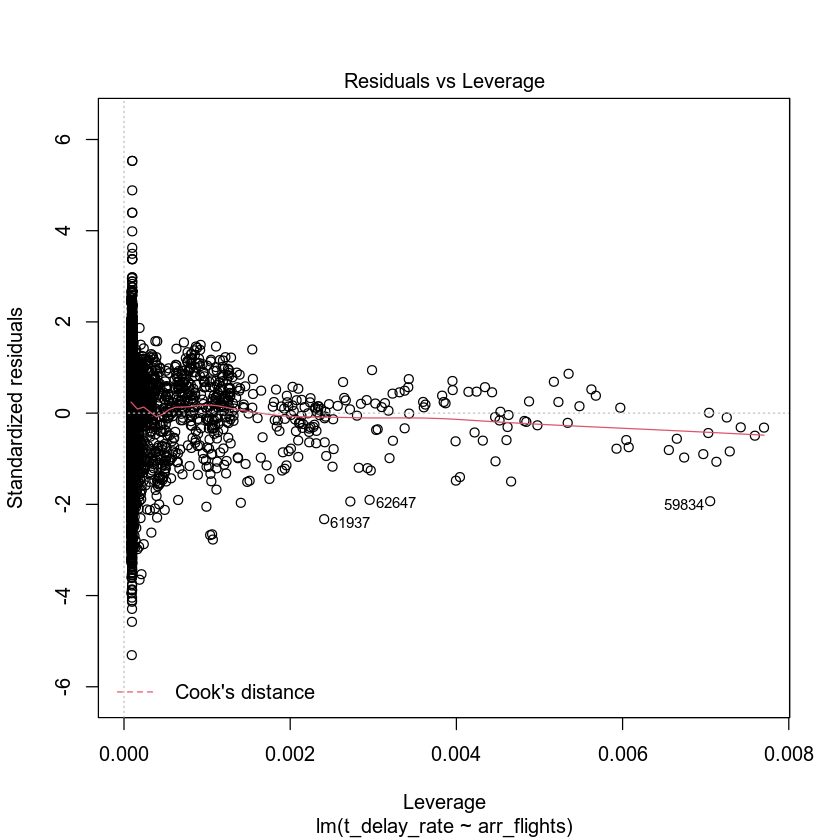

In [27]:
m <- lm(t_delay_rate~arr_flights,data=data[filterTest,])
summary(m)
plot(m)
m_a <- m


Call:
lm(formula = t_delay_rate ~ covid, data = data[filterTest, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5402 -0.3257  0.0341  0.3598  4.3353 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.574534   0.008448 -186.38   <2e-16 ***
covid       -0.681325   0.011927  -57.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.646 on 11732 degrees of freedom
Multiple R-squared:  0.2176,	Adjusted R-squared:  0.2176 
F-statistic:  3263 on 1 and 11732 DF,  p-value: < 2.2e-16


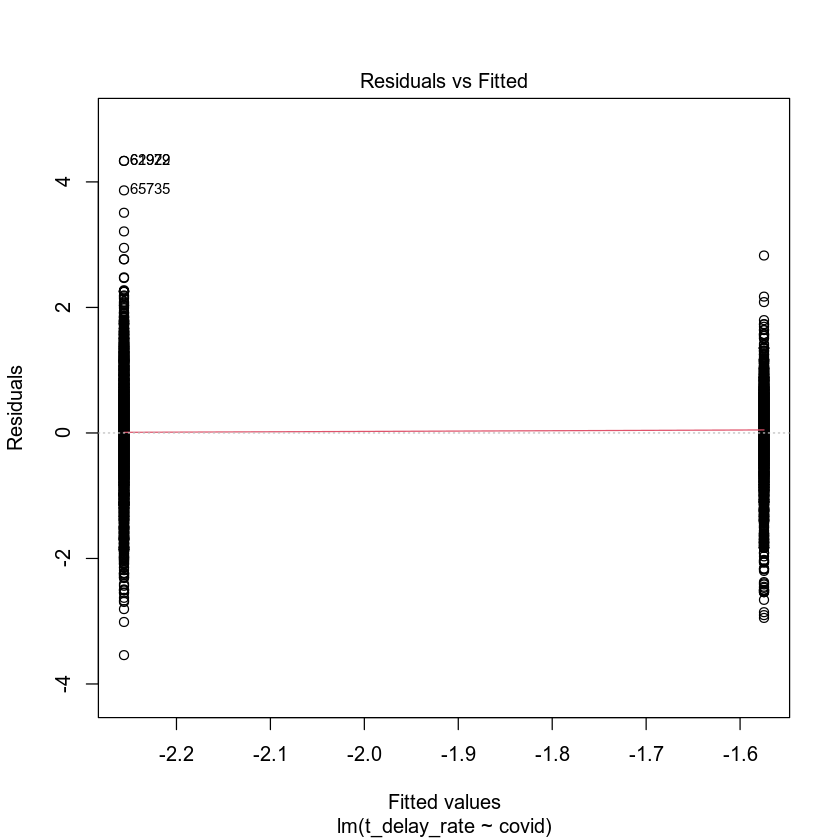

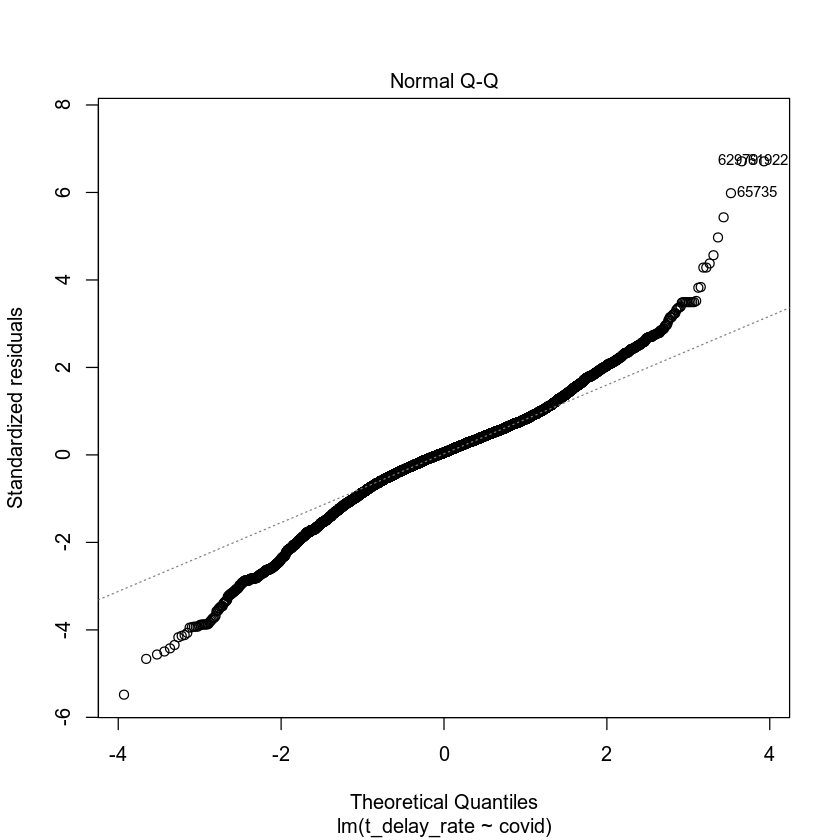

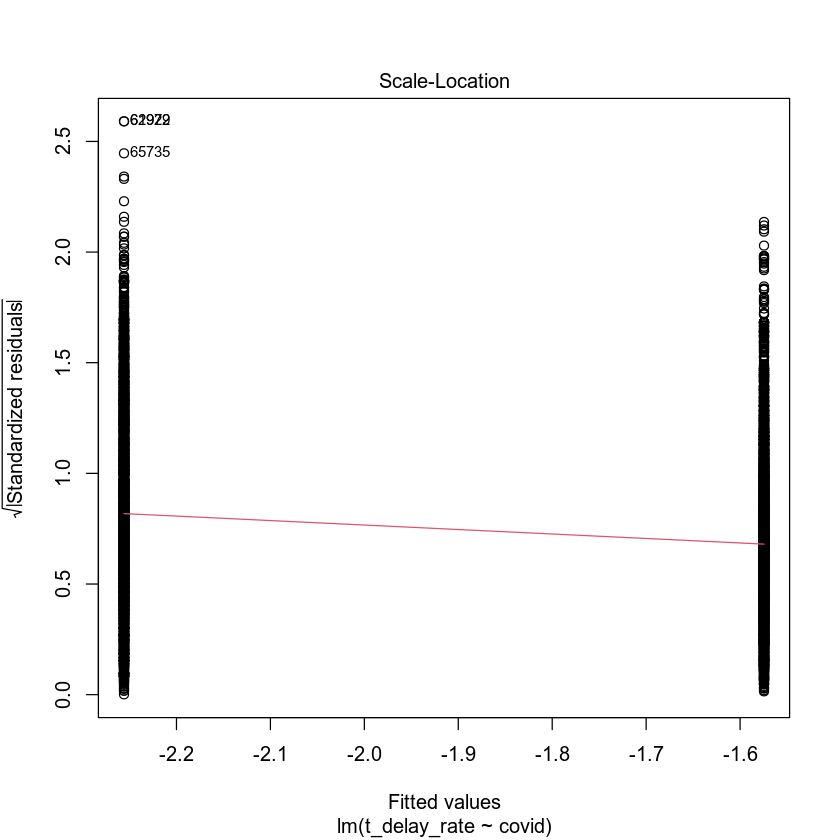

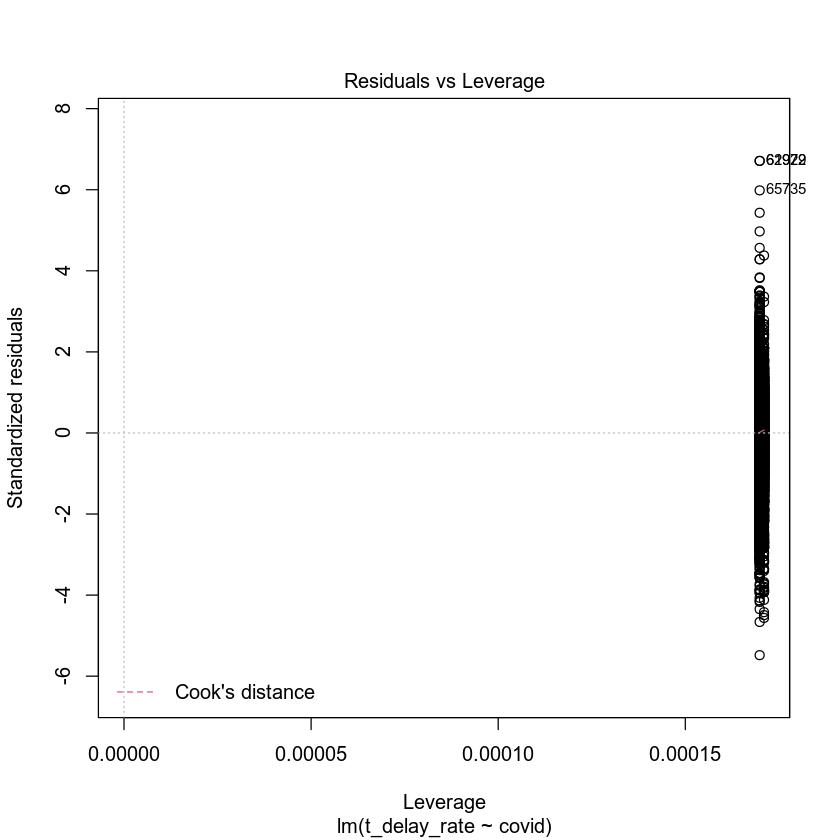

In [28]:
m <- lm(t_delay_rate~covid,data=data[filterTest,])
summary(m)
plot(m)
m_c <- m

In [29]:
summary(m_a)
summary(m_c)
summary(m_ca)


Call:
lm(formula = t_delay_rate ~ arr_flights, data = data[filterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8589 -0.4507  0.0795  0.5134  4.0225 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.943e+00  7.249e-03 -268.058   <2e-16 ***
arr_flights  1.842e-05  1.872e-06    9.836   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7273 on 11732 degrees of freedom
Multiple R-squared:  0.008179,	Adjusted R-squared:  0.008094 
F-statistic: 96.75 on 1 and 11732 DF,  p-value: < 2.2e-16



Call:
lm(formula = t_delay_rate ~ covid, data = data[filterTest, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5402 -0.3257  0.0341  0.3598  4.3353 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.574534   0.008448 -186.38   <2e-16 ***
covid       -0.681325   0.011927  -57.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.646 on 11732 degrees of freedom
Multiple R-squared:  0.2176,	Adjusted R-squared:  0.2176 
F-statistic:  3263 on 1 and 11732 DF,  p-value: < 2.2e-16



Call:
lm(formula = t_delay_rate ~ covid + arr_flights, data = data[filterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5321 -0.3257  0.0331  0.3615  4.3466 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.592e+00  8.943e-03 -178.062  < 2e-16 ***
covid       -6.749e-01  1.196e-02  -56.445  < 2e-16 ***
arr_flights  1.001e-05  1.667e-06    6.005 1.97e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.645 on 11731 degrees of freedom
Multiple R-squared:   0.22,	Adjusted R-squared:  0.2199 
F-statistic:  1655 on 2 and 11731 DF,  p-value: < 2.2e-16


In [30]:
1/(1+exp(1.57))

[1] 0.1722164

In [31]:
1/(1+exp(1.57+.68))

[1] 0.09534946

In [32]:
# covid 19 reduces the rate by 8% in the covid only model

In [33]:
BIC(m_c)

[1] 23070.43

In [34]:
BIC(m_ca)

[1] 23043.79

In [35]:
BIC(m_a)

[1] 25853.78

In [36]:
BIC(m0)

[1] 130369.2


Call:
lm(formula = t_delay_rate ~ top30, data = data[filterTest, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8805 -0.4514  0.0869  0.5224  3.9950 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.915597   0.007056 -271.503   <2e-16 ***
top30       -0.008756   0.023931   -0.366    0.714    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7303 on 11732 degrees of freedom
Multiple R-squared:  1.141e-05,	Adjusted R-squared:  -7.382e-05 
F-statistic: 0.1339 on 1 and 11732 DF,  p-value: 0.7144


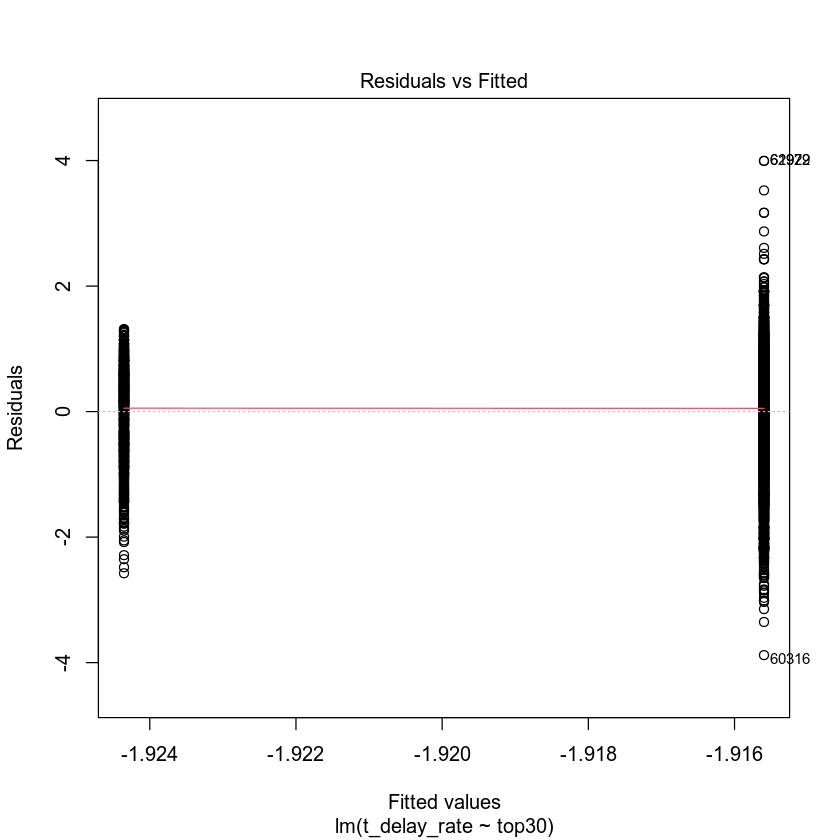

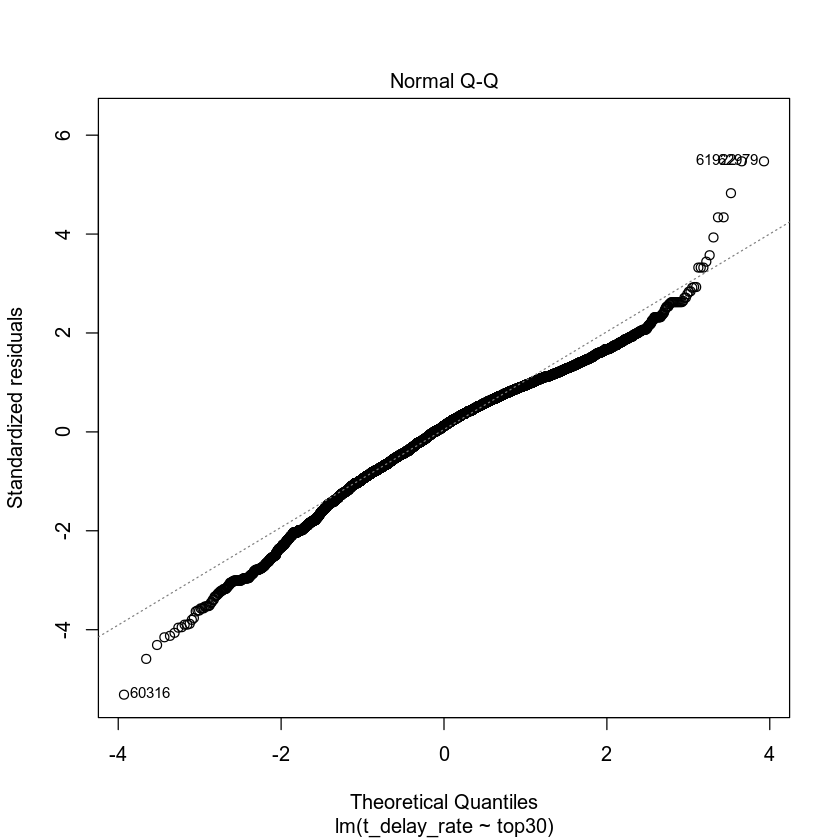

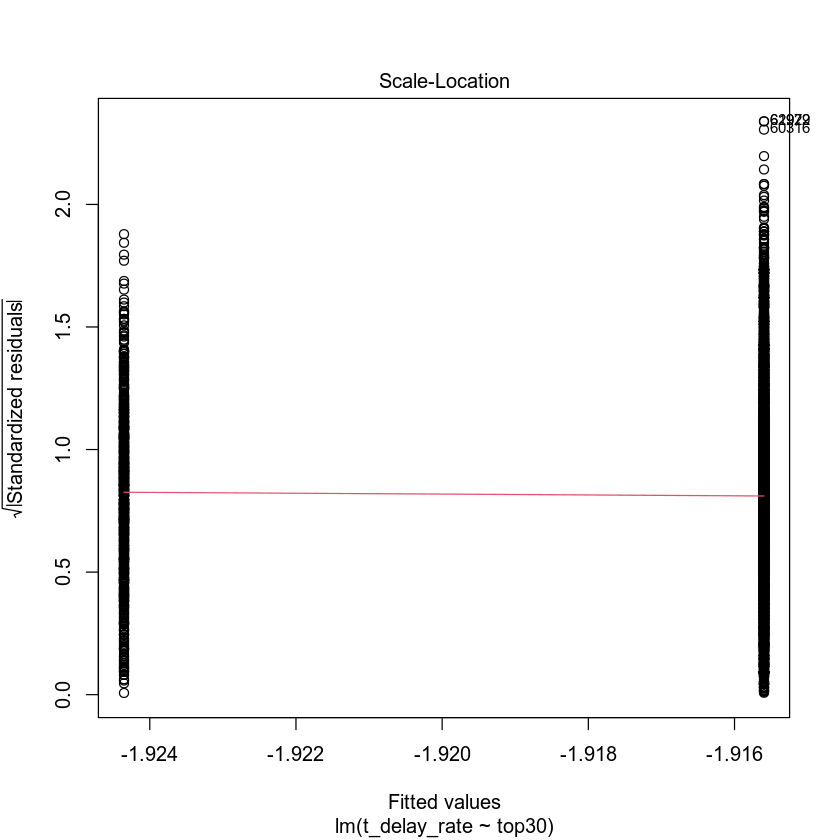

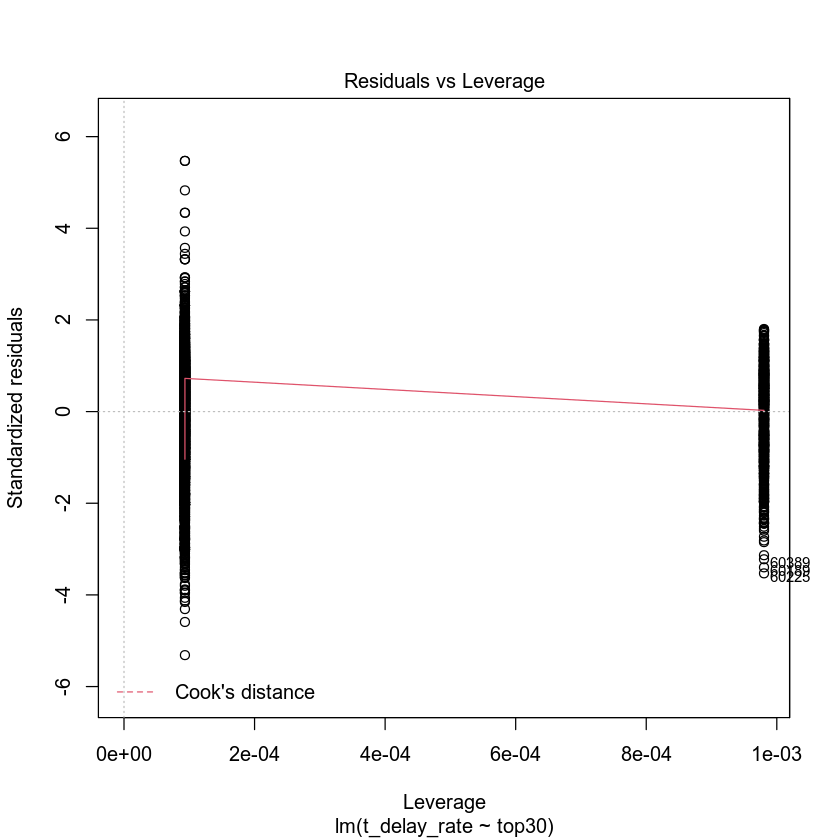

In [37]:
m <- lm(t_delay_rate~top30,data=data[filterTest,])
summary(m)
plot(m)
m_c <- m


Call:
lm(formula = t_new_delay_rate ~ top30 + covid + new_arr_flights, 
    data = data[newFilterTest, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0628 -0.3061  0.0334  0.3690  4.1602 

Coefficients:
                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     -2.068e+00  9.001e-03 -229.793  < 2e-16 ***
top30           -2.099e-01  3.552e-02   -5.908 3.56e-09 ***
covid           -4.609e-01  1.208e-02  -38.167  < 2e-16 ***
new_arr_flights  2.290e-05  2.972e-06    7.703 1.43e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6466 on 11676 degrees of freedom
Multiple R-squared:  0.1221,	Adjusted R-squared:  0.1219 
F-statistic: 541.4 on 3 and 11676 DF,  p-value: < 2.2e-16


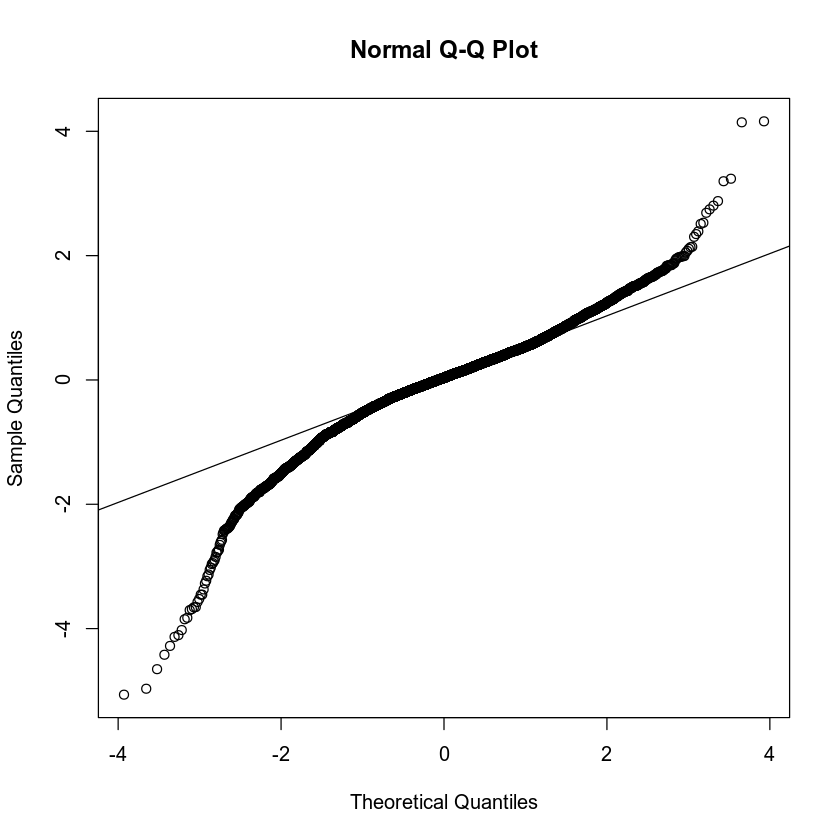

In [38]:
m <- lm(t_new_delay_rate~top30+covid+new_arr_flights,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)
m_corr <- m


Call:
lm(formula = t_delay_rate ~ top30 + covid + arr_flights, data = data[filterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5430 -0.3224  0.0300  0.3622  4.3419 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.600e+00  8.957e-03 -178.643   <2e-16 ***
top30       -3.080e-01  3.503e-02   -8.793   <2e-16 ***
covid       -6.627e-01  1.200e-02  -55.225   <2e-16 ***
arr_flights  2.942e-05  2.763e-06   10.648   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6429 on 11730 degrees of freedom
Multiple R-squared:  0.2251,	Adjusted R-squared:  0.2249 
F-statistic:  1136 on 3 and 11730 DF,  p-value: < 2.2e-16


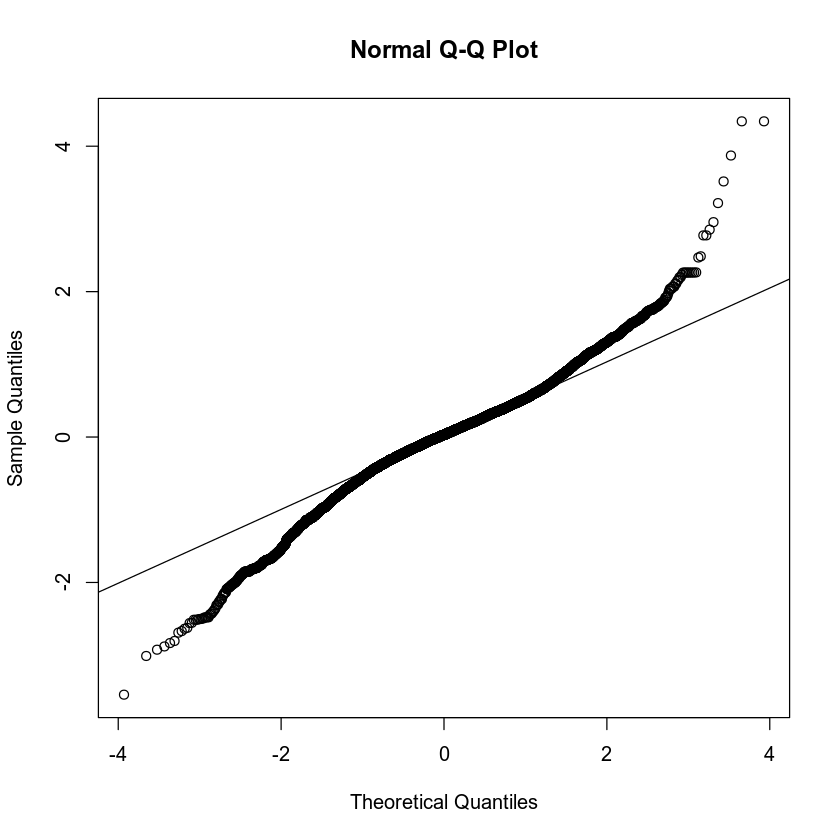

In [39]:
m <- lm(t_delay_rate~top30+covid+arr_flights,data=data[filterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)
m_std <- m

In [40]:
c(BIC(m_std), BIC(m_corr))

[1] 22976.07 23004.04

In [41]:
BIC(m0)

[1] 130369.2

In [42]:
summary(m0)


Call:
lm(formula = t_delay_rate ~ 1, data = data[finiteFilter, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1960 -0.3292  0.0665  0.4023  3.6795 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.600024   0.002413    -663   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6299 on 68120 degrees of freedom


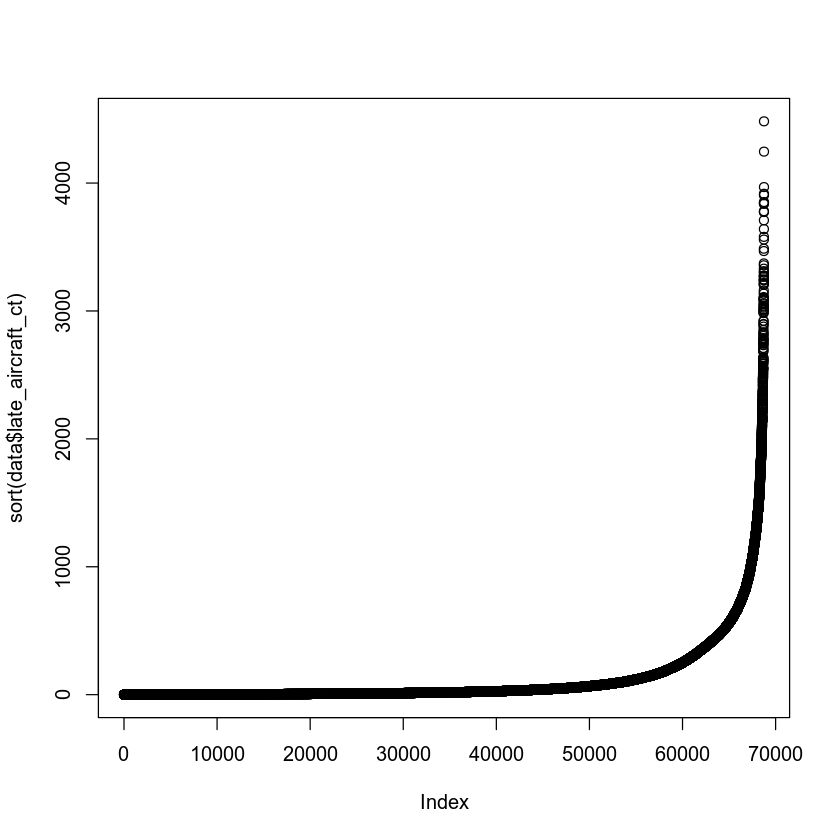

In [43]:
plot(sort(data$late_aircraft_ct))

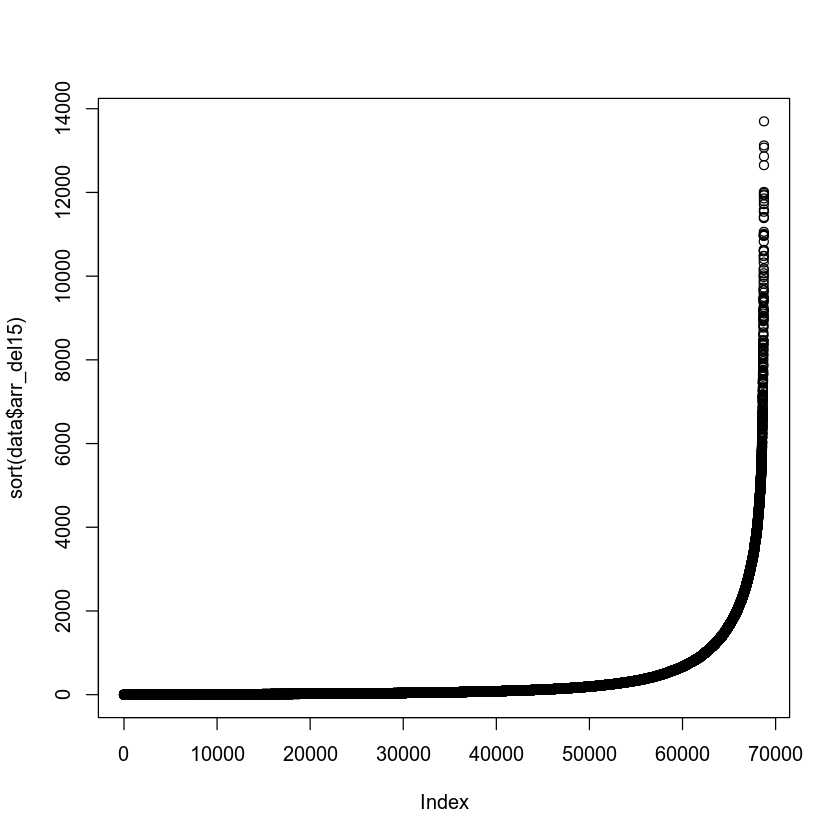

In [44]:
plot(sort(data$arr_del15))


Call:
lm(formula = t_delay_rate ~ 1, data = data[newFilterTest, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8864 -0.4512  0.0851  0.5182  3.9891 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.909647   0.006697  -285.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7238 on 11679 degrees of freedom


[1] "BIC="             "25613.3978652253"
[1] "AIC="             "25598.6665987125"


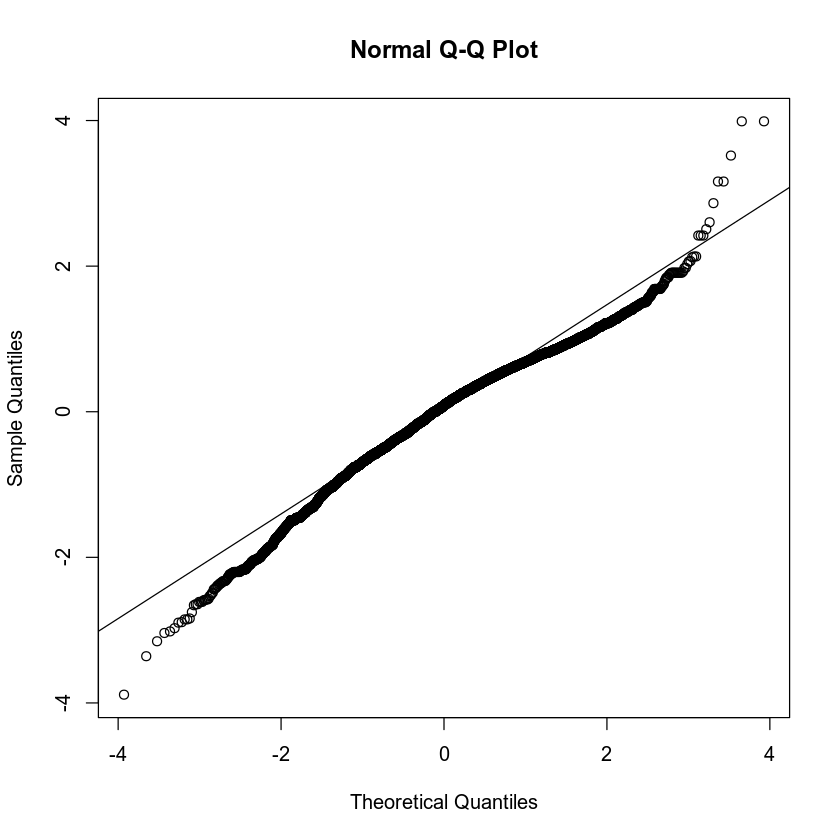

In [45]:
m <- lm(t_delay_rate~1,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_new_delay_rate ~ 1, data = data[newFilterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3028 -0.3714  0.0775  0.4529  3.9167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.285497   0.006385    -358   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.69 on 11679 degrees of freedom


[1] "BIC="             "24497.3171370818"
[1] "AIC="             "24482.5858705691"


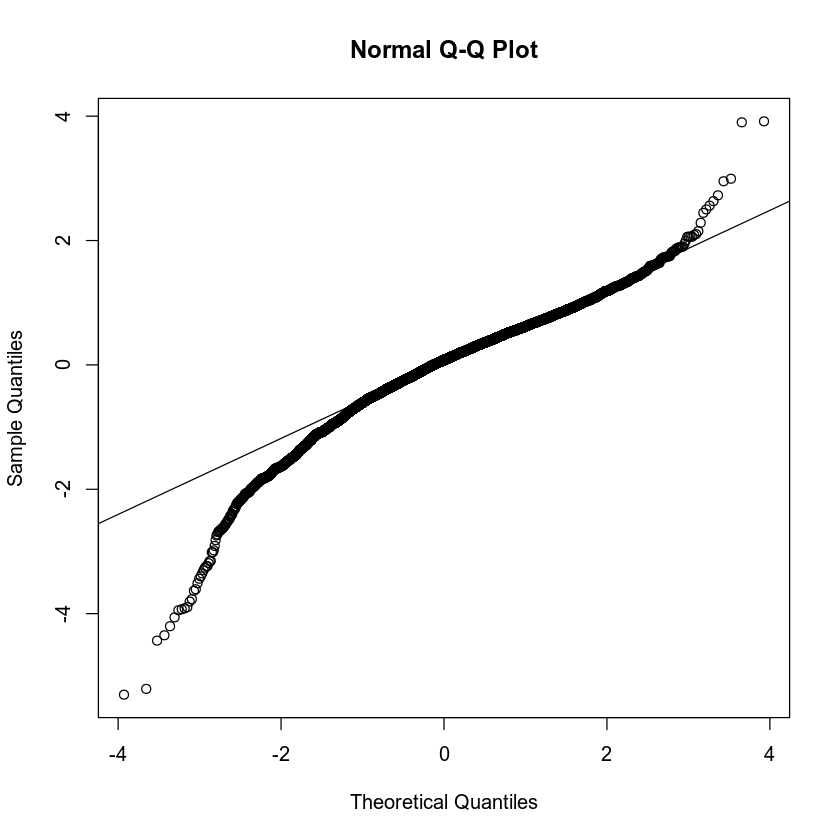

In [46]:
m <- lm(t_new_delay_rate~1,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_new_delay_rate ~ covid, data = data[newFilterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0663 -0.3028  0.0371  0.3670  4.1532 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.048661   0.008485 -241.44   <2e-16 ***
covid       -0.473348   0.011996  -39.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6482 on 11678 degrees of freedom
Multiple R-squared:  0.1177,	Adjusted R-squared:  0.1176 
F-statistic:  1557 on 1 and 11678 DF,  p-value: < 2.2e-16


[1] "BIC="             "23044.7290566175"
[1] "AIC="             "23022.6321568484"


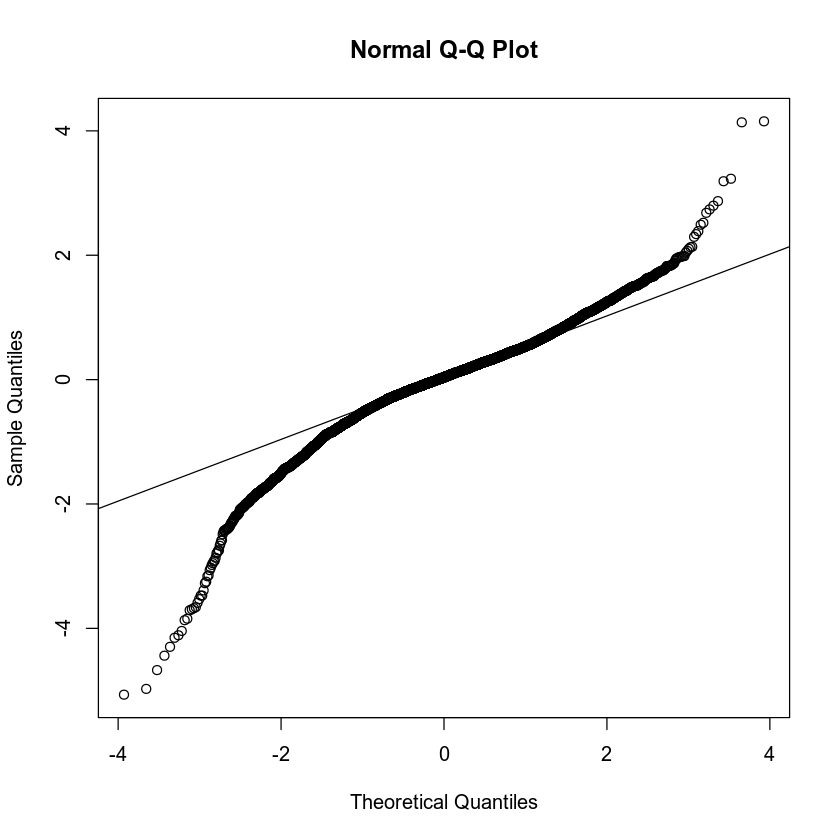

In [47]:
m <- lm(t_new_delay_rate~covid,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_new_delay_rate ~ arr_flights, data = data[newFilterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2831 -0.3675  0.0721  0.4488  3.9387 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -2.308e+00  6.875e-03 -335.643   <2e-16 ***
arr_flights  1.507e-05  1.772e-06    8.505   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6879 on 11678 degrees of freedom
Multiple R-squared:  0.006156,	Adjusted R-squared:  0.006071 
F-statistic: 72.34 on 1 and 11678 DF,  p-value: < 2.2e-16


[1] "BIC="             "24434.5574175834"
[1] "AIC="             "24412.4605178143"


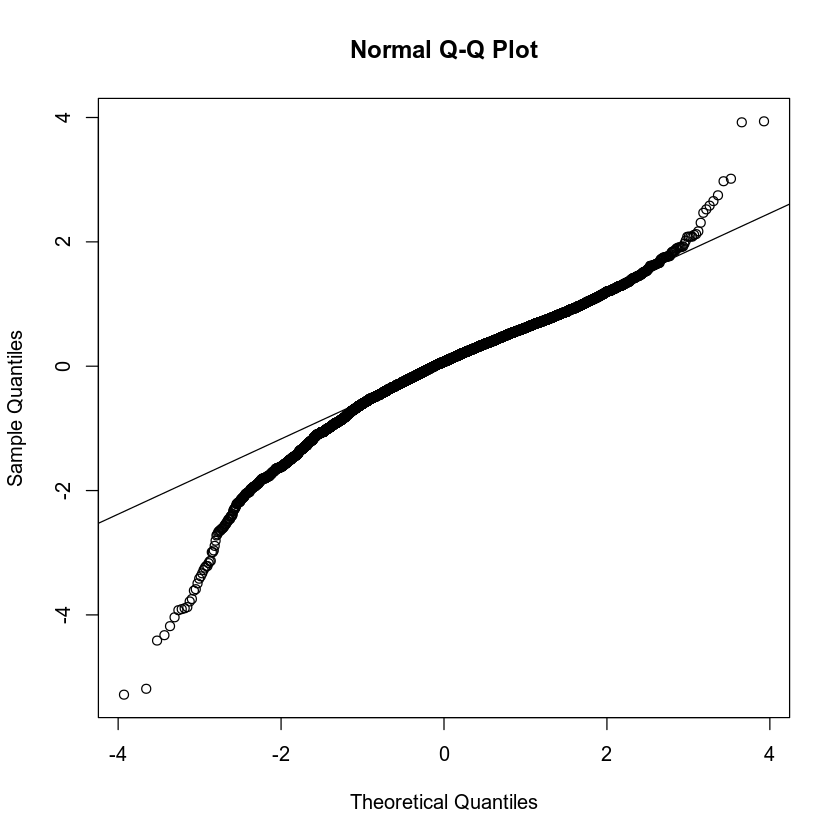

In [48]:
m <- lm(t_new_delay_rate~arr_flights,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_new_delay_rate ~ new_arr_flights, data = data[newFilterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2852 -0.3692  0.0716  0.4483  3.9365 

Coefficients:
                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     -2.305e+00  6.882e-03 -335.009  < 2e-16 ***
new_arr_flights  1.438e-05  1.881e-06    7.645 2.26e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6883 on 11678 degrees of freedom
Multiple R-squared:  0.004979,	Adjusted R-squared:  0.004894 
F-statistic: 58.44 on 1 and 11678 DF,  p-value: 2.258e-14


[1] "BIC="             "24448.3770549677"
[1] "AIC="             "24426.2801551985"


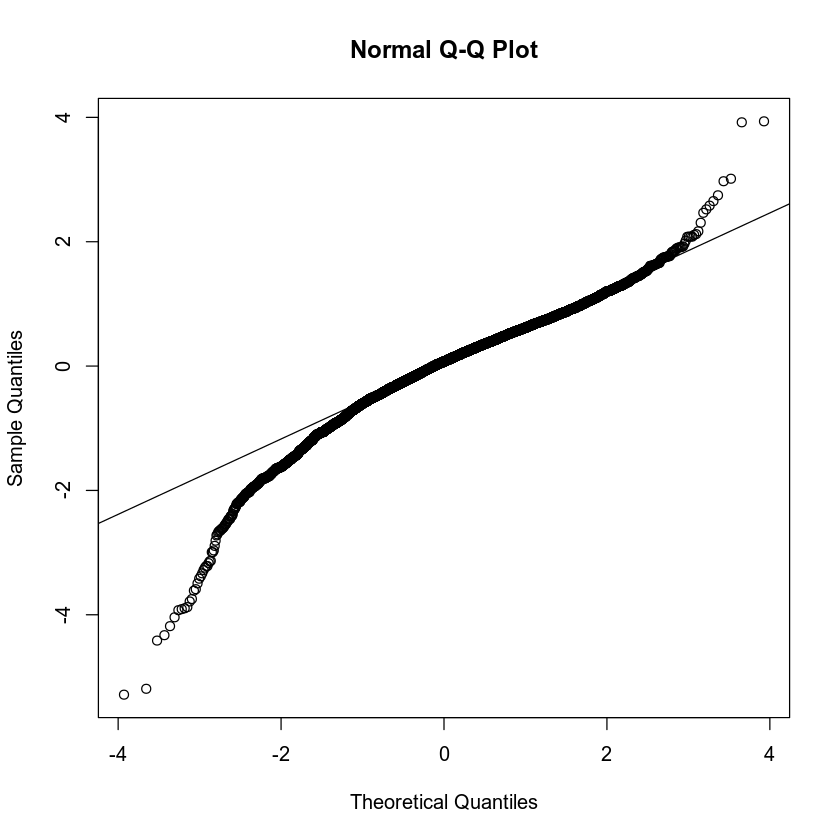

In [49]:
m <- lm(t_new_delay_rate~new_arr_flights,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_new_delay_rate ~ new_arr_flights + covid, data = data[newFilterTest, 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-5.058 -0.307  0.035  0.367  4.163 

Coefficients:
                  Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     -2.063e+00  8.973e-03 -229.933  < 2e-16 ***
new_arr_flights  8.803e-06  1.776e-06    4.957 7.24e-07 ***
covid           -4.685e-01  1.202e-02  -38.972  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6475 on 11677 degrees of freedom
Multiple R-squared:  0.1195,	Adjusted R-squared:  0.1194 
F-statistic: 792.4 on 2 and 11677 DF,  p-value: < 2.2e-16


[1] "BIC="             "23029.5374554007"
[1] "AIC="             "23000.0749223752"


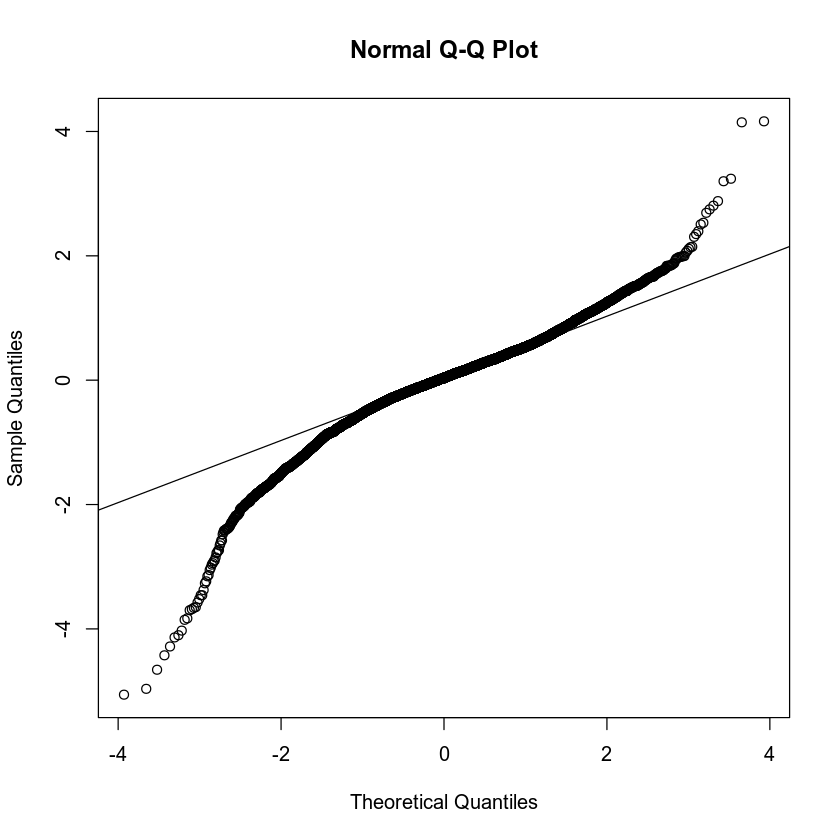

In [50]:
m <- lm(t_new_delay_rate~new_arr_flights + covid,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_delay_rate ~ arr_flights + covid, data = data[newFilterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5404 -0.3260  0.0287  0.3578  4.3381 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.588e+00  8.868e-03 -179.04  < 2e-16 ***
arr_flights  9.432e-06  1.652e-06    5.71 1.16e-08 ***
covid       -6.710e-01  1.187e-02  -56.52  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6389 on 11677 degrees of freedom
Multiple R-squared:  0.2209,	Adjusted R-squared:  0.2208 
F-statistic:  1655 on 2 and 11677 DF,  p-value: < 2.2e-16


[1] "BIC="             "22716.7167184751"
[1] "AIC="             "22687.2541854496"


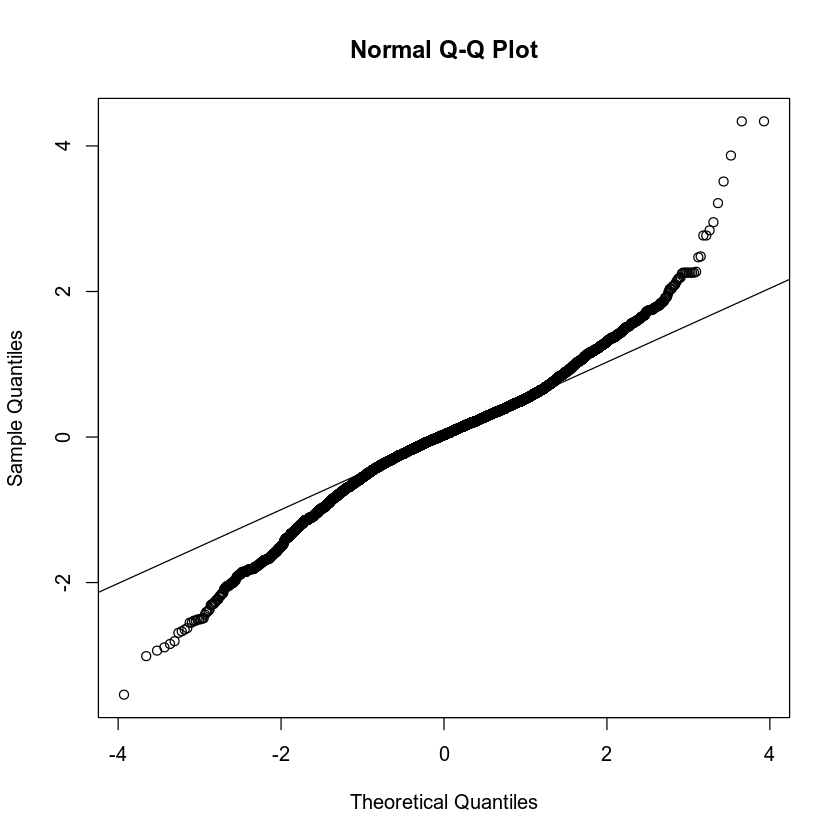

In [51]:
m <- lm(t_delay_rate~arr_flights + covid,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_new_delay_rate ~ arr_flights + covid, data = data[newFilterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0571 -0.3083  0.0347  0.3674  4.1638 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -2.065e+00  8.985e-03 -229.856  < 2e-16 ***
arr_flights  9.312e-06  1.674e-06    5.564  2.7e-08 ***
covid       -4.674e-01  1.203e-02  -38.864  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6474 on 11677 degrees of freedom
Multiple R-squared:   0.12,	Adjusted R-squared:  0.1198 
F-statistic:   796 on 2 and 11677 DF,  p-value: < 2.2e-16


[1] "BIC="             "23023.1739980612"
[1] "AIC="             "22993.7114650357"


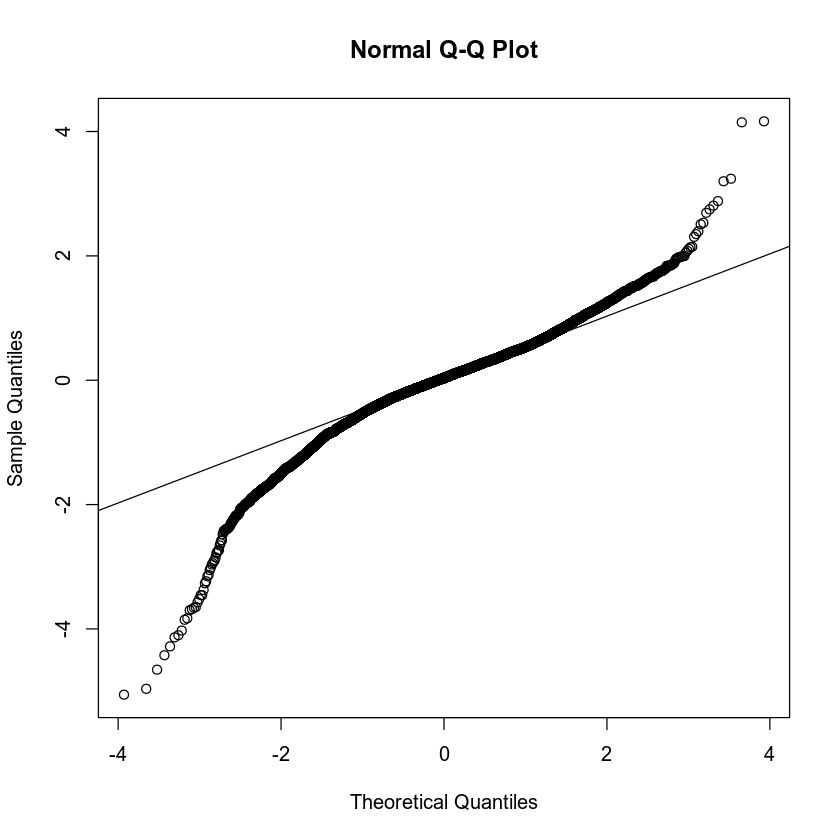

In [52]:
m <- lm(t_new_delay_rate~arr_flights+covid,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_new_delay_rate ~ as.factor(month) + covid, data = data[newFilterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9133 -0.2892  0.0487  0.3482  4.4141 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.03412    0.02405 -84.585  < 2e-16 ***
as.factor(month)2   0.30590    0.03296   9.282  < 2e-16 ***
as.factor(month)3  -0.15579    0.02862  -5.443 5.35e-08 ***
as.factor(month)4  -0.31565    0.02876 -10.976  < 2e-16 ***
as.factor(month)5  -0.13362    0.02877  -4.644 3.45e-06 ***
as.factor(month)6   0.22774    0.02856   7.973 1.70e-15 ***
as.factor(month)7   0.26046    0.02852   9.131  < 2e-16 ***
as.factor(month)8   0.02911    0.03310   0.880 0.379092    
as.factor(month)9  -0.27400    0.03320  -8.254  < 2e-16 ***
as.factor(month)10 -0.13144    0.03314  -3.967 7.33e-05 ***
as.factor(month)11 -0.09320    0.03322  -2.805 0.005034 ** 
as.factor(month)12  0.11044    0.03305   3.341 0.000836 ***
covid      

[1] "BIC="             "21891.7457882063"
[1] "AIC="             "21788.6269226169"


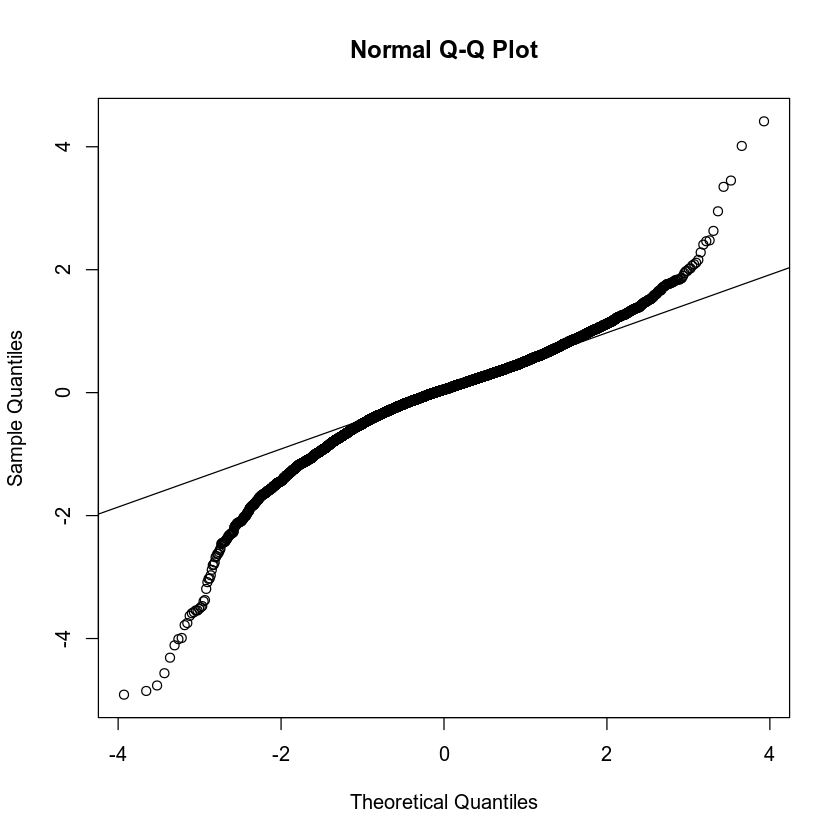

In [53]:
m <- lm(t_new_delay_rate~as.factor(month)+covid,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_delay_rate ~ as.factor(month) + covid, data = data[newFilterTest, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2702 -0.3032  0.0433  0.3397  4.6261 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.57877    0.02341 -67.453  < 2e-16 ***
as.factor(month)2   0.32667    0.03208  10.184  < 2e-16 ***
as.factor(month)3  -0.10627    0.02786  -3.815 0.000137 ***
as.factor(month)4  -0.33133    0.02799 -11.838  < 2e-16 ***
as.factor(month)5  -0.10211    0.02800  -3.646 0.000267 ***
as.factor(month)6   0.29229    0.02780  10.514  < 2e-16 ***
as.factor(month)7   0.32714    0.02776  11.784  < 2e-16 ***
as.factor(month)8   0.02452    0.03221   0.761 0.446553    
as.factor(month)9  -0.28914    0.03231  -8.949  < 2e-16 ***
as.factor(month)10 -0.12946    0.03225  -4.014    6e-05 ***
as.factor(month)11 -0.11110    0.03233  -3.436 0.000592 ***
as.factor(month)12  0.10933    0.03217   3.399 0.000679 ***
covid          

[1] "BIC="             "21258.8532916491"
[1] "AIC="             "21155.7344260598"


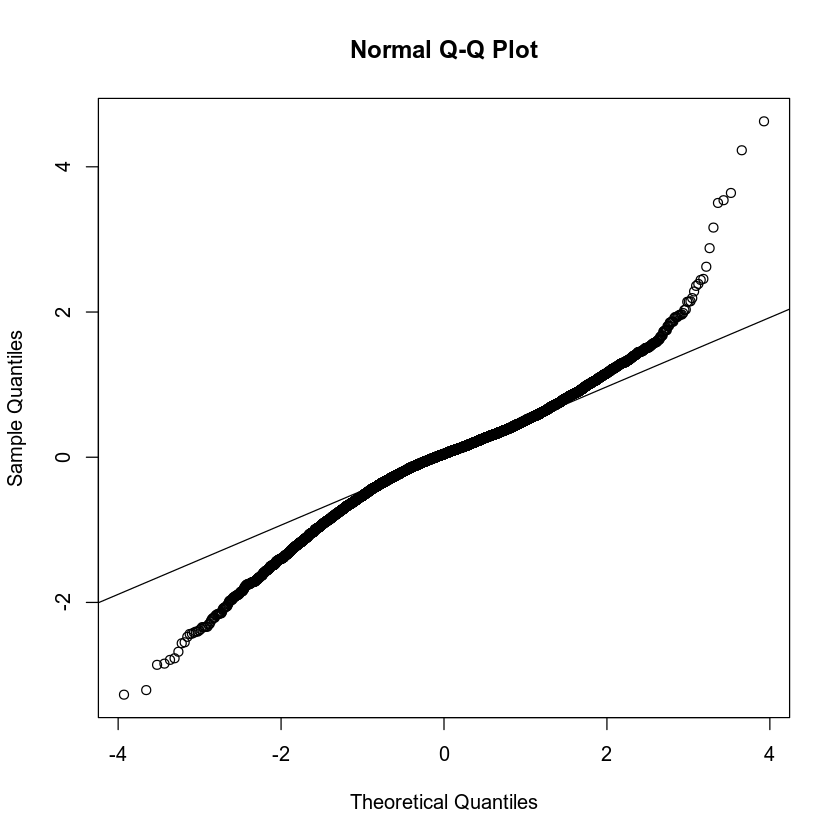

In [54]:
m <- lm(t_delay_rate~as.factor(month)+covid,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_delay_rate ~ as.factor(month) + covid + arr_flights, 
    data = data[newFilterTest, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2530 -0.3048  0.0430  0.3376  4.6356 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.595e+00  2.351e-02 -67.818  < 2e-16 ***
as.factor(month)2   3.278e-01  3.203e-02  10.237  < 2e-16 ***
as.factor(month)3  -1.094e-01  2.782e-02  -3.932 8.47e-05 ***
as.factor(month)4  -3.322e-01  2.795e-02 -11.888  < 2e-16 ***
as.factor(month)5  -1.028e-01  2.796e-02  -3.675 0.000239 ***
as.factor(month)6   2.915e-01  2.776e-02  10.500  < 2e-16 ***
as.factor(month)7   3.250e-01  2.772e-02  11.725  < 2e-16 ***
as.factor(month)8   2.344e-02  3.217e-02   0.729 0.466267    
as.factor(month)9  -2.889e-01  3.226e-02  -8.955  < 2e-16 ***
as.factor(month)10 -1.299e-01  3.220e-02  -4.035 5.49e-05 ***
as.factor(month)11 -1.114e-01  3.228e-02  -3.452 0.000559 ***
as.factor(month)12  1.091e-01  3.212e

[1] "BIC="             "21231.0302270447"
[1] "AIC="             "21120.5457281989"


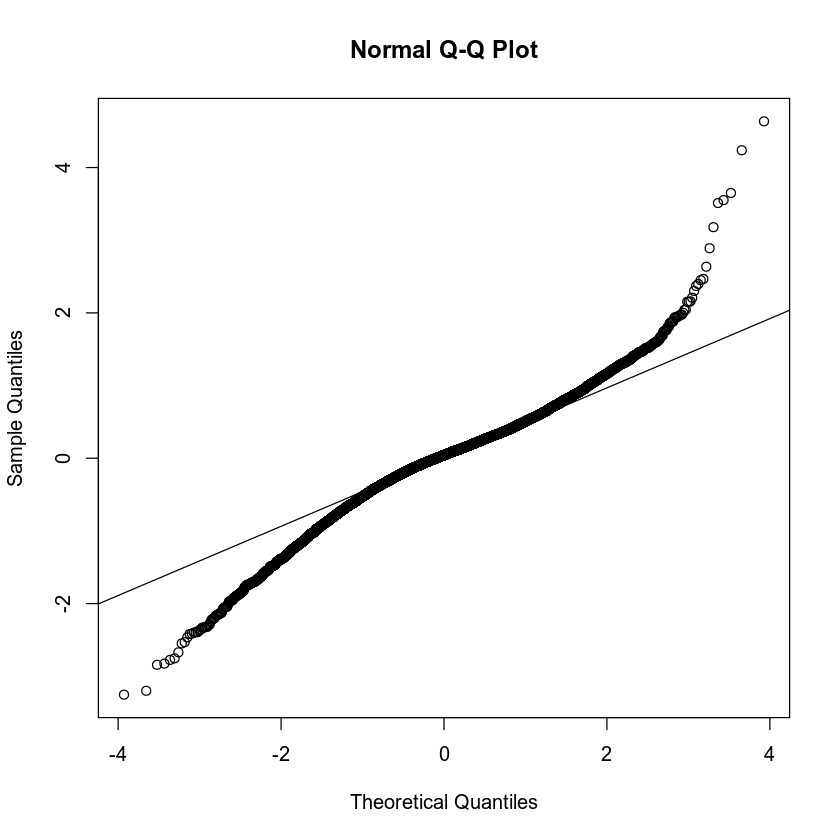

In [55]:
m <- lm(t_delay_rate~as.factor(month)+covid+arr_flights,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_delay_rate ~ as.factor(month) + covid + arr_flights + 
    extra_mon + extra_tue + extra_wed + extra_thu + extra_fri + 
    extra_sat + extra_sun, data = data[newFilterTest, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2093 -0.3066  0.0484  0.3419  4.6239 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.910e+00  5.593e-02 -34.150  < 2e-16 ***
as.factor(month)2   6.437e-01  5.996e-02  10.734  < 2e-16 ***
as.factor(month)3  -8.235e-02  2.955e-02  -2.787 0.005324 ** 
as.factor(month)4  -1.690e-01  3.773e-02  -4.480 7.53e-06 ***
as.factor(month)5  -4.333e-02  2.950e-02  -1.469 0.141917    
as.factor(month)6   3.745e-01  2.990e-02  12.526  < 2e-16 ***
as.factor(month)7   3.676e-01  3.107e-02  11.834  < 2e-16 ***
as.factor(month)8   1.393e-01  3.721e-02   3.744 0.000182 ***
as.factor(month)9  -1.804e-01  3.739e-02  -4.824 1.43e-06 ***
as.factor(month)10 -1.352e-01  

[1] "BIC="             "21130.7233881304"
[1] "AIC="             "20976.0450897464"


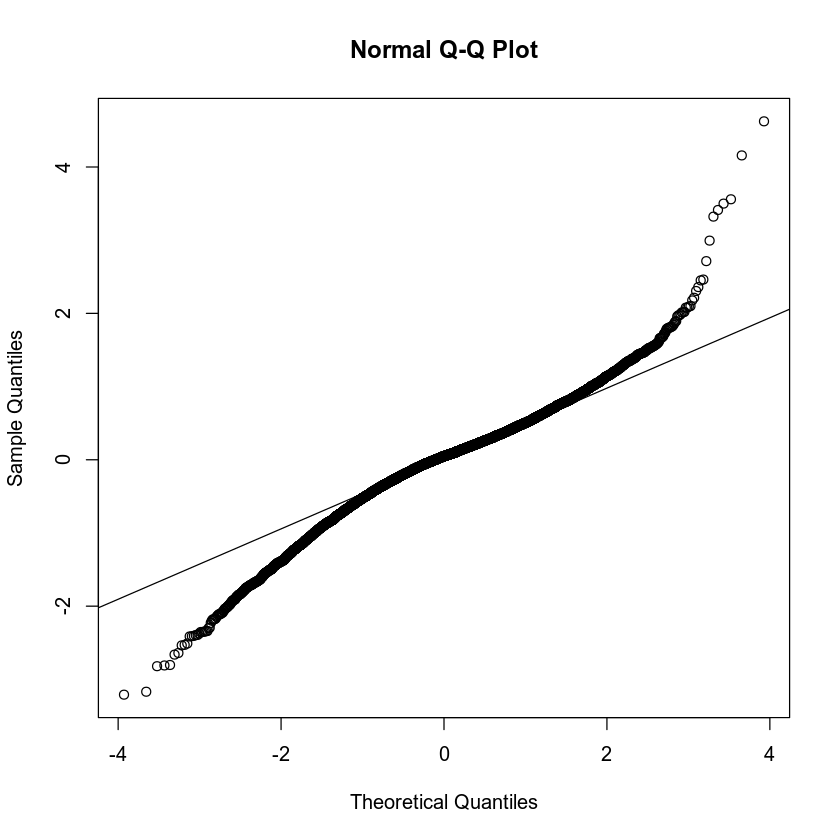

In [56]:
m <- lm(t_delay_rate~as.factor(month)+covid+arr_flights+extra_mon+extra_tue+extra_wed+extra_thu+extra_fri+extra_sat+extra_sun,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_delay_rate ~ jan + feb + mar + apr + may + jun + 
    jul + sep + oct + covid + arr_flights + extra_tue + extra_thu + 
    extra_fri + extra_sat, data = data[newFilterTest, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2198 -0.3067  0.0479  0.3430  4.6201 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.796e+00  2.073e-02 -86.661  < 2e-16 ***
jan         -1.410e-01  2.872e-02  -4.911 9.20e-07 ***
feb          5.297e-01  2.995e-02  17.687  < 2e-16 ***
mar         -2.152e-01  2.425e-02  -8.875  < 2e-16 ***
apr         -2.822e-01  2.151e-02 -13.118  < 2e-16 ***
may         -1.784e-01  2.174e-02  -8.207 2.50e-16 ***
jun          2.366e-01  2.335e-02  10.132  < 2e-16 ***
jul          2.383e-01  2.244e-02  10.621  < 2e-16 ***
sep         -3.261e-01  2.780e-02 -11.728  < 2e-16 ***
oct         -2.714e-01  2.883e-02  -9.414  < 2e-16 ***
covid       -6.734e-01  1.102e-02 -61.088  < 2e-16 ***
arr_flights  9.402e-06  1.535e-06

[1] "BIC="             "21095.6265867502"
[1] "AIC="             "20970.4108213917"


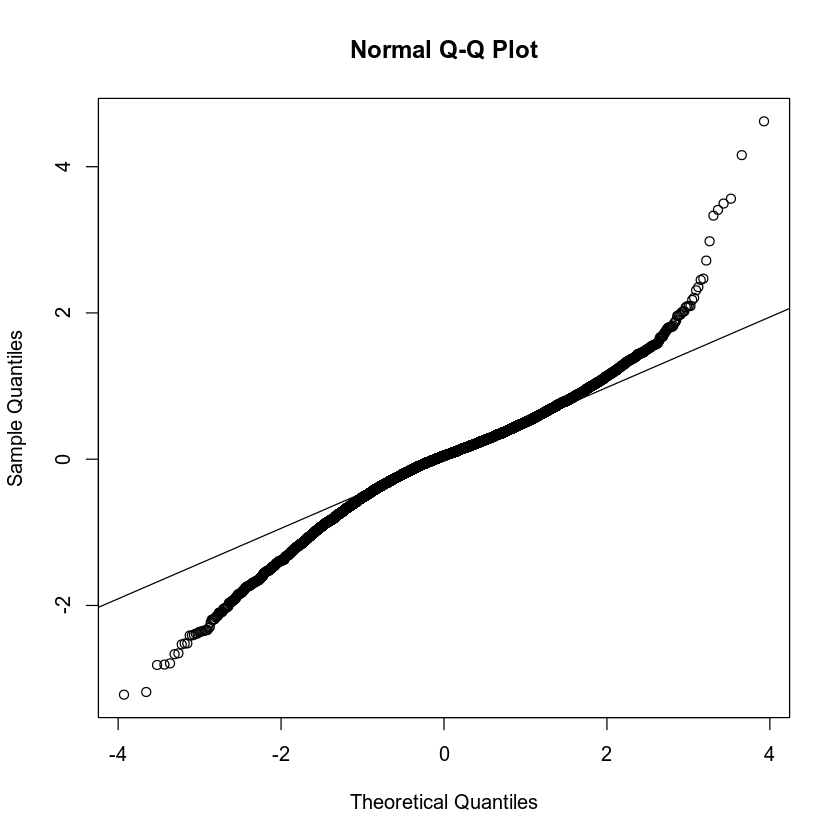

In [57]:
m <- lm(t_delay_rate~jan+feb+mar+apr+may+jun+jul+sep+oct+covid+arr_flights+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_delay_rate ~ jan + feb + mar + apr + may + jun + 
    jul + sep + oct + covid + arr_flights_n + extra_tue + extra_thu + 
    extra_fri + extra_sat, data = data[newFilterTest, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2198 -0.3067  0.0479  0.3430  4.6201 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.79618    0.02073 -86.661  < 2e-16 ***
jan           -0.14105    0.02872  -4.911 9.20e-07 ***
feb            0.52974    0.02995  17.687  < 2e-16 ***
mar           -0.21521    0.02425  -8.875  < 2e-16 ***
apr           -0.28218    0.02151 -13.118  < 2e-16 ***
may           -0.17840    0.02174  -8.207 2.50e-16 ***
jun            0.23661    0.02335  10.132  < 2e-16 ***
jul            0.23834    0.02244  10.621  < 2e-16 ***
sep           -0.32607    0.02780 -11.728  < 2e-16 ***
oct           -0.27137    0.02883  -9.414  < 2e-16 ***
covid         -0.67344    0.01102 -61.088  < 2e-16 ***
arr_flights_n  0.35953    0.058

[1] "BIC="             "21095.6265867502"
[1] "AIC="             "20970.4108213917"


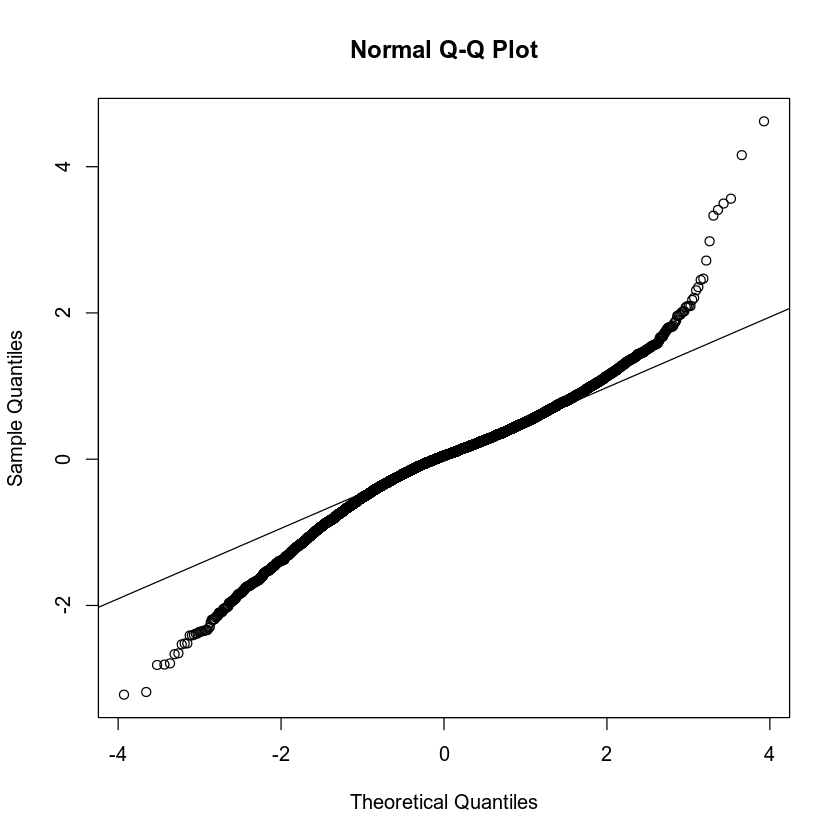

In [58]:
m <- lm(t_delay_rate~jan+feb+mar+apr+may+jun+jul+sep+oct+covid+arr_flights_n+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_delay_rate ~ jan + feb + mar + apr + may + jun + 
    jul + sep + oct + arr_flights_n + extra_tue + extra_thu + 
    extra_fri + extra_sat, data = data[newFilterTest, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5126 -0.4146  0.0841  0.4794  4.2964 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.13910    0.02292 -93.324  < 2e-16 ***
jan           -0.14213    0.03300  -4.307 1.67e-05 ***
feb            0.52131    0.03441  15.151  < 2e-16 ***
mar           -0.22485    0.02786  -8.072 7.60e-16 ***
apr           -0.28142    0.02471 -11.388  < 2e-16 ***
may           -0.17580    0.02497  -7.040 2.03e-12 ***
jun            0.23281    0.02683   8.677  < 2e-16 ***
jul            0.23327    0.02578   9.049  < 2e-16 ***
sep           -0.32898    0.03194 -10.300  < 2e-16 ***
oct           -0.27286    0.03312  -8.240  < 2e-16 ***
arr_flights_n  0.67749    0.06716  10.087  < 2e-16 ***
extra_tue      0.25101    0.02675   9.3

[1] "BIC="             "24328.3948361765"
[1] "AIC="             "24210.5447040744"


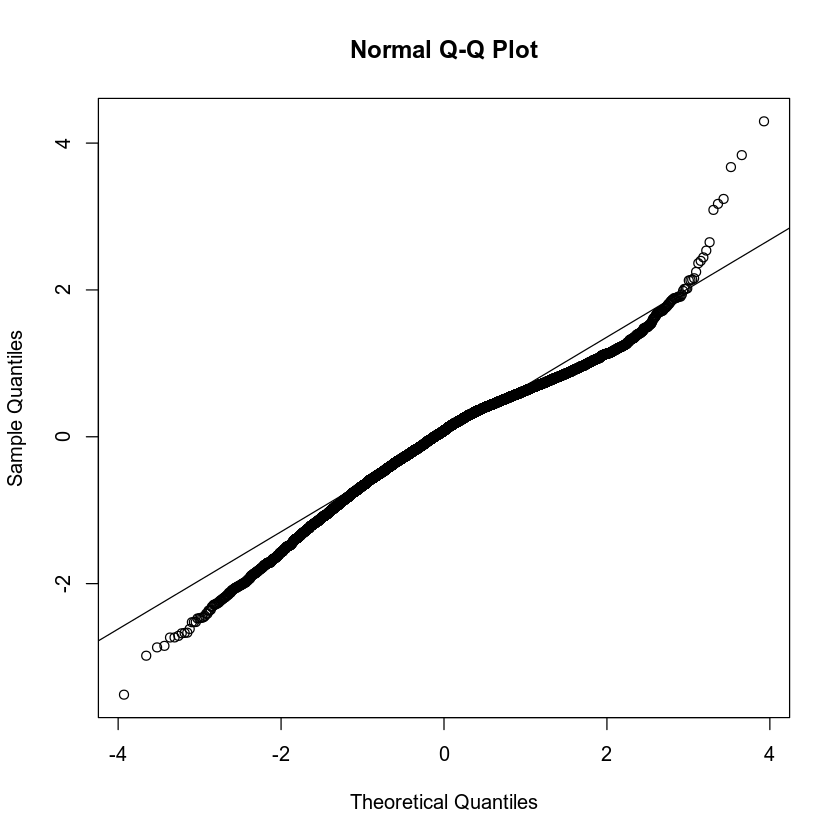

In [59]:
m <- lm(t_delay_rate~jan+feb+mar+apr+may+jun+jul+sep+oct+arr_flights_n+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call:
lm(formula = t_delay_rate ~ jan + feb + mar + apr + may + jun + 
    jul + sep + oct + covid + extra_tue + extra_thu + extra_fri + 
    extra_sat, data = data[newFilterTest, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2369 -0.3016  0.0485  0.3400  4.6108 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.77973    0.02058 -86.462  < 2e-16 ***
jan         -0.14137    0.02877  -4.914 9.03e-07 ***
feb          0.52796    0.03000  17.602  < 2e-16 ***
mar         -0.21226    0.02428  -8.742  < 2e-16 ***
apr         -0.28185    0.02154 -13.082  < 2e-16 ***
may         -0.17816    0.02177  -8.183 3.06e-16 ***
jun          0.23716    0.02339  10.139  < 2e-16 ***
jul          0.24016    0.02247  10.687  < 2e-16 ***
sep         -0.32689    0.02785 -11.739  < 2e-16 ***
oct         -0.27123    0.02887  -9.395  < 2e-16 ***
covid       -0.67943    0.01100 -61.778  < 2e-16 ***
extra_tue    0.25472    0.02332  10.923  < 2e-16 ***
extra_thu    0.136

[1] "BIC="             "21123.7745382033"
[1] "AIC="             "21005.9244061011"


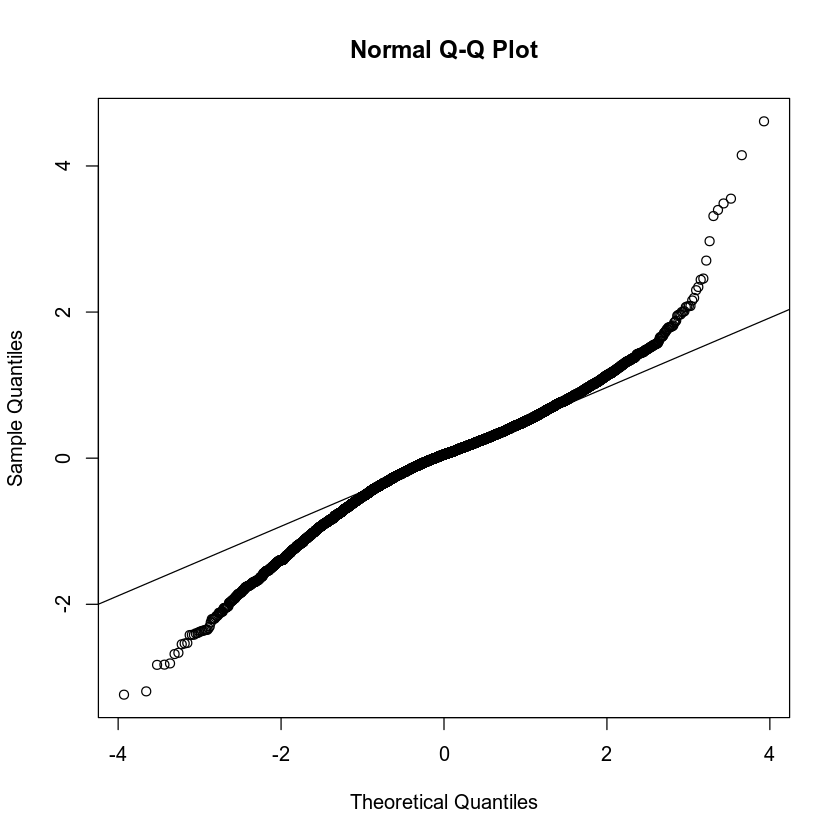

In [60]:
m <- lm(t_delay_rate~jan+feb+mar+apr+may+jun+jul+sep+oct+covid+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call: rlm(formula = t_delay_rate ~ jan + feb + mar + apr + may + jun + 
    jul + sep + oct + covid + arr_flights_n + extra_tue + extra_thu + 
    extra_fri + extra_sat, data = data[newFilterTest, ])
Residuals:
    Min      1Q  Median      3Q     Max 
-3.2783 -0.3273  0.0267  0.3135  4.6150 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.7411   0.0187   -93.3529
jan            -0.1230   0.0258    -4.7605
feb             0.4802   0.0270    17.8181
mar            -0.1936   0.0218    -8.8709
apr            -0.2261   0.0194   -11.6821
may            -0.1378   0.0196    -7.0472
jun             0.2641   0.0210    12.5650
jul             0.2513   0.0202    12.4443
sep            -0.3163   0.0250   -12.6444
oct            -0.2488   0.0259    -9.5934
covid          -0.6860   0.0099   -69.1490
arr_flights_n   0.2770   0.0528     5.2440
extra_tue       0.2078   0.0210     9.9171
extra_thu       0.1331   0.0142     9.3978
extra_fri       0.0452   0.0172     2.6255
ext

[1] "BIC="           "21141.81846661"
[1] "AIC="             "21016.6027012515"


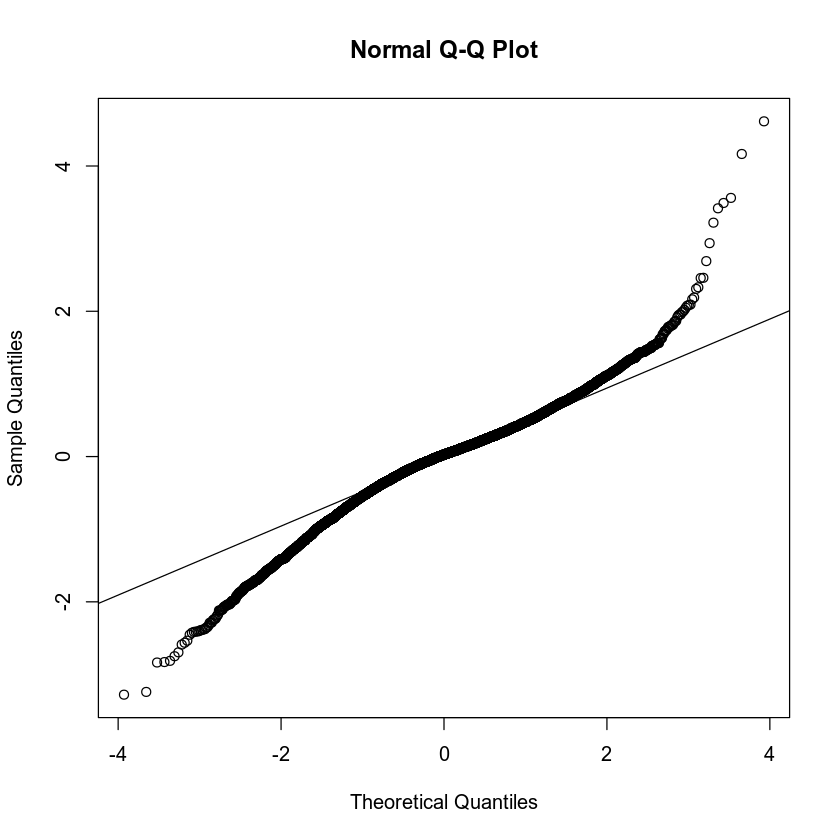

In [61]:
m <- MASS::rlm(t_delay_rate~jan+feb+mar+apr+may+jun+jul+sep+oct+covid+arr_flights_n+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call: rlm(formula = t_delay_rate ~ jan + feb + mar + apr + may + jun + 
    jul + sep + oct + arr_flights_n + extra_tue + extra_thu + 
    extra_fri + extra_sat, data = data[newFilterTest, ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.65196 -0.43903  0.05274  0.44070  4.29401 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -2.1105   0.0220   -96.0038
jan            -0.1330   0.0316    -4.2030
feb             0.5070   0.0330    15.3646
mar            -0.2025   0.0267    -7.5812
apr            -0.1890   0.0237    -7.9730
may            -0.1172   0.0240    -4.8946
jun             0.2992   0.0257    11.6278
jul             0.2710   0.0247    10.9615
sep            -0.3166   0.0306   -10.3342
oct            -0.2578   0.0318    -8.1155
arr_flights_n   0.6337   0.0644     9.8372
extra_tue       0.2124   0.0257     8.2793
extra_thu       0.1500   0.0173     8.6481
extra_fri       0.0363   0.0211     1.7205
extra_sat       0.2116   0.0216     9.7972



[1] "BIC="             "24394.5851444312"
[1] "AIC="             "24276.7350123291"


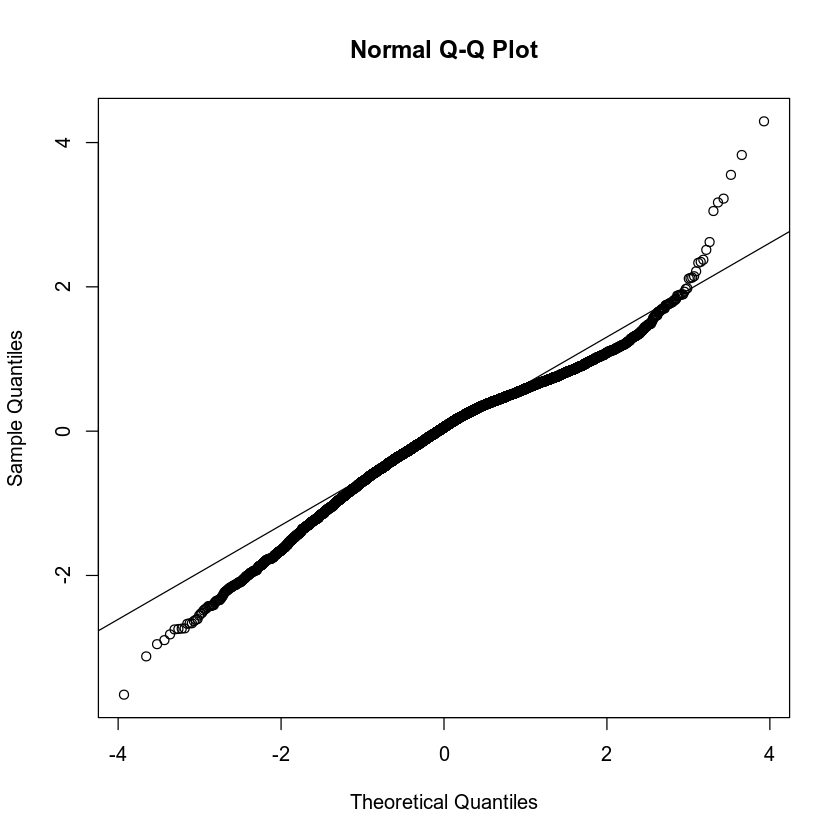

In [62]:
m <- MASS::rlm(t_delay_rate~jan+feb+mar+apr+may+jun+jul+sep+oct+arr_flights_n+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call: rlm(formula = t_delay_rate ~ jan + feb + mar + apr + may + jun + 
    jul + sep + oct + covid + extra_tue + extra_thu + extra_fri + 
    extra_sat, data = data[newFilterTest, ])
Residuals:
    Min      1Q  Median      3Q     Max 
-3.2856 -0.3267  0.0260  0.3123  4.6073 

Coefficients:
            Value    Std. Error t value 
(Intercept)  -1.7256   0.0185   -93.4362
jan          -0.1231   0.0258    -4.7675
feb           0.4776   0.0269    17.7479
mar          -0.1905   0.0218    -8.7457
apr          -0.2261   0.0193   -11.6954
may          -0.1368   0.0195    -7.0047
jun           0.2640   0.0210    12.5779
jul           0.2522   0.0202    12.5071
sep          -0.3173   0.0250   -12.6990
oct          -0.2491   0.0259    -9.6148
covid        -0.6919   0.0099   -70.1227
extra_tue     0.2070   0.0209     9.8931
extra_thu     0.1332   0.0141     9.4162
extra_fri     0.0439   0.0172     2.5512
extra_sat     0.1888   0.0176    10.7150

Residual standard error: 0.4709 on 11665 degrees o

[1] "BIC="             "21170.7637533027"
[1] "AIC="             "21052.9136212006"


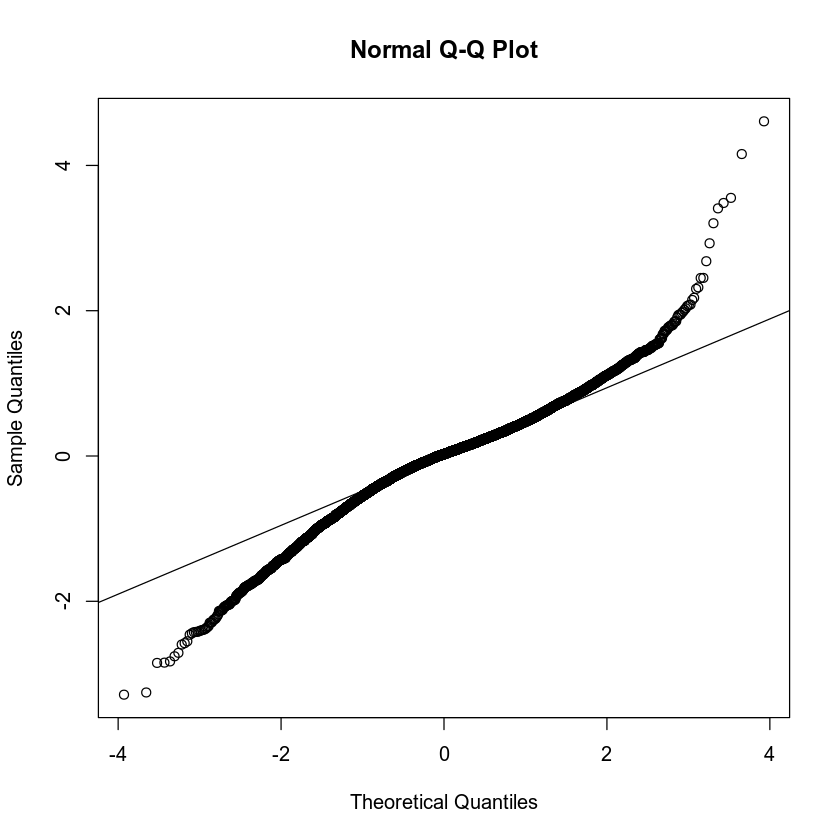

In [63]:
m <- MASS::rlm(t_delay_rate~jan+feb+mar+apr+may+jun+jul+sep+oct+covid+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call: rlm(formula = t_delay_rate ~ jan + feb + mar + apr + may + jun + 
    jul + sep + oct + covid + extra_tue + extra_thu + extra_fri + 
    extra_sat, data = data[newFilterTest, ])
Residuals:
    Min      1Q  Median      3Q     Max 
-3.2856 -0.3267  0.0260  0.3123  4.6073 

Coefficients:
            Value    Std. Error t value 
(Intercept)  -1.7256   0.0185   -93.4362
jan          -0.1231   0.0258    -4.7675
feb           0.4776   0.0269    17.7479
mar          -0.1905   0.0218    -8.7457
apr          -0.2261   0.0193   -11.6954
may          -0.1368   0.0195    -7.0047
jun           0.2640   0.0210    12.5779
jul           0.2522   0.0202    12.5071
sep          -0.3173   0.0250   -12.6990
oct          -0.2491   0.0259    -9.6148
covid        -0.6919   0.0099   -70.1227
extra_tue     0.2070   0.0209     9.8931
extra_thu     0.1332   0.0141     9.4162
extra_fri     0.0439   0.0172     2.5512
extra_sat     0.1888   0.0176    10.7150

Residual standard error: 0.4709 on 11665 degrees o

[1] "BIC="             "21170.7637533027"
[1] "AIC="             "21052.9136212006"


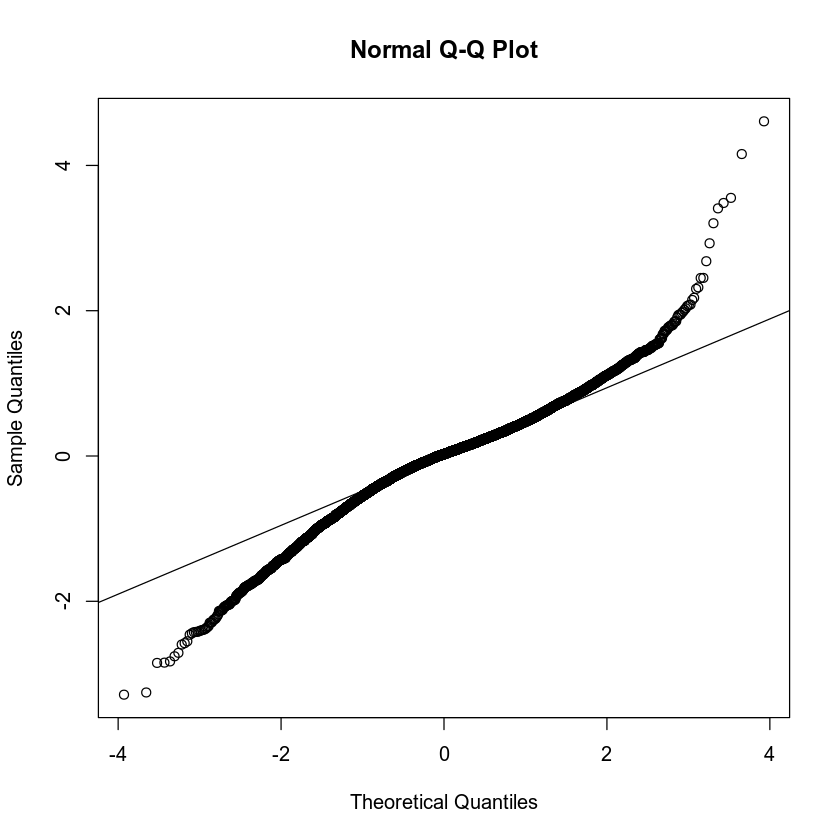

In [64]:
m <- MASS::rlm(t_delay_rate~jan+feb+mar+apr+may+jun+jul+sep+oct+covid+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call: rlm(formula = t_delay_rate ~ jan + feb + mar + apr + may + jun + 
    jul + sep + oct + covid + extra_tue + extra_thu + extra_sat, 
    data = data[newFilterTest, ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.31925 -0.32507  0.02661  0.31119  4.62061 

Coefficients:
            Value    Std. Error t value 
(Intercept)  -1.7127   0.0177   -97.0110
jan          -0.1044   0.0247    -4.2238
feb           0.4645   0.0263    17.6597
mar          -0.1675   0.0199    -8.4116
apr          -0.2232   0.0192   -11.6023
may          -0.1284   0.0191    -6.7309
jun           0.2794   0.0201    13.9192
jul           0.2691   0.0190    14.1966
sep          -0.3126   0.0248   -12.5905
oct          -0.2306   0.0248    -9.2931
covid        -0.6915   0.0098   -70.3611
extra_tue     0.1757   0.0172    10.2351
extra_thu     0.1506   0.0126    11.9253
extra_sat     0.1835   0.0175    10.5078

Residual standard error: 0.4689 on 11666 degrees of freedom

[1] "BIC="             "21175.7423613319"
[1] "AIC="             "21065.2578624862"


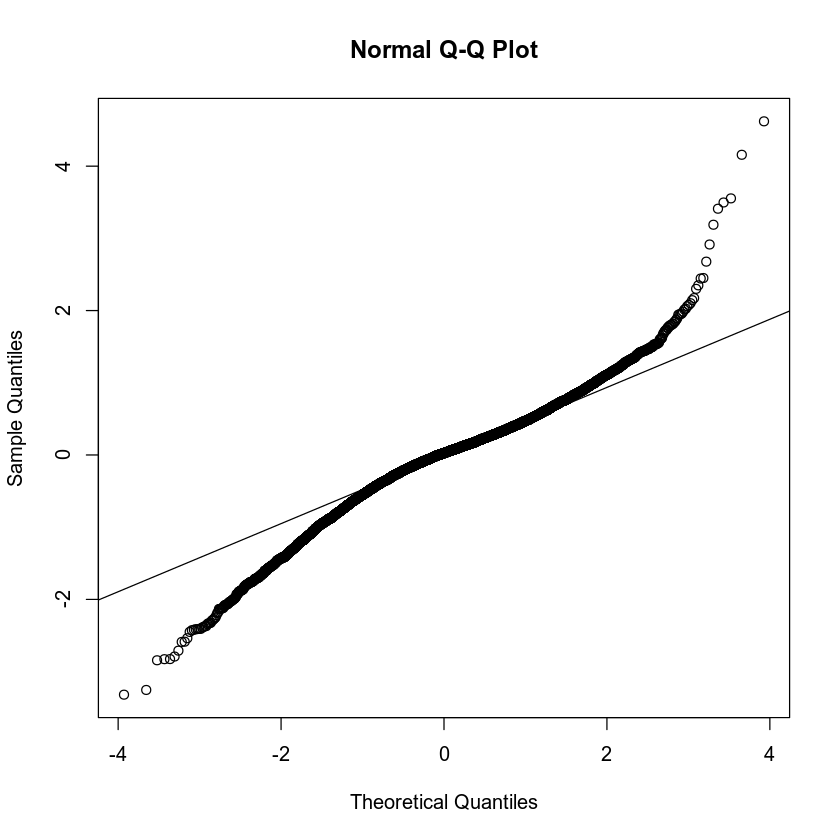

In [65]:
m <- MASS::rlm(t_delay_rate~jan+feb+mar+apr+may+jun+jul+sep+oct+covid+extra_tue+extra_thu+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + jan + feb + 
    mar + apr + may + jun + jul + sep + oct + extra_tue + extra_thu + 
    extra_sat, data = data[newFilterTest, ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.31329 -0.32751  0.02722  0.31333  4.62864 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.7276   0.0178   -96.8366
covid          -0.6856   0.0099   -69.3637
arr_flights_n   0.2753   0.0526     5.2323
jan            -0.1037   0.0248    -4.1906
feb             0.4666   0.0263    17.7082
mar            -0.1698   0.0200    -8.5121
apr            -0.2230   0.0193   -11.5703
may            -0.1290   0.0191    -6.7532
jun             0.2800   0.0201    13.9249
jul             0.2687   0.0190    14.1490
sep            -0.3115   0.0249   -12.5243
oct            -0.2299   0.0249    -9.2475
extra_tue       0.1755   0.0172    10.2065
extra_thu       0.1511   0.0127    11.9396
extra_sat       0.1839   0.0175    10.5133

Resi

[1] "BIC="             "21147.6576665274"
[1] "AIC="             "21029.8075344253"


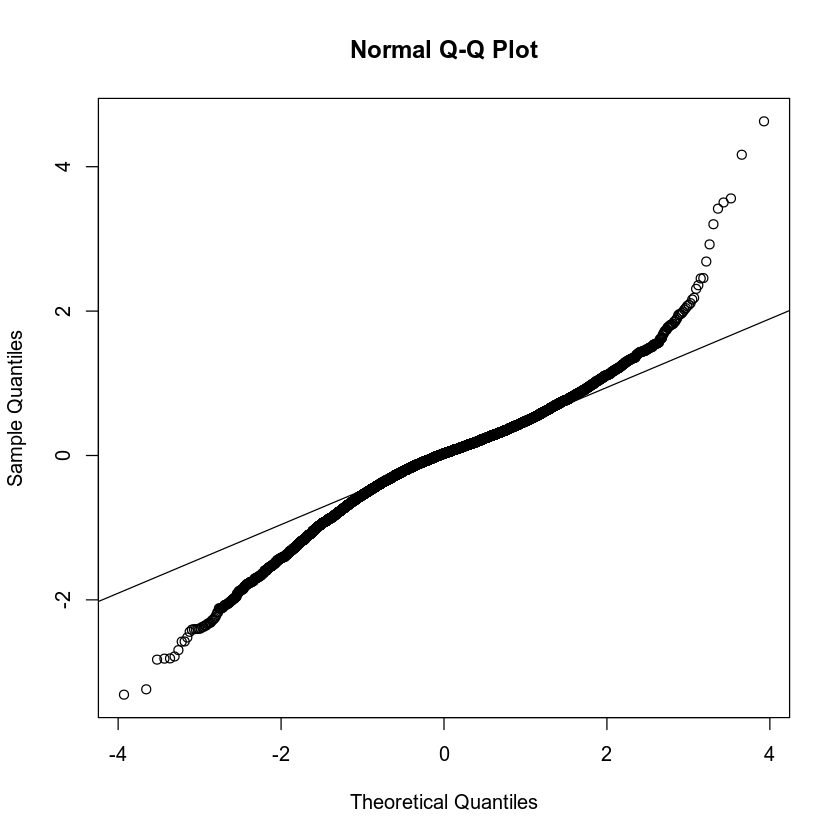

In [68]:
m <- MASS::rlm(t_delay_rate~covid+arr_flights_n+jan+feb+mar+apr+may+jun+jul+sep+oct+extra_tue+extra_thu+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + jan + feb + 
    mar + apr + may + jun + jul + sep + oct + extra_tue + extra_thu + 
    extra_fri + extra_sat, data = data[newFilterTest, ])
Residuals:
    Min      1Q  Median      3Q     Max 
-3.2783 -0.3273  0.0267  0.3135  4.6150 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.7411   0.0187   -93.3529
covid          -0.6860   0.0099   -69.1490
arr_flights_n   0.2770   0.0528     5.2440
jan            -0.1230   0.0258    -4.7605
feb             0.4802   0.0270    17.8181
mar            -0.1936   0.0218    -8.8709
apr            -0.2261   0.0194   -11.6821
may            -0.1378   0.0196    -7.0472
jun             0.2641   0.0210    12.5650
jul             0.2513   0.0202    12.4443
sep            -0.3163   0.0250   -12.6444
oct            -0.2488   0.0259    -9.5934
extra_tue       0.2078   0.0210     9.9171
extra_thu       0.1331   0.0142     9.3978
extra_fri       0.0452   0.0172     2.6255
ext

[1] "BIC="           "21141.81846661"
[1] "AIC="             "21016.6027012515"


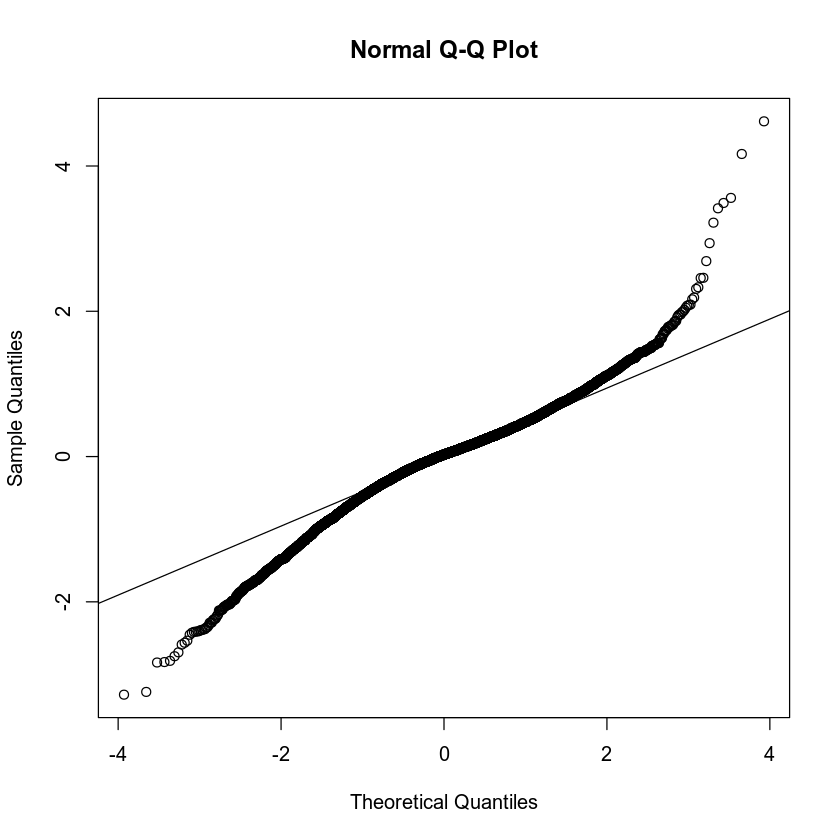

In [67]:
m <- MASS::rlm(t_delay_rate~covid+arr_flights_n+jan+feb+mar+apr+may+jun+jul+sep+oct+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))



Call: rlm(formula = t_delay_rate ~ top30 + covid + arr_flights_n + 
    jan + feb + mar + apr + may + jun + jul + sep + oct + extra_tue + 
    extra_thu + extra_fri + extra_sat, data = data[newFilterTest, 
    ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.28847 -0.32282  0.02442  0.31348  4.60884 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.7466   0.0186   -93.9129
top30          -0.2848   0.0290    -9.8134
covid          -0.6744   0.0100   -67.7455
arr_flights_n   0.9654   0.0876    11.0207
jan            -0.1217   0.0258    -4.7246
feb             0.4830   0.0269    17.9836
mar            -0.1989   0.0218    -9.1426
apr            -0.2275   0.0193   -11.7946
may            -0.1394   0.0195    -7.1528
jun             0.2594   0.0209    12.3847
jul             0.2475   0.0201    12.2980
sep            -0.3153   0.0249   -12.6447
oct            -0.2495   0.0259    -9.6525
extra_tue       0.2067   0.0209     9.8985
extra_thu       0.1326 

[1] "BIC="             "21064.9491269096"
[1] "AIC="             "20932.3677282947"


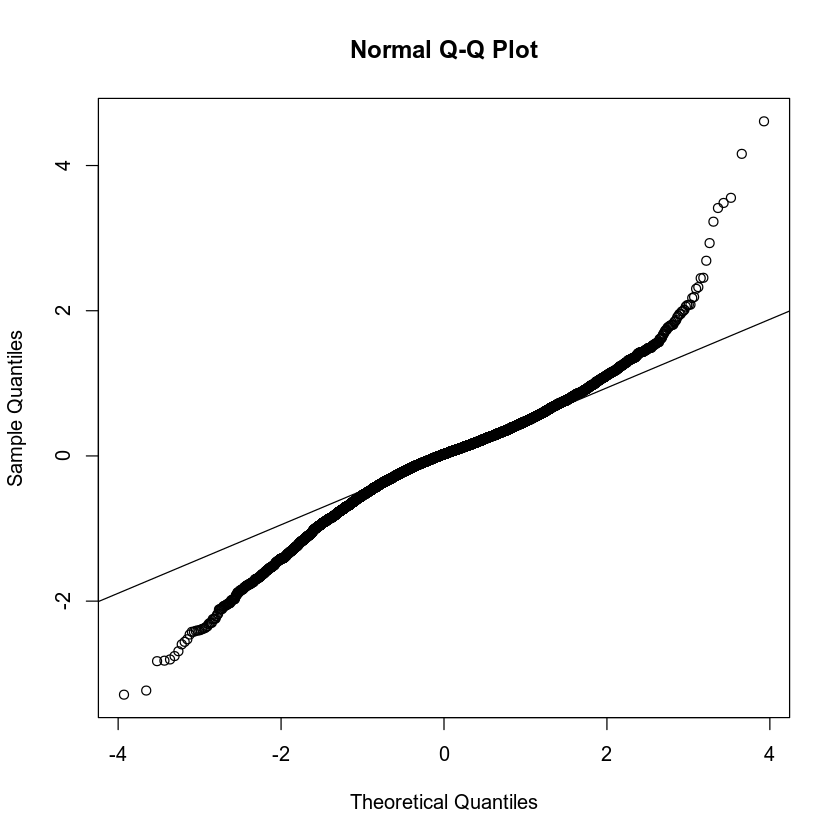

In [69]:
m <- MASS::rlm(t_delay_rate~top30+covid+arr_flights_n+jan+feb+mar+apr+may+jun+jul+sep+oct+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))



Call: rlm(formula = t_delay_rate ~ as.factor(airport_name) + covid + 
    arr_flights_n + jan + feb + mar + apr + may + jun + jul + 
    sep + oct + extra_tue + extra_thu + extra_fri + extra_sat, 
    data = data[newFilterTest, ])
Residuals:
      Min        1Q    Median        3Q       Max 
-3.641599 -0.276996  0.008532  0.273144  2.961280 

Coefficients:
                                                                                              Value   
(Intercept)                                                                                    -2.3446
as.factor(airport_name)Abilene, TX: Abilene Regional                                            0.6357
as.factor(airport_name)Adak Island, AK: Adak                                                    2.1772
as.factor(airport_name)Aguadilla, PR: Rafael Hernandez                                          1.3372
as.factor(airport_name)Akron, OH: Akron-Canton Regional                                         0.8903
as.factor(airport_name

[1] "BIC="             "21868.2306188054"
[1] "AIC="             "18966.1711157908"


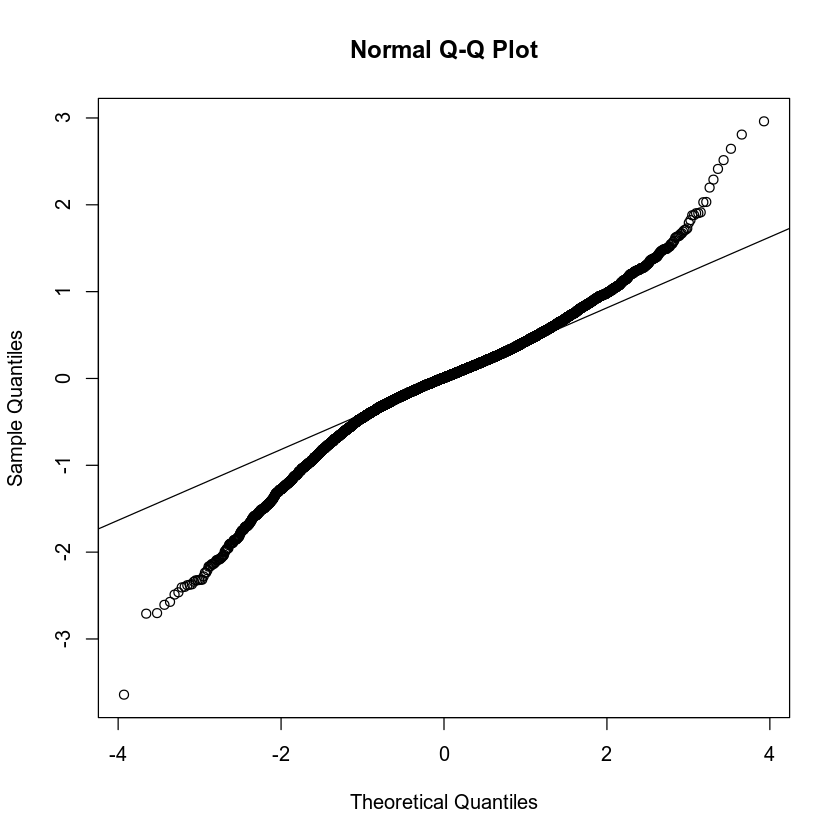

In [71]:
m <- MASS::rlm(t_delay_rate~as.factor(airport_name)+covid+arr_flights_n+jan+feb+mar+apr+may+jun+jul+sep+oct+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))



Call: rlm(formula = t_delay_rate ~ as.factor(airport_name), data = data[newFilterTest, 
    ])
Residuals:
     Min       1Q   Median       3Q      Max 
-4.25425 -0.45621  0.06396  0.44130  2.83247 

Coefficients:
                                                                                              Value   
(Intercept)                                                                                    -2.3975
as.factor(airport_name)Abilene, TX: Abilene Regional                                            0.5637
as.factor(airport_name)Adak Island, AK: Adak                                                    1.9373
as.factor(airport_name)Aguadilla, PR: Rafael Hernandez                                          1.4878
as.factor(airport_name)Akron, OH: Akron-Canton Regional                                         0.8739
as.factor(airport_name)Alamosa, CO: San Luis Valley Regional/Bergman Field                      0.2513
as.factor(airport_name)Albany, GA: Southwest Georgia Regional    

[1] "BIC="             "27519.7217130288"
[1] "AIC="           "24728.14670886"


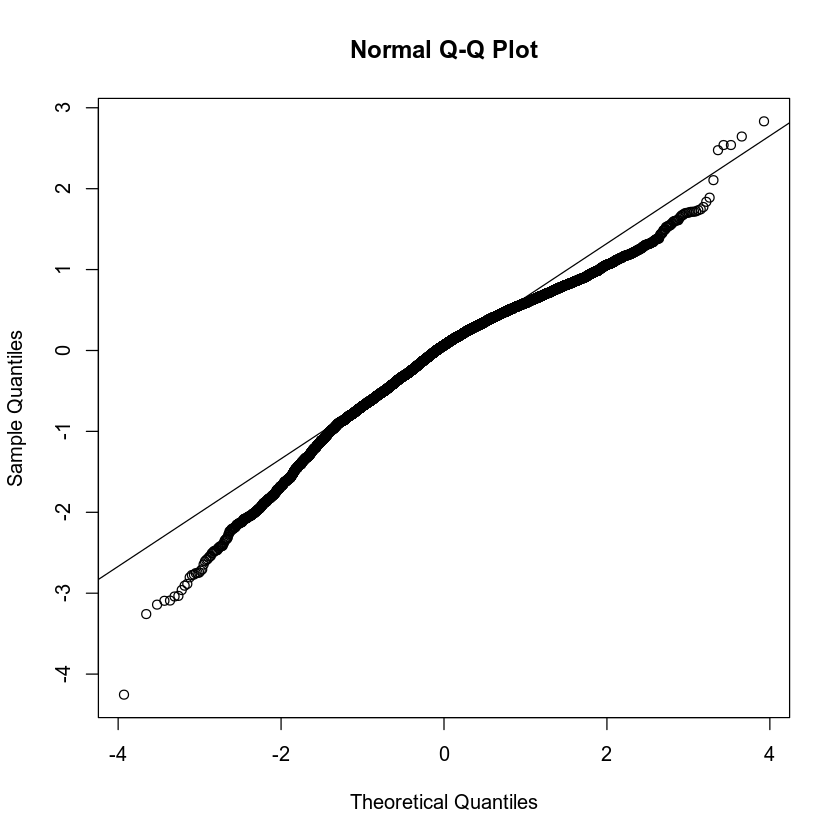

In [72]:
m <- MASS::rlm(t_delay_rate~as.factor(airport_name),data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))



Call: rlm(formula = t_delay_rate ~ as.factor(airport_name) + covid, 
    data = data[newFilterTest, ])
Residuals:
      Min        1Q    Median        3Q       Max 
-3.837613 -0.302529  0.004346  0.301809  3.238234 

Coefficients:
                                                                                              Value   
(Intercept)                                                                                    -2.0849
as.factor(airport_name)Abilene, TX: Abilene Regional                                            0.5899
as.factor(airport_name)Adak Island, AK: Adak                                                    2.1182
as.factor(airport_name)Aguadilla, PR: Rafael Hernandez                                          1.2796
as.factor(airport_name)Akron, OH: Akron-Canton Regional                                         0.8811
as.factor(airport_name)Alamosa, CO: San Luis Valley Regional/Bergman Field                      0.5523
as.factor(airport_name)Albany, GA: Southwest Ge

[1] "BIC="             "24219.1788780827"
[1] "AIC="             "21420.2382406575"


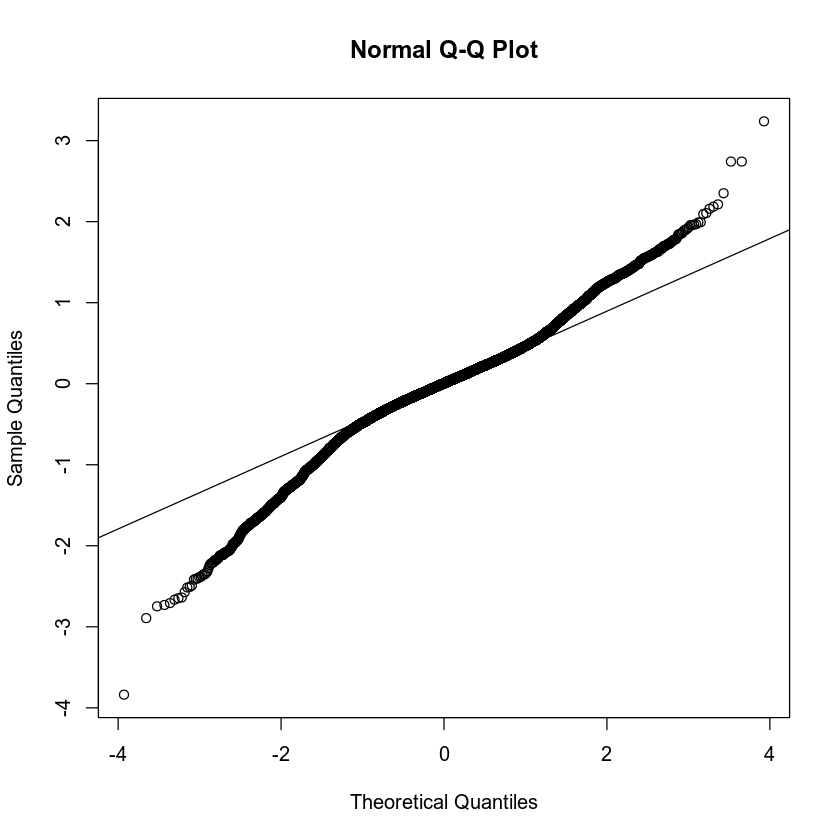

In [104]:
m <- MASS::rlm(t_delay_rate~as.factor(airport_name)+covid,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))

In [105]:
as.data.frame(sort(coef(summary(m))[,"t value"]))

sort(coef(summary(m))[, "t value"])
covid                                                                              -72.02760527                       
(Intercept)                                                                        -22.52087700                       
as.factor(airport_name)Hilo, HI: Hilo International                                 -5.34960474                       
as.factor(airport_name)Elko, NV: Elko Regional                                      -2.60092403                       
as.factor(airport_name)Hibbing, MN: Range Regional                                  -2.14296083                       
as.factor(airport_name)Lihue, HI: Lihue Airport                                     -2.07599437                       
as.factor(airport_name)Butte, MT: Bert Mooney                                       -2.00302969                       
as.factor(airport_name)Kona, HI: Ellison Onizuka Kona International at Keahole      -1.03983433                       
as.factor(airport_name)Bemidji, MN: Bemidji Regional                                -0.90350098                       
as.factor(airport_name)Pocatello, ID: Pocatello Regional                            -0.66551479                       
as.factor(airport_name)Lewiston, ID: Lewiston Nez Perce County                      -0.66067231                       
as.factor(airport_name)Kotzebue, AK: Ralph Wien Memorial                            -0.60693828                       
as.factor(airport_name)Gustavus, AK: Gustavus Airport                               -0.42797716                       
as.factor(airport_name)Elmira/Corning, NY: Elmira/Corning Regional                  -0.21571836                       
as.factor(airport_name)International Falls, MN: Falls International Einarson Field  -0.13182915                       
as.factor(airport_name)Bethel, AK: Bethel Airport                                   -0.04228076                       
as.factor(airport_name)Nome, AK: Nome Airport                                       -0.03898795                       
as.factor(airport_name)Sun Valley/Hailey/Ketchum, ID: Friedman Memorial              0.18624681                       
as.factor(airport_name)Deadhorse, AK: Deadhorse Airport                              0.34142807                       
as.factor(airport_name)Twin Falls, ID: Joslin Field - Magic Valley Regional          0.47159584                       
as.factor(airport_name)Helena, MT: Helena Regional                                   0.56896237                       
as.factor(airport_name)Kahului, HI: Kahului Airport                                  0.57149642                       
as.factor(airport_name)Casper, WY: Casper/Natrona County International               0.58460925                       
as.factor(airport_name)Honolulu, HI: Daniel K Inouye International                   0.65530868                       
as.factor(airport_name)Iron Mountain/Kingsfd, MI: Ford                               0.66223402                       
as.factor(airport_name)Williston, ND: Sloulin Field International                    0.95734752                       
as.factor(airport_name)Pellston, MI: Pellston Regional Airport of Emmet County       0.99643169                       
as.factor(airport_name)Victoria, TX: Victoria Regional                               1.02149972                       
as.factor(airport_name)Brunswick, GA: Brunswick Golden Isles                         1.14604624                       
as.factor(airport_name)Rhinelander, WI: Rhinelander/Oneida County                    1.18198507                       
⋮                                                                                  ⋮                                  
as.factor(airport_name)North Bend/Coos Bay, OR: Southwest Oregon Regional           6.413537                          
as.factor(airport_name)Islip, NY: Long Island MacArthur                             6.430240                          
as.factor(airport_name)Aspen, CO: Asp

In [106]:
# which airports are factors? should they be grouped?


Call: rlm(formula = t_delay_rate ~ as.factor(airport) + covid + arr_flights_n + 
    jan + feb + mar + apr + may + jun + jul + sep + oct + extra_tue + 
    extra_thu + extra_fri + extra_sat, data = data[newFilterTest, 
    ])
Residuals:
      Min        1Q    Median        3Q       Max 
-3.641599 -0.276996  0.008532  0.273144  2.961280 

Coefficients:
                      Value    Std. Error t value 
(Intercept)            -1.7371   0.0828   -20.9756
as.factor(airport)ABI   0.0281   0.1149     0.2450
as.factor(airport)ABQ  -0.1092   0.1150    -0.9495
as.factor(airport)ABR  -0.6076   0.1176    -5.1642
as.factor(airport)ABY  -0.2114   0.1158    -1.8257
as.factor(airport)ACK  -0.0812   0.1357    -0.5982
as.factor(airport)ACT  -0.1800   0.1158    -1.5549
as.factor(airport)ACV  -0.1018   0.1158    -0.8795
as.factor(airport)ACY  -0.0006   0.1158    -0.0052
as.factor(airport)ADK   1.5697   0.1315    11.9366
as.factor(airport)ADQ  -0.3748   0.1177    -3.1861
as.factor(airport)AEX  -0.0229   

[1] "BIC="             "21868.2306188054"
[1] "AIC="             "18966.1711157908"


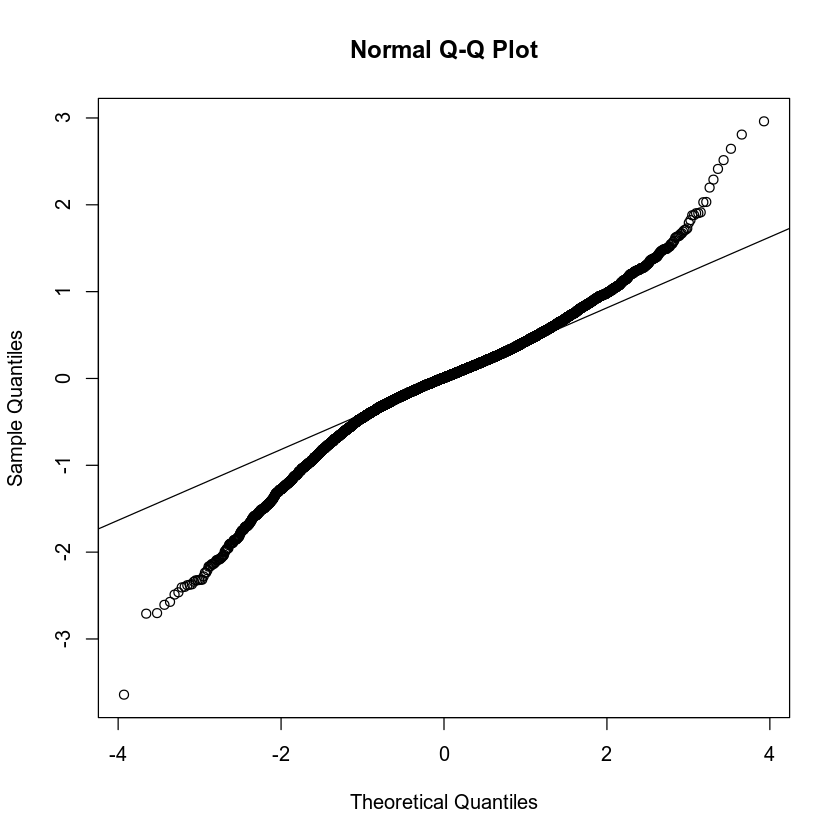

In [107]:
m <- MASS::rlm(t_delay_rate~as.factor(airport)+covid+arr_flights_n+jan+feb+mar+apr+may+jun+jul+sep+oct+extra_tue+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))

In [108]:
as.data.frame(sort(coef(summary(m))[,"t value"]))

sort(coef(summary(m))[, "t value"])
covid                 -65.276675                         
(Intercept)           -20.975624                         
as.factor(airport)ATL -17.954385                         
as.factor(airport)ORD -14.268192                         
sep                   -13.558896                         
as.factor(airport)CLT -13.200368                         
as.factor(airport)DEN -12.942122                         
as.factor(airport)DFW -12.320767                         
apr                   -11.492426                         
as.factor(airport)LAX -11.362784                         
mar                   -11.259745                         
as.factor(airport)ITO -11.096434                         
as.factor(airport)MSP -10.847977                         
oct                   -10.765688                         
as.factor(airport)DTW -10.660412                         
as.factor(airport)PHX -10.582704                         
as.factor(airport)SEA  -9.191943                         
as.factor(airport)LAS  -9.112186                         
as.factor(airport)SLC  -8.759155                         
as.factor(airport)IAH  -8.676538                         
may                    -7.949715                         
as.factor(airport)EKO  -7.877485                         
as.factor(airport)SFO  -7.785322                         
as.factor(airport)LIH  -7.760839                         
as.factor(airport)BWI  -7.631221                         
as.factor(airport)DCA  -7.548962                         
as.factor(airport)HIB  -7.485476                         
as.factor(airport)BTM  -7.228604                         
as.factor(airport)LGA  -7.221171                         
as.factor(airport)HNL  -6.937982                         
⋮                     ⋮                                  
as.factor(airport)DBQ  2.442882                          
as.factor(airport)PAH  2.448417                          
as.factor(airport)SWF  2.448491                          
as.factor(airport)CAK  2.461247                          
as.factor(airport)LCK  2.465477                          
as.factor(airport)CMX  2.612604                          
as.factor(airport)HPN  2.985529                          
as.factor(airport)PIB  3.055743                          
as.factor(airport)BFM  3.220391                          
as.factor(airport)STC  3.275881                          
as.factor(airport)CKB  3.412578                          
as.factor(airport)ORH  3.613680                          
as.factor(airport)PGV  3.693945                          
as.factor(airport)PSE  4.013232                          
as.factor(airport)TTN  4.079896                          
as.factor(airport)AZA  4.229498                          
as.factor(airport)OWB  4.287343                          
as.factor(airport)SFB  4.301903                          
as.factor(airport)PGD  4.511363                          
as.factor(airport)OGD  4.885729                          
as.factor(airport)BQN  5.627959                          
as.factor(airport)CDB  9.369793                          
extra_tue             10.380670                          
extra_thu             11.562889                          
as.factor(airport)ADK 11.936563                          
extra_sat             12.191340                          
jul                   12.832161                          
jun                   13.950241                          
feb                   21.011557                          
arr_flights_n         22.469992


Call: rlm(formula = t_delay_rate ~ as.factor(airport) + covid + arr_flights_n + 
    jan + feb + mar + apr + may + jun + jul + aug + sep + oct + 
    nov + extra_mon + extra_tue + extra_wed + extra_thu + extra_fri + 
    extra_sat, data = data[newFilterTest, ])
Residuals:
      Min        1Q    Median        3Q       Max 
-3.677305 -0.276118  0.008532  0.271031  2.948413 

Coefficients:
                      Value    Std. Error t value 
(Intercept)            -1.6919   0.0938   -18.0404
as.factor(airport)ABI   0.0277   0.1146     0.2421
as.factor(airport)ABQ  -0.1096   0.1147    -0.9552
as.factor(airport)ABR  -0.6136   0.1173    -5.2304
as.factor(airport)ABY  -0.2140   0.1154    -1.8538
as.factor(airport)ACK  -0.0815   0.1354    -0.6024
as.factor(airport)ACT  -0.1790   0.1154    -1.5505
as.factor(airport)ACV  -0.1025   0.1154    -0.8883
as.factor(airport)ACY   0.0009   0.1154     0.0075
as.factor(airport)ADK   1.5745   0.1311    12.0069
as.factor(airport)ADQ  -0.3745   0.1173    -3.19

[1] "BIC="             "21924.6897141137"
[1] "AIC="             "18993.1676780736"


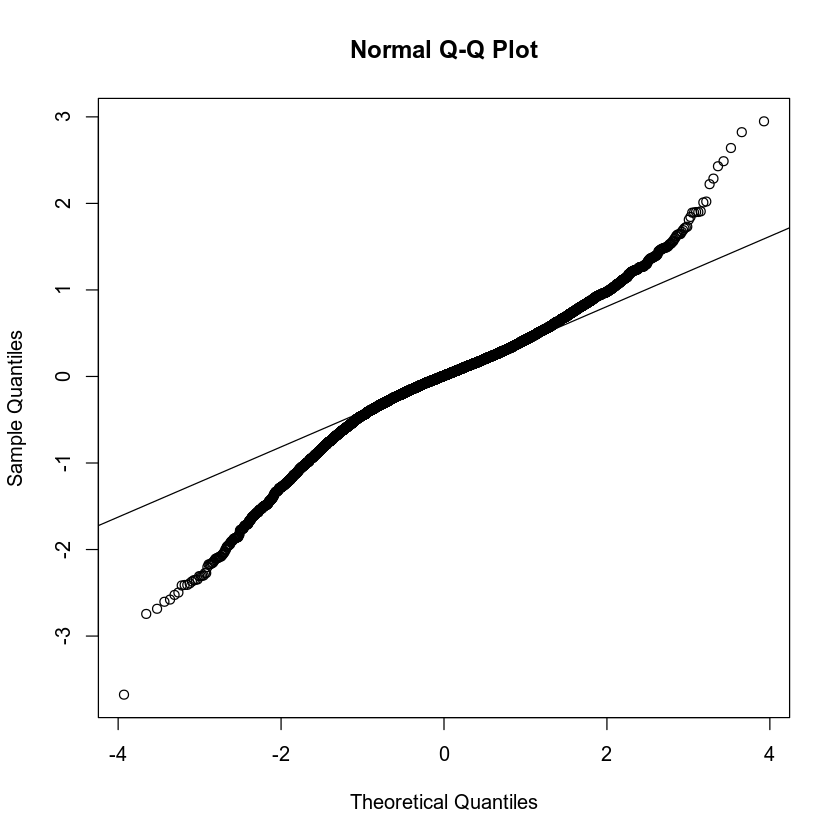

In [113]:
m <- MASS::rlm(t_delay_rate~as.factor(airport)+covid+arr_flights_n+jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov+extra_mon+extra_tue+extra_wed+extra_thu+extra_fri+extra_sat,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))

In [115]:
write.csv(coef(summary(m)),file="data/airport_x_months_full_overfit.csv")

In [116]:
# fit with all too many variables, use only these with |t-value|>5
